In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as LogNorm
import matplotlib.ticker as ticker
import math
import sys
import pandas as pd
import glob
from scipy.optimize import curve_fit

/usr/lib64/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
file_path_pip = glob.glob("/volatile/clas12/users/jphelan/SIDIS/cut_sensitivity/ratio_10.2_*.txt_pip.txt")
file_path_pim = glob.glob("/volatile/clas12/users/jphelan/SIDIS/cut_sensitivity/ratio_10.2_*.txt_pim.txt")

data_pip = np.empty((1,16))
for file in file_path_pip:
    content = np.loadtxt(file, delimiter='\t', skiprows=1)
    data_pip = np.concatenate((data_pip, np.asarray(content)), axis=0)
data_pim = np.empty((1,16))
for file in file_path_pim:
    content = np.loadtxt(file, delimiter='\t', skiprows=1)
    data_pim = np.concatenate((data_pim, np.asarray(content)), axis=0)
print(data_pim)

[[4.68168869e-310 0.00000000e+000 2.41907520e-312 ... 2.29175545e-312
  2.07955588e-312 2.14321575e-312]
 [1.00000000e+000 1.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 2.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 ...
 [1.40000000e+001 1.00000000e+001 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [1.40000000e+001 1.10000000e+001 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [1.40000000e+001 1.20000000e+001 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]]


In [4]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

/scratch/jphelan/tmp/ipykernel_4120511/1652432506.py:26: RuntimeWarning: divide by zero encountered in divide
  selected = selected_pip[bin]/selected_pim[bin]
/scratch/jphelan/tmp/ipykernel_4120511/1652432506.py:26: RuntimeWarning: invalid value encountered in divide
  selected = selected_pip[bin]/selected_pim[bin]
/scratch/jphelan/tmp/ipykernel_4120511/1652432506.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(4,4, figsize=(16,14))


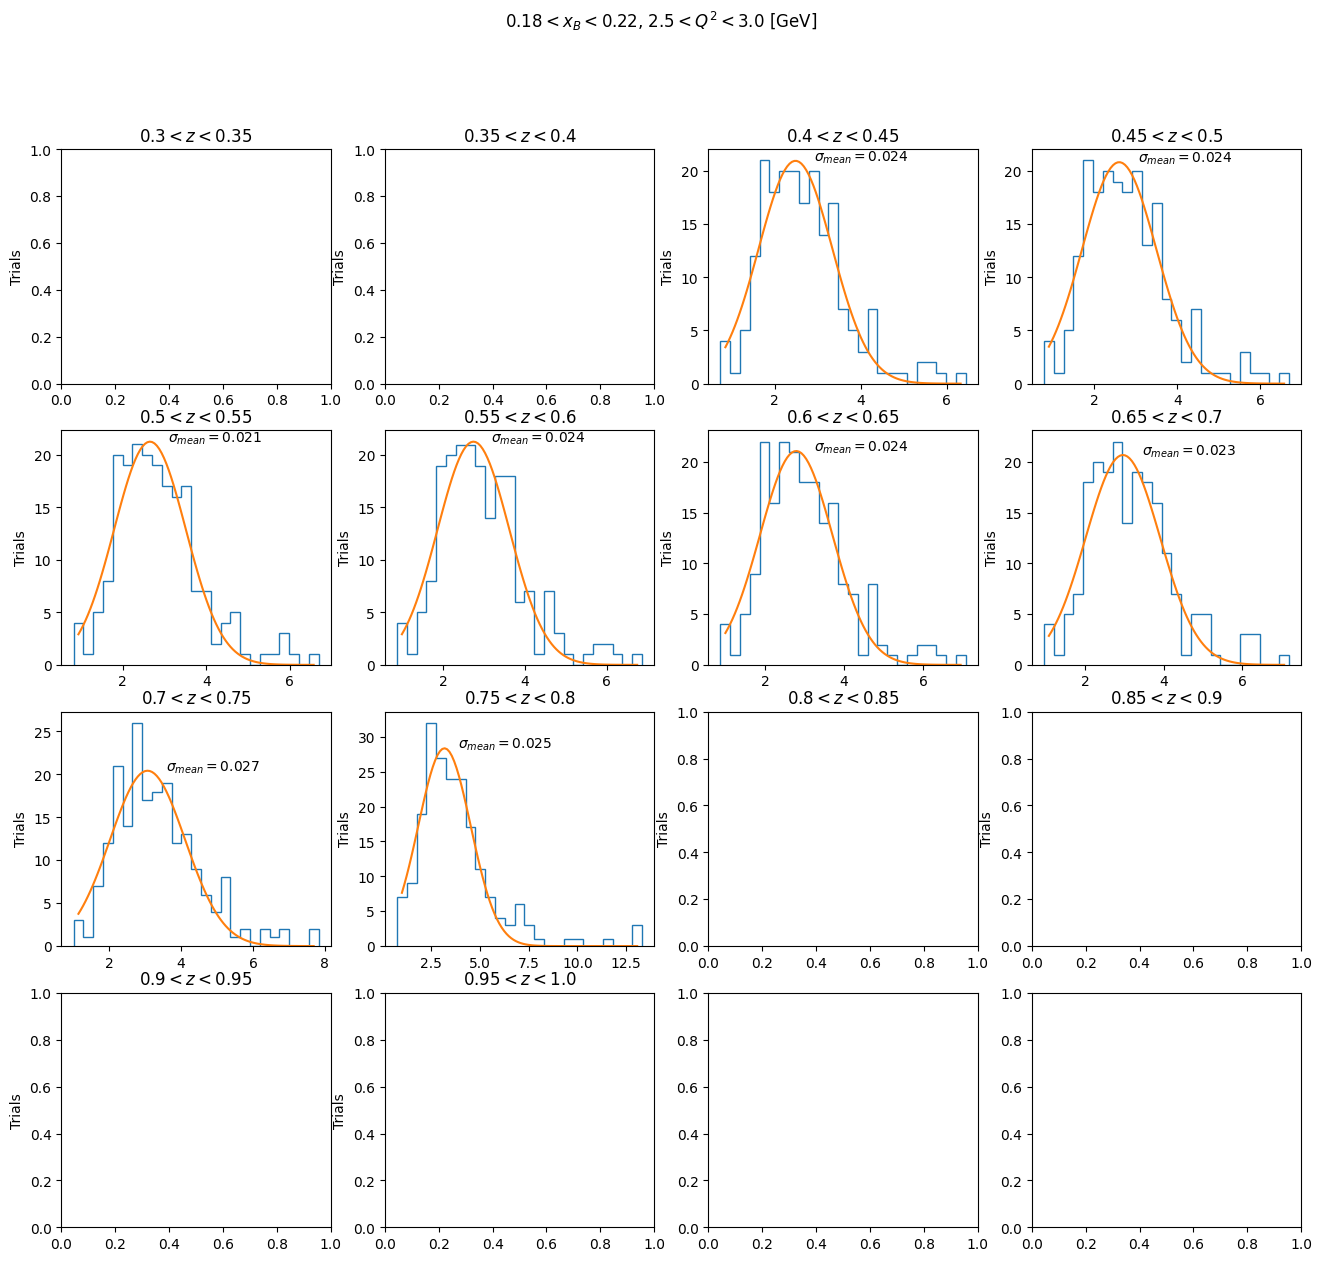

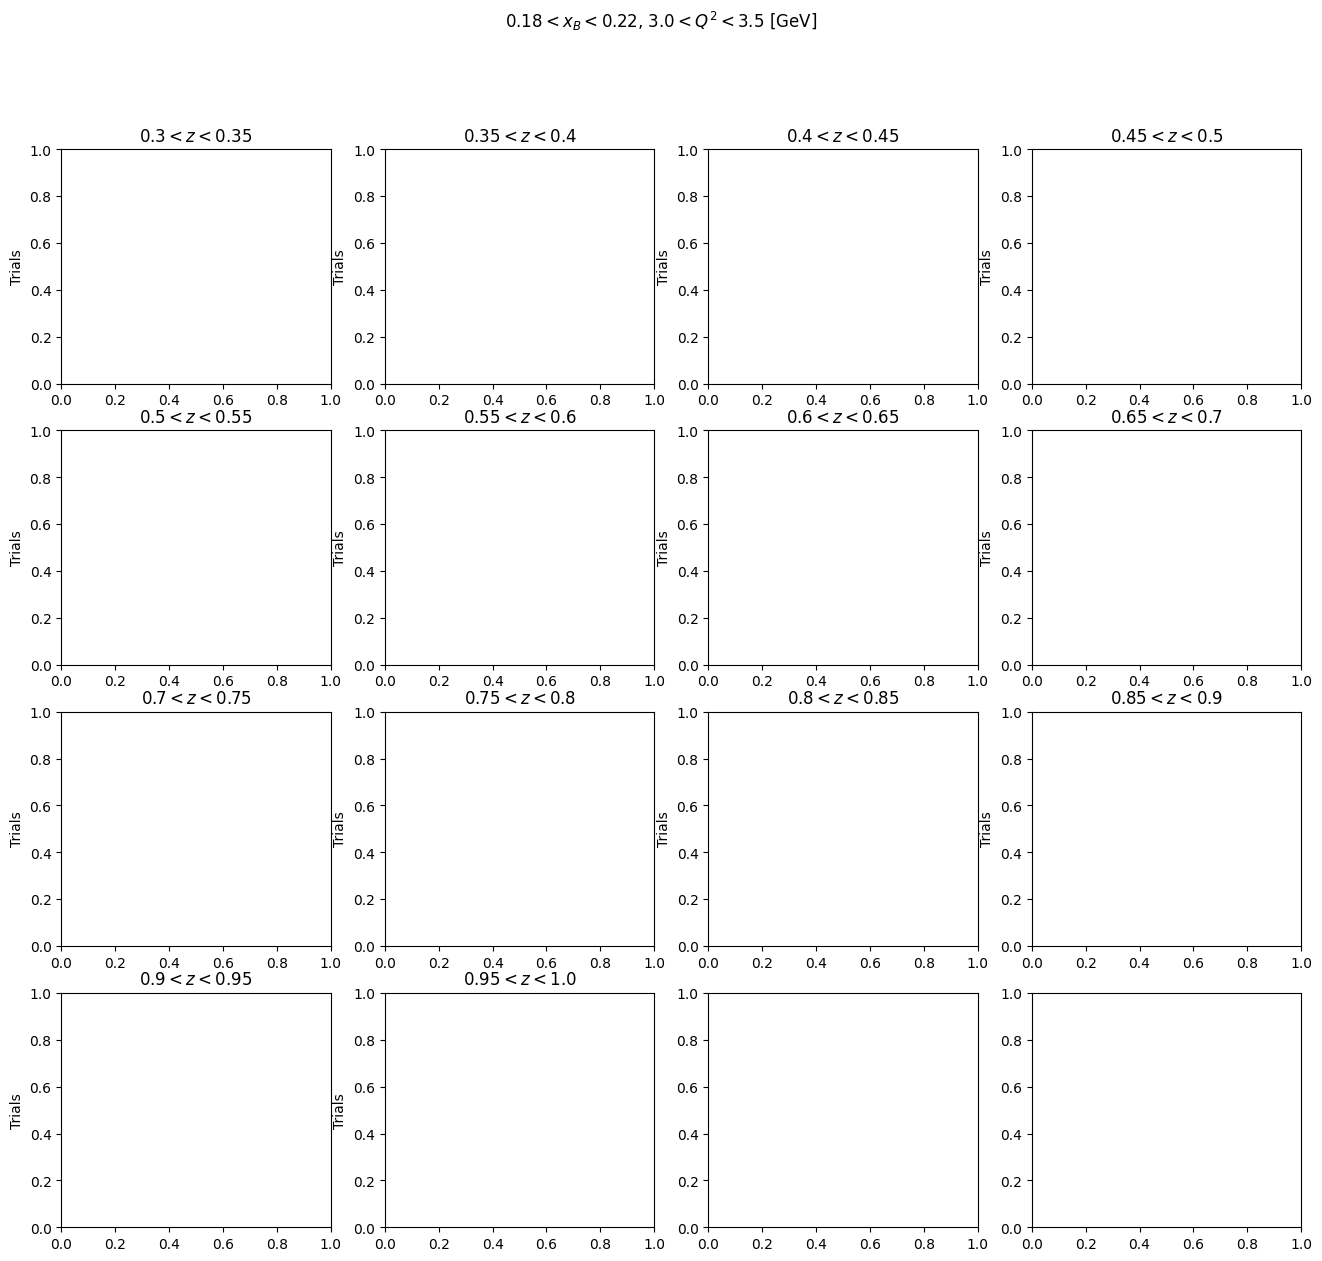

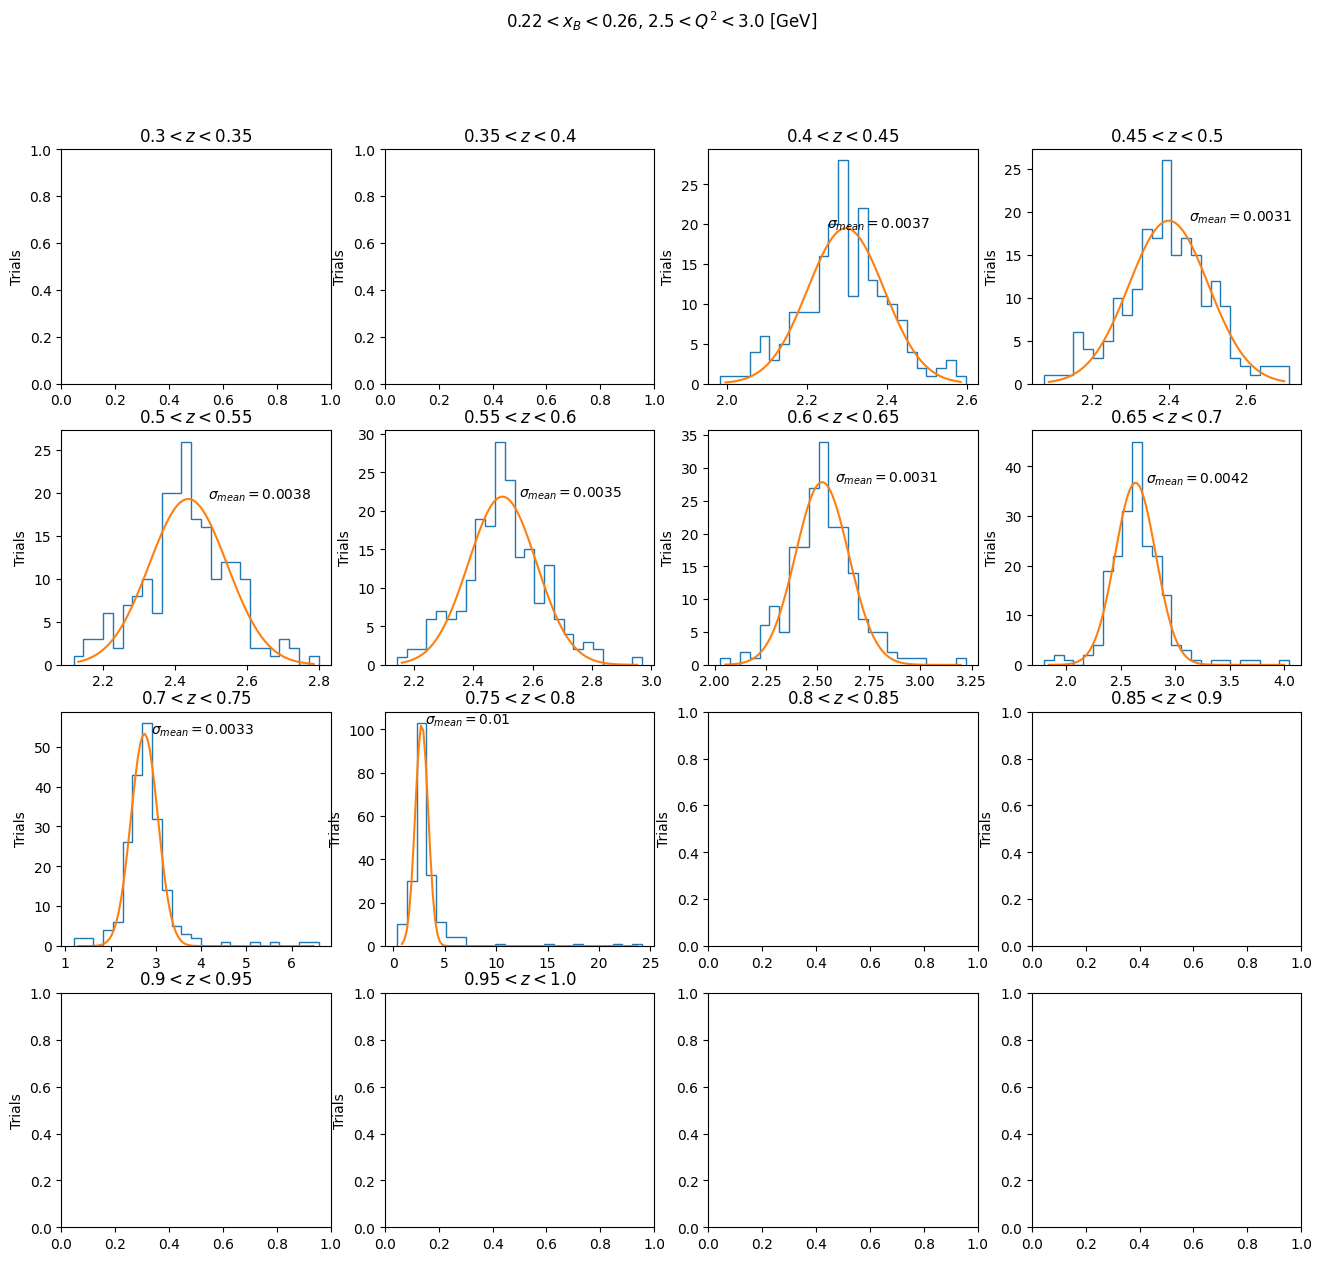

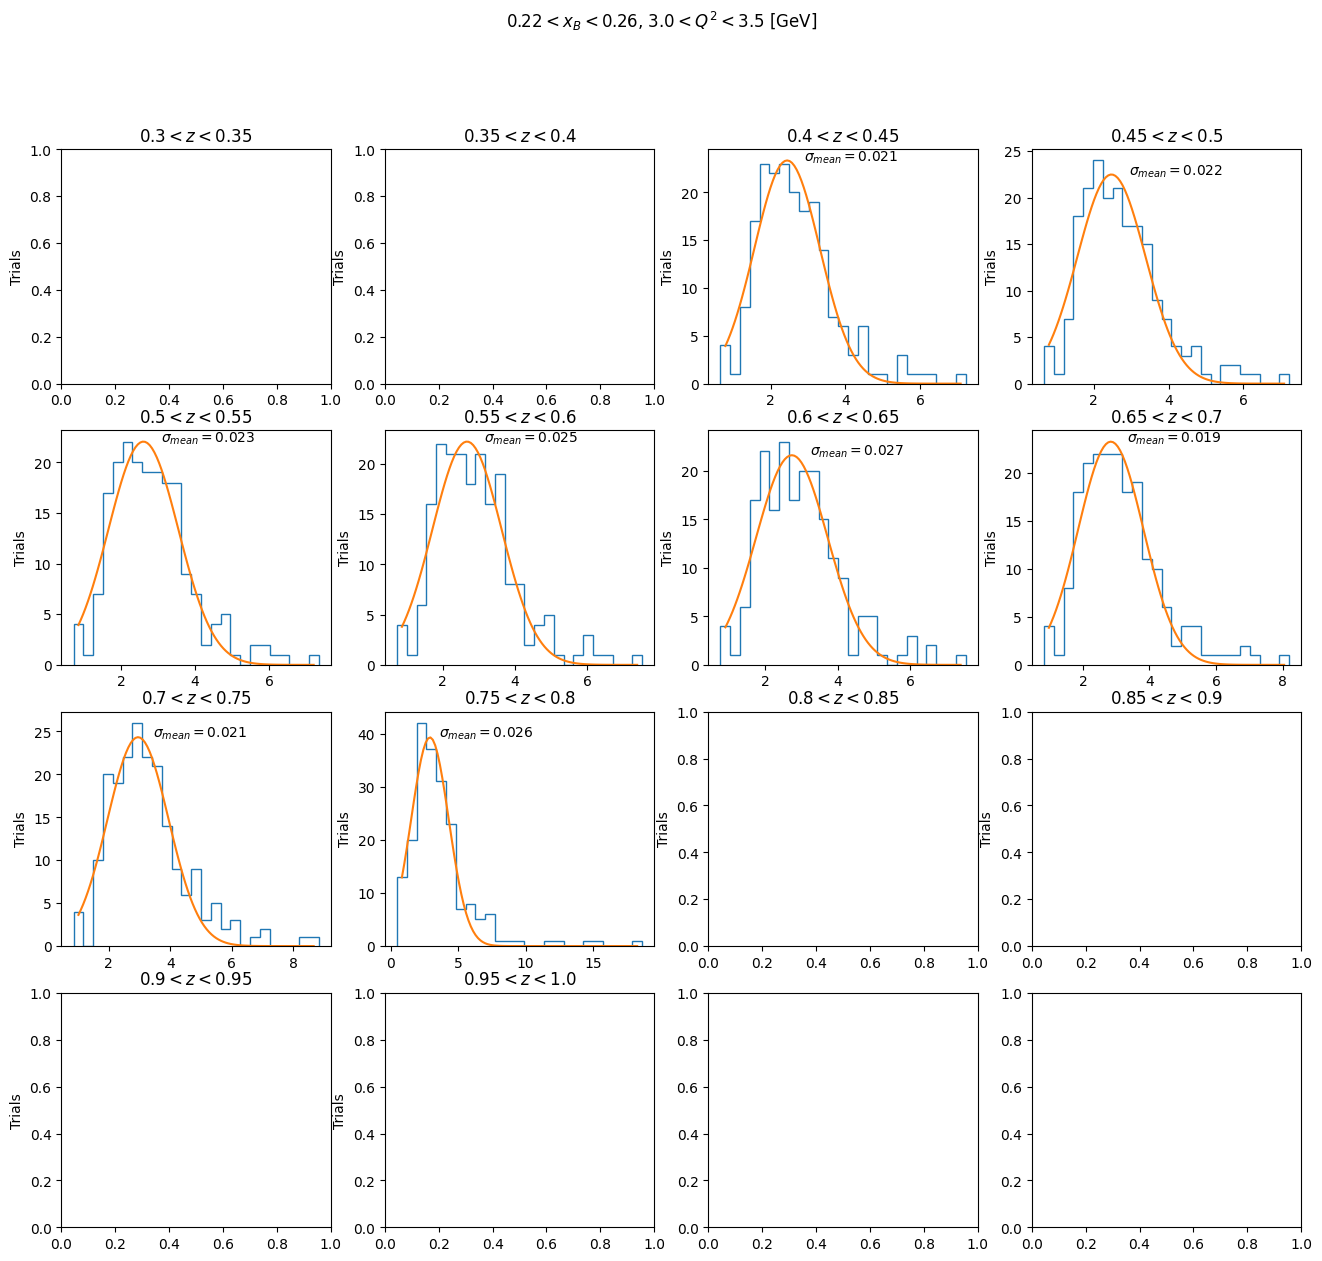

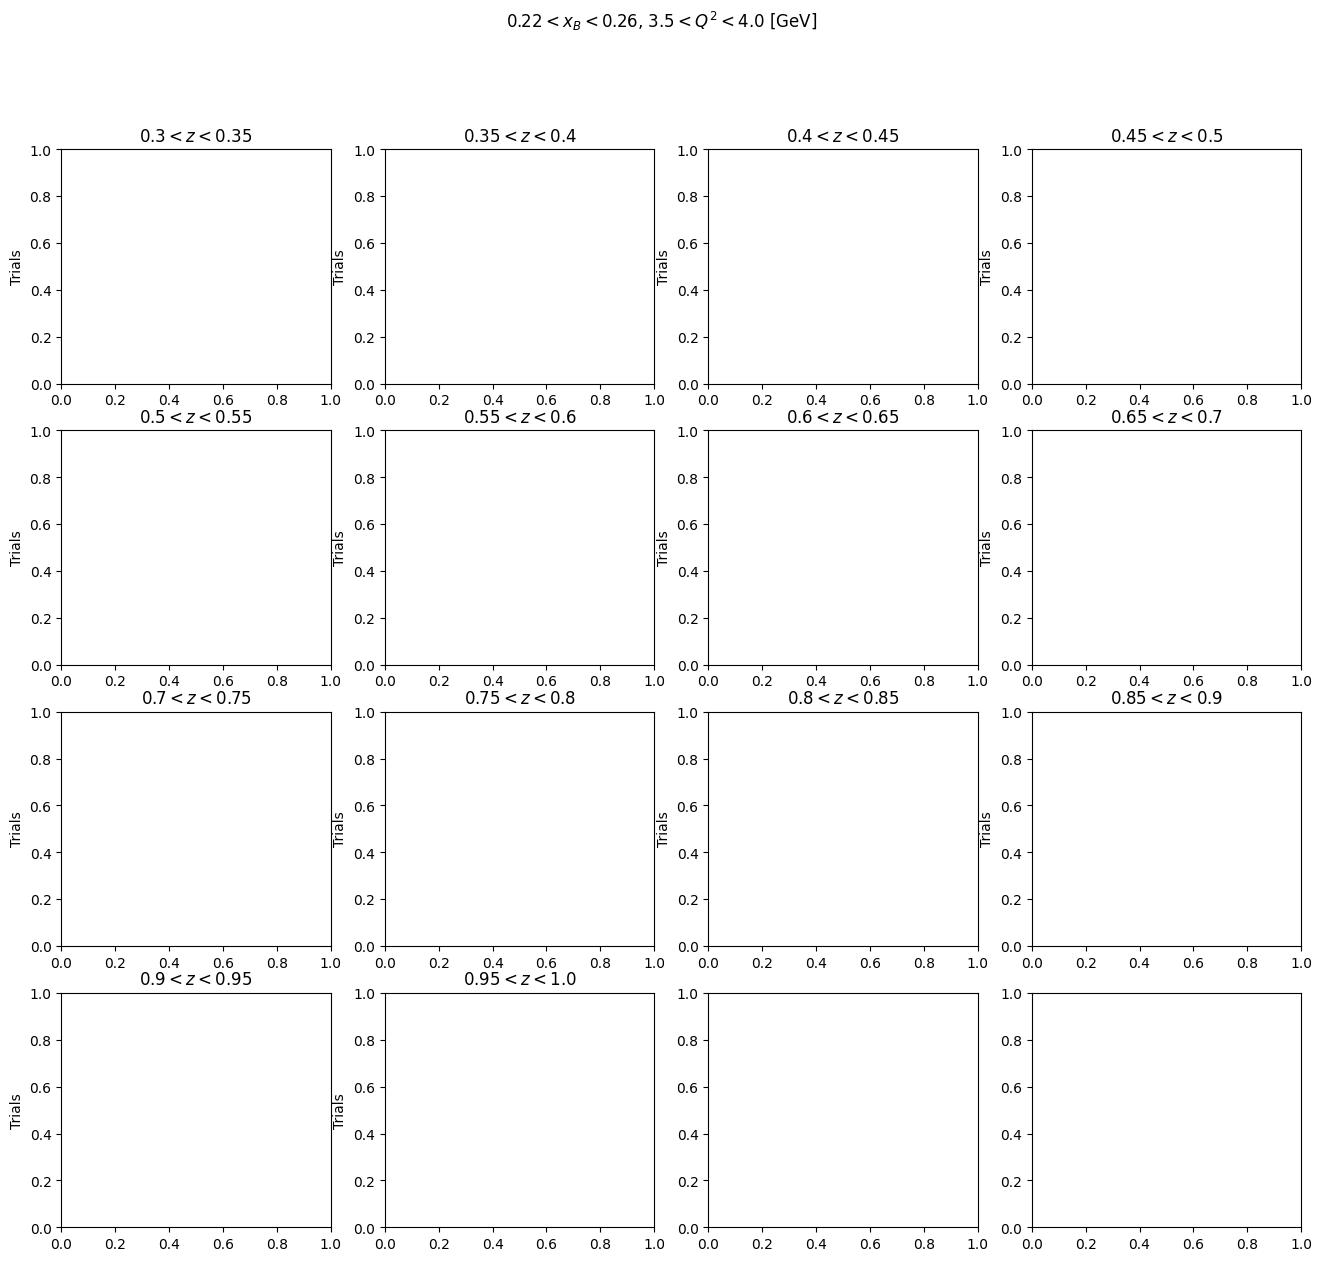

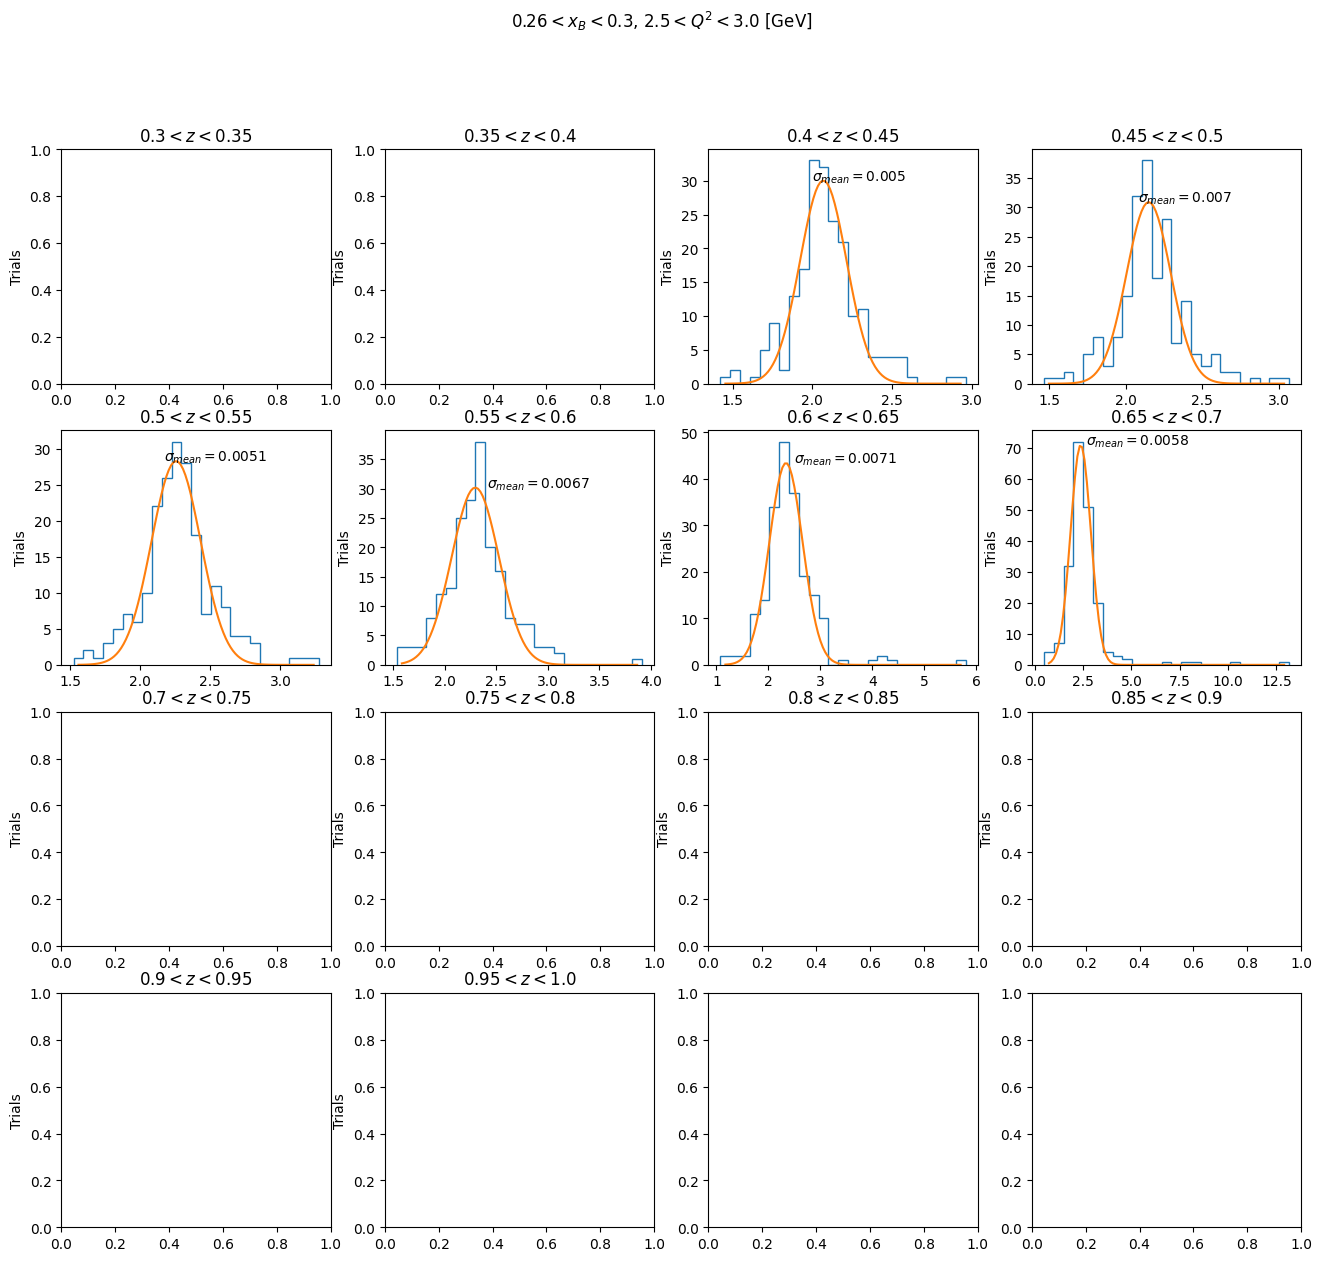

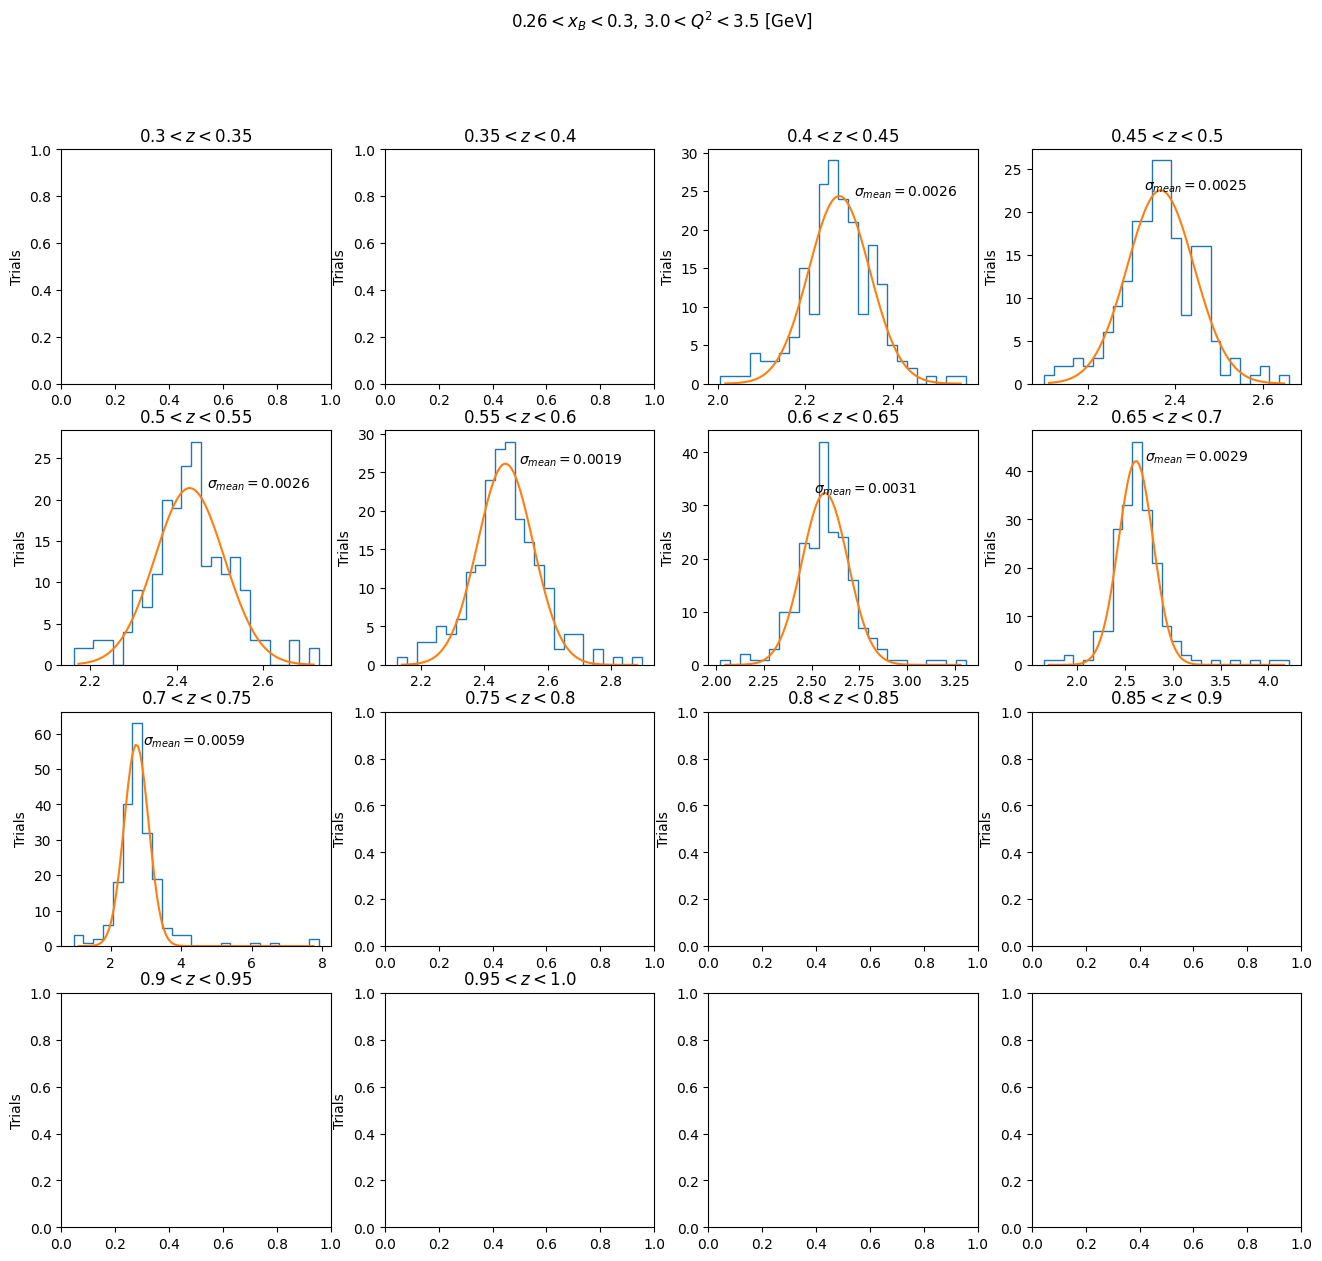

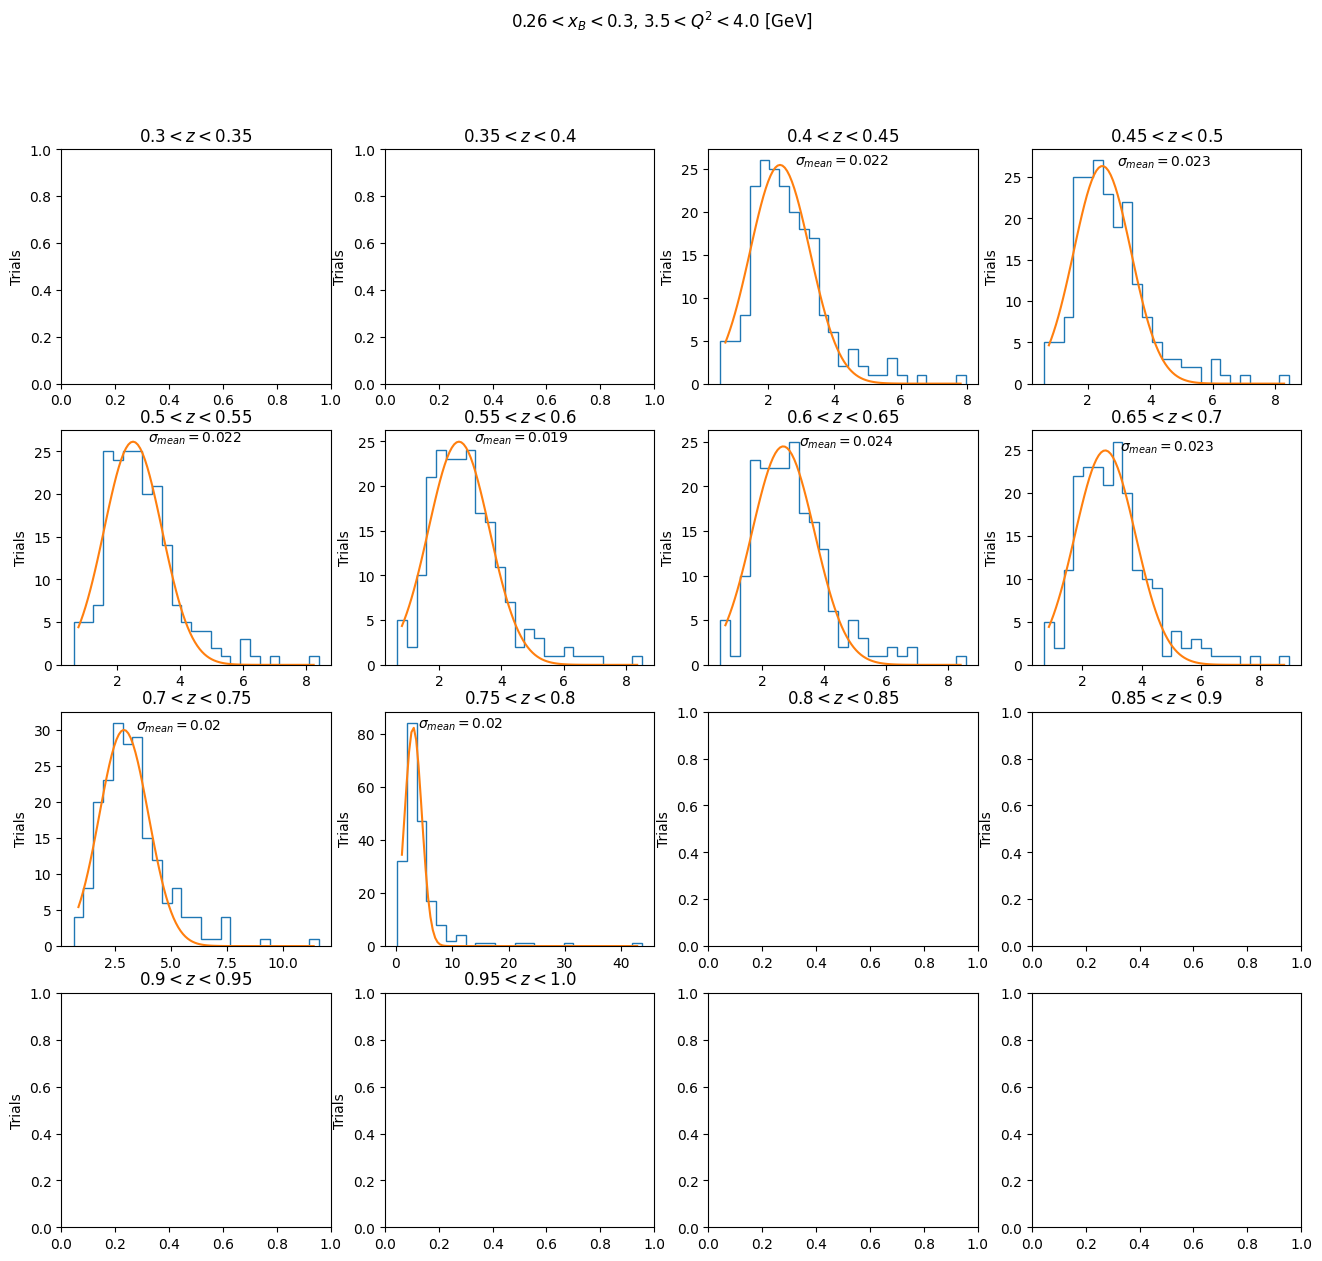

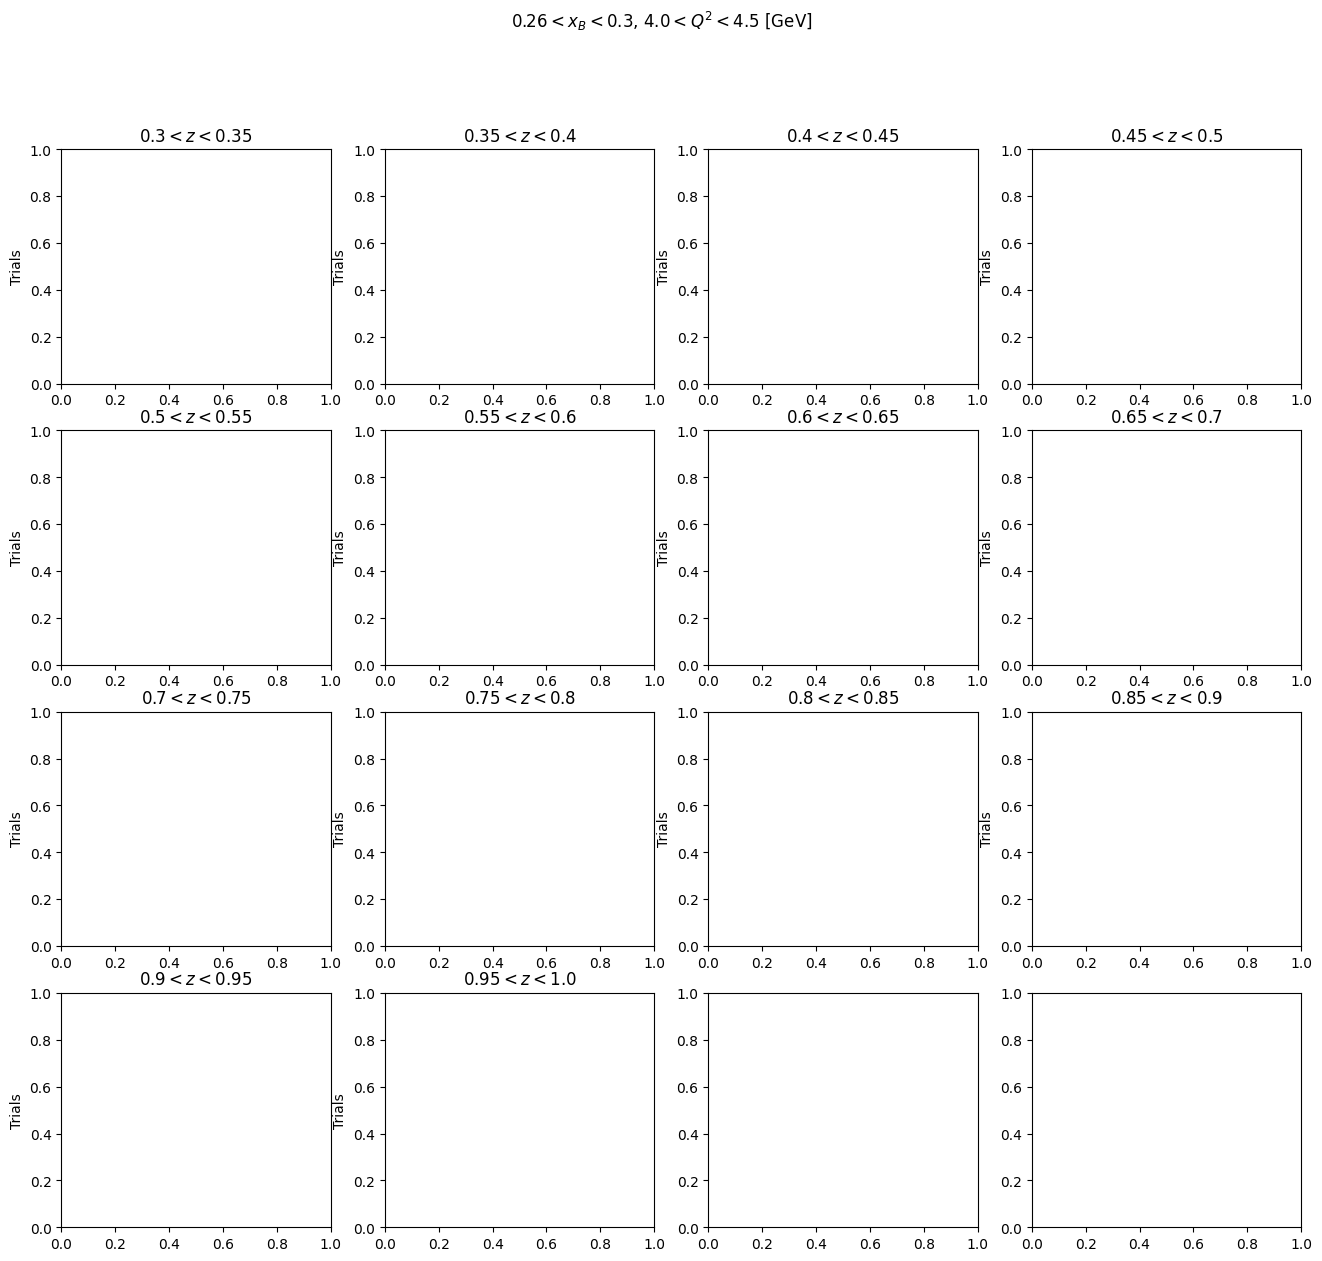

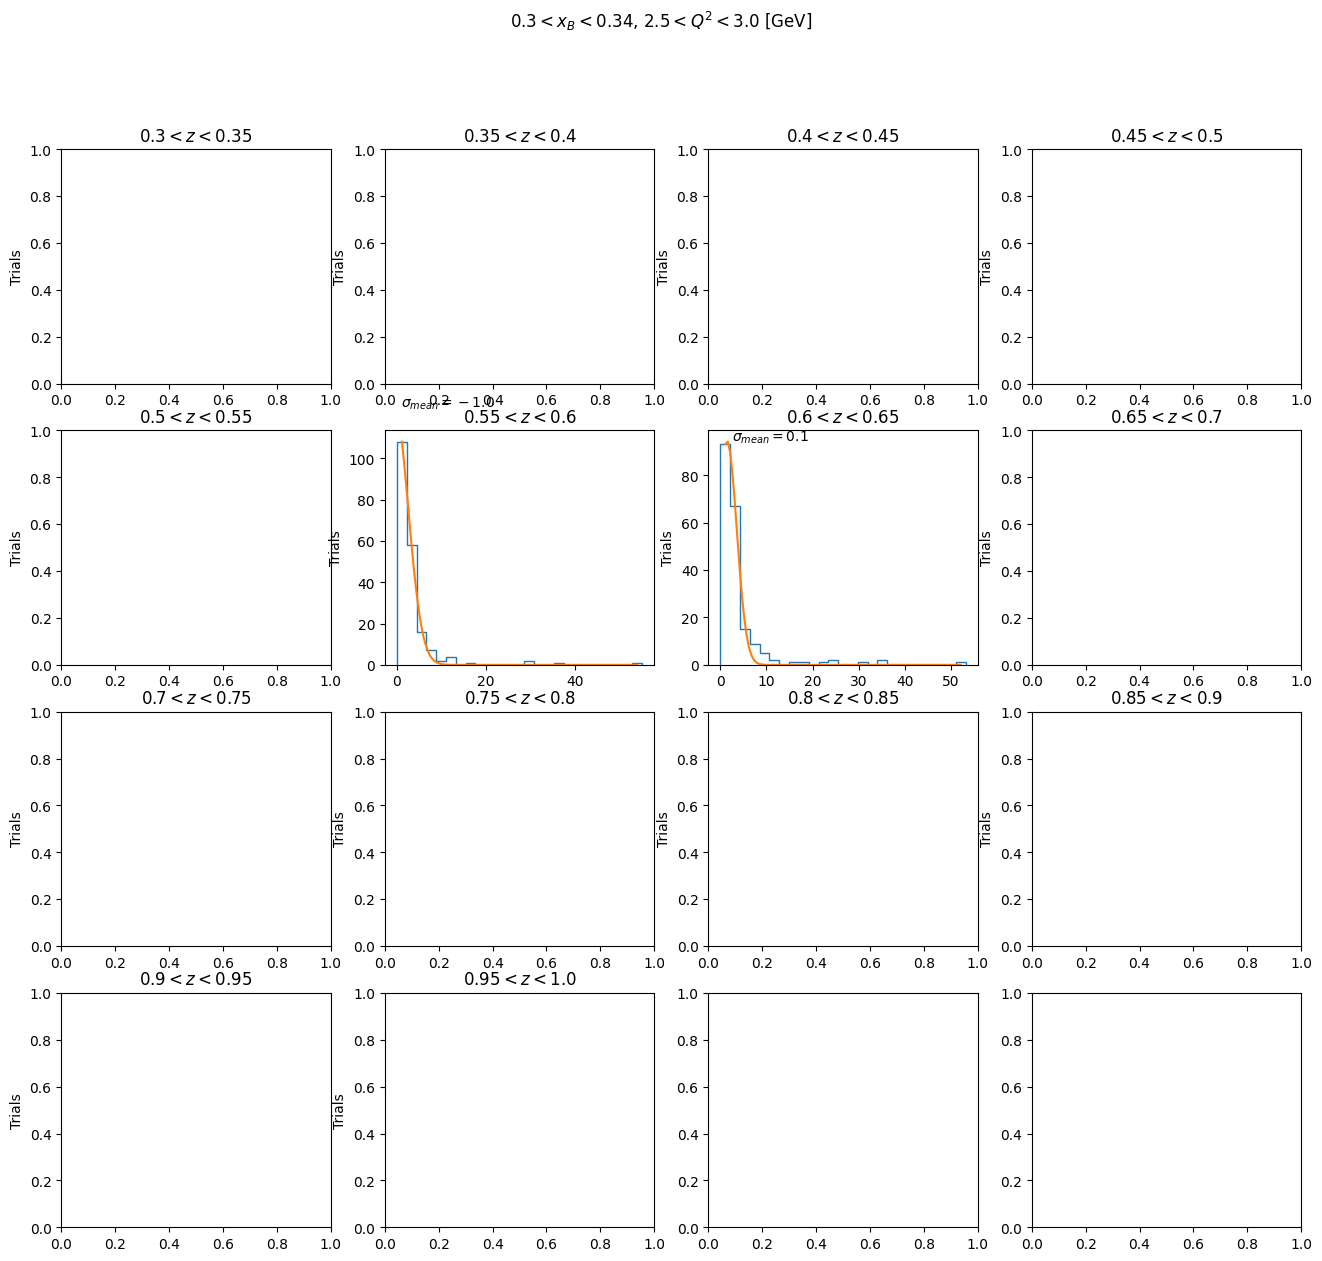

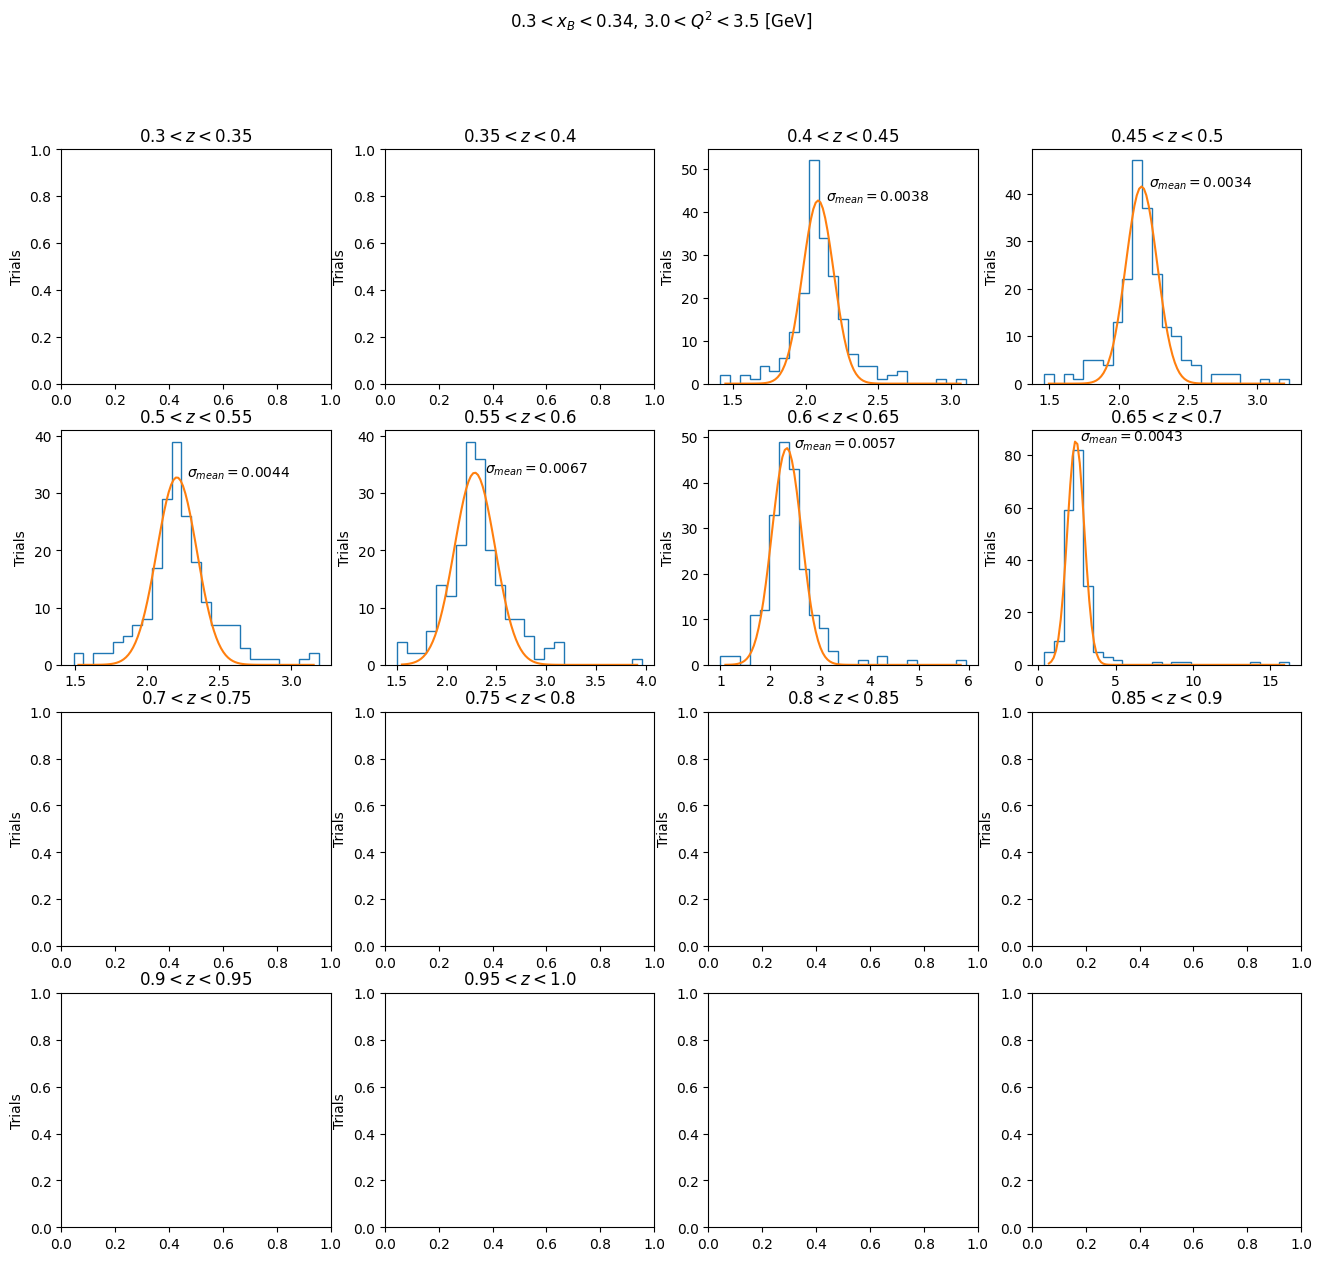

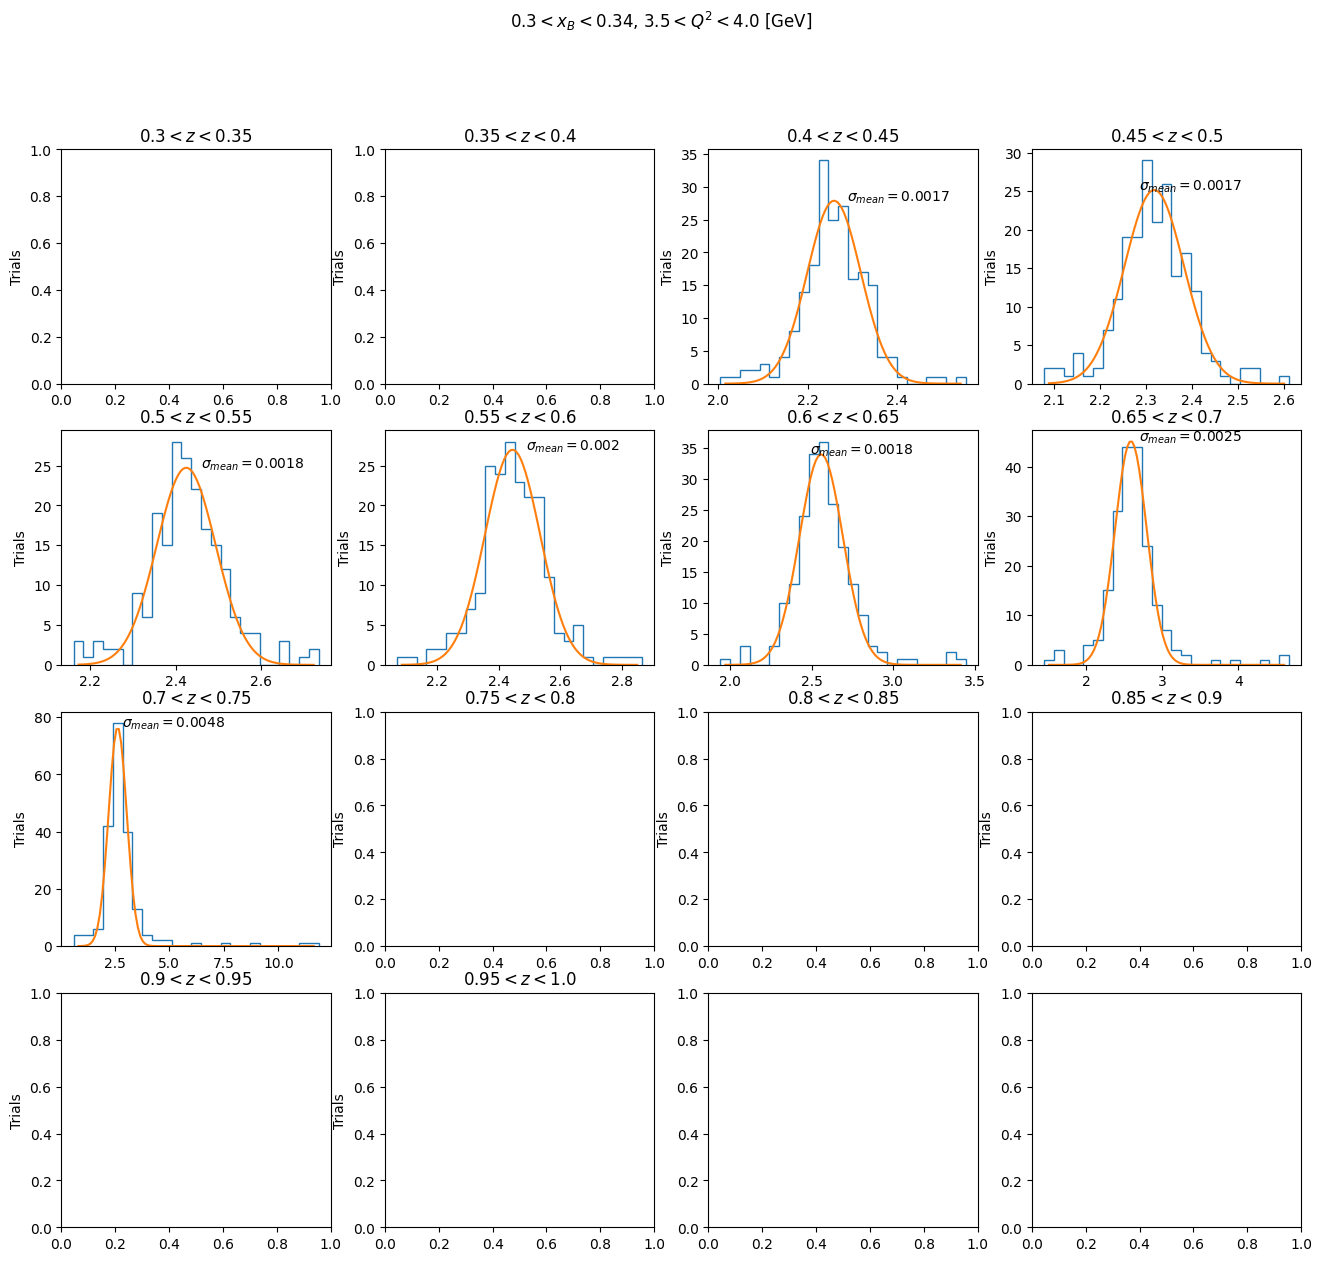

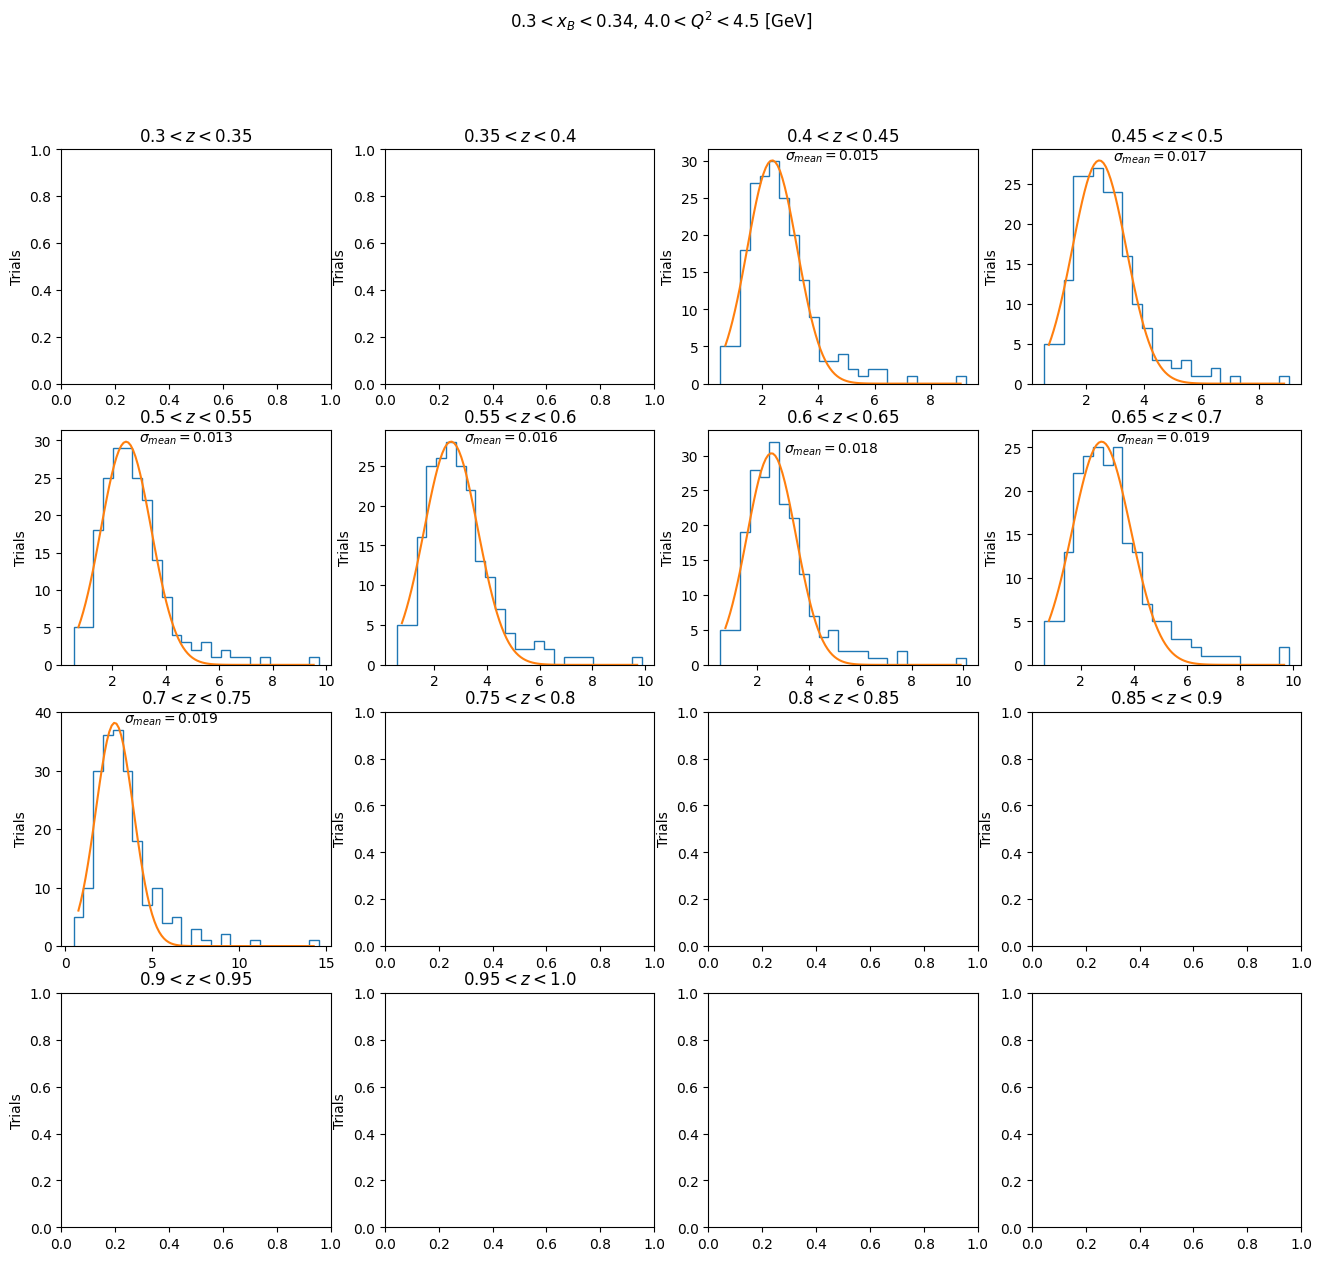

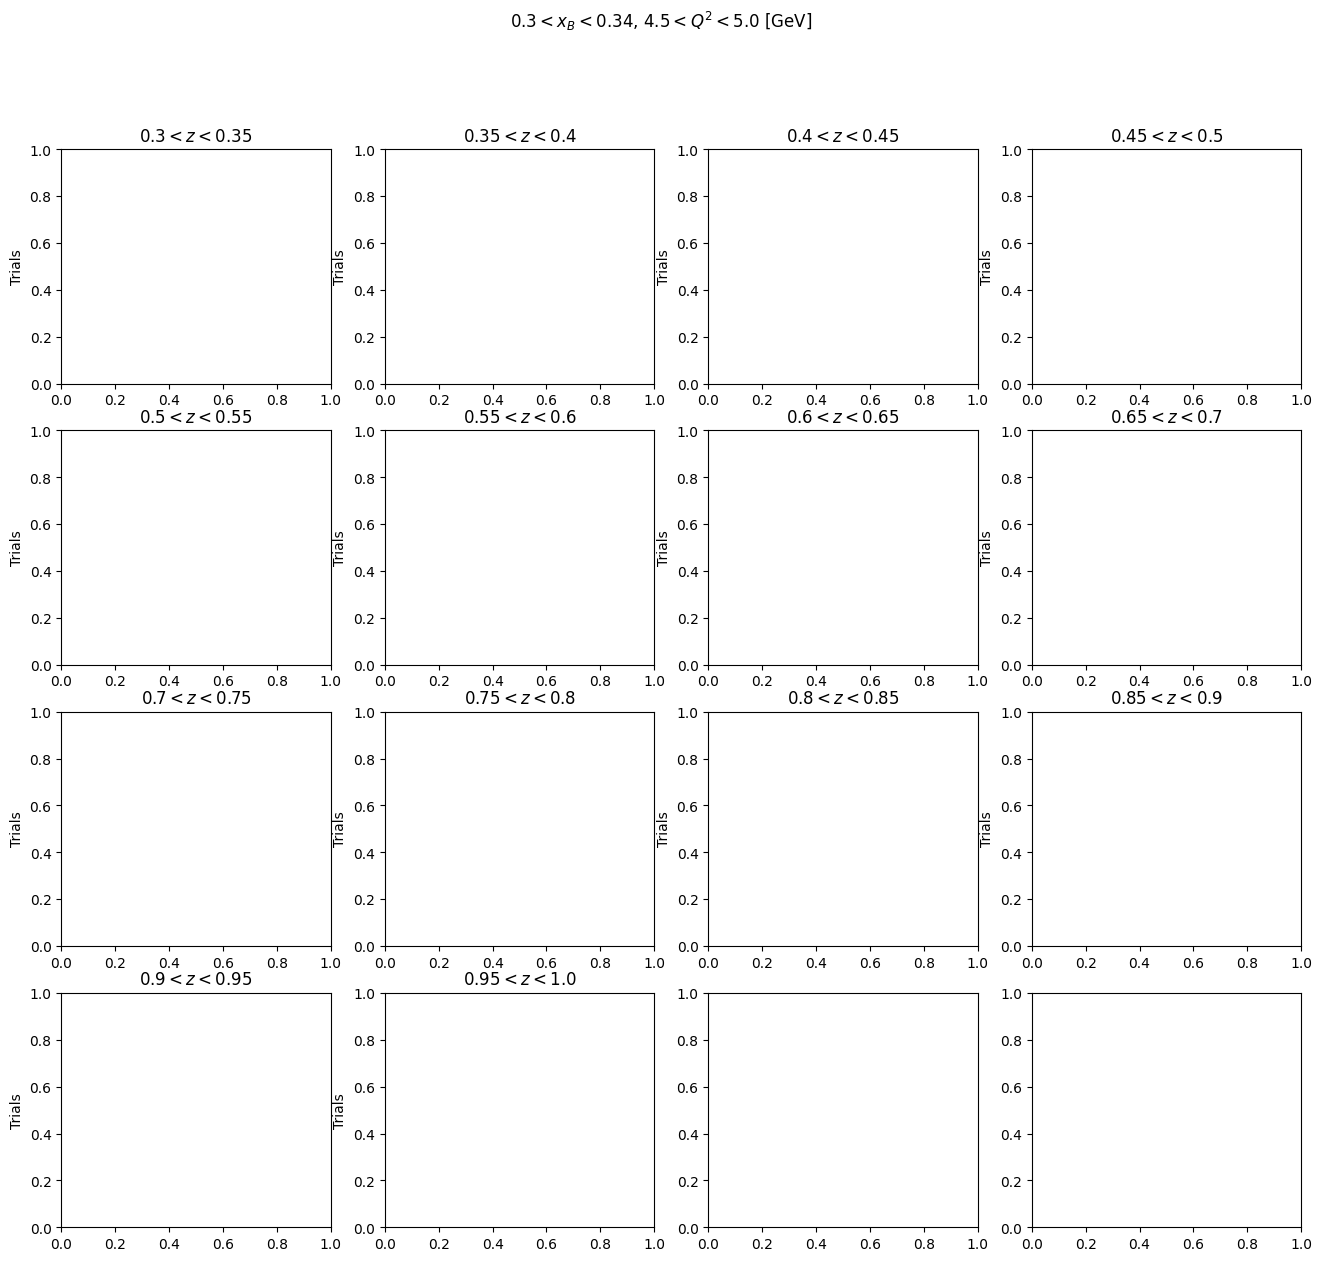

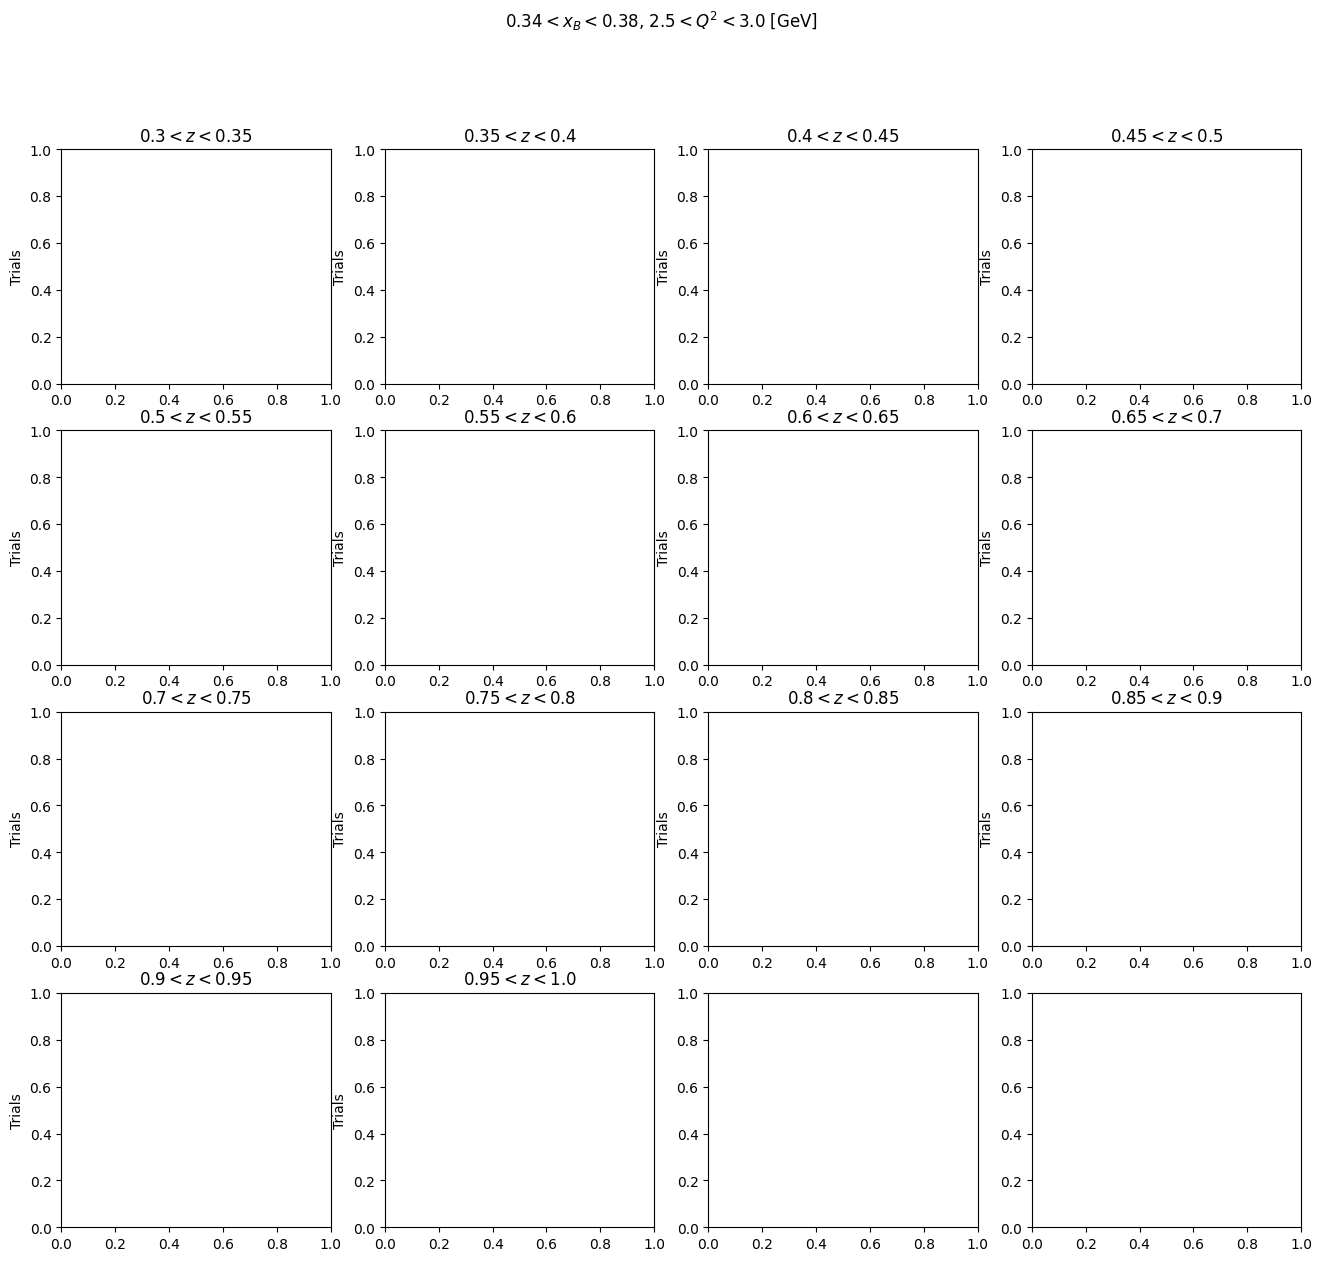

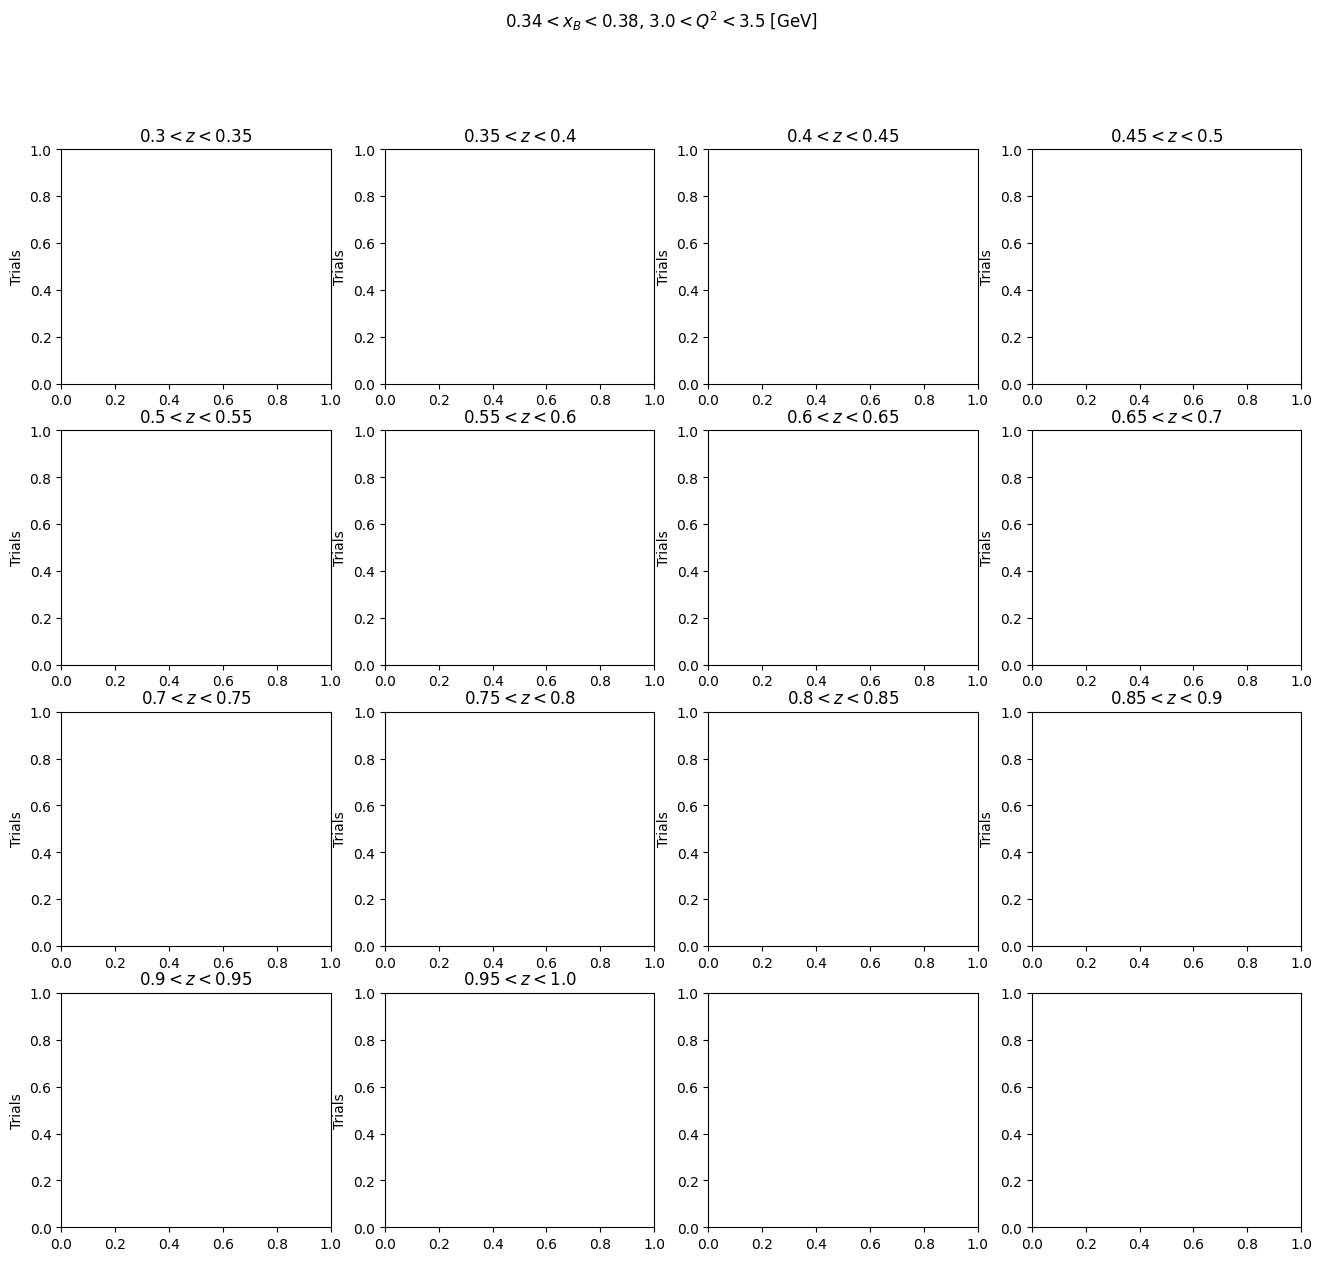

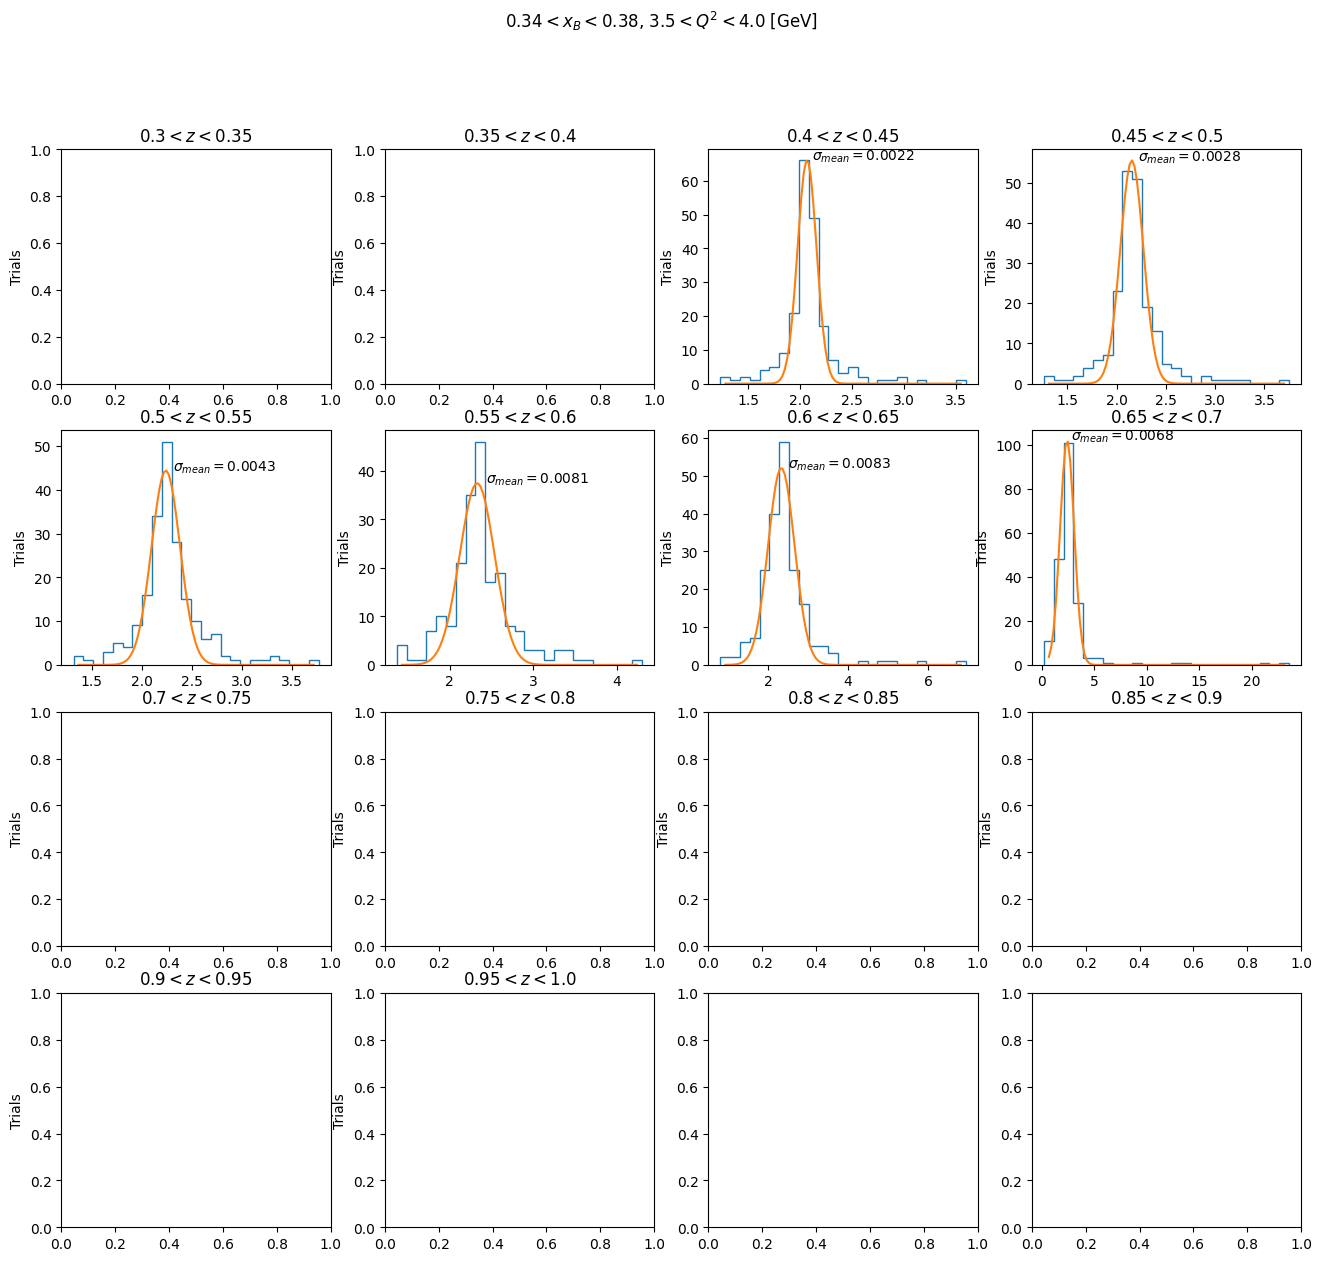

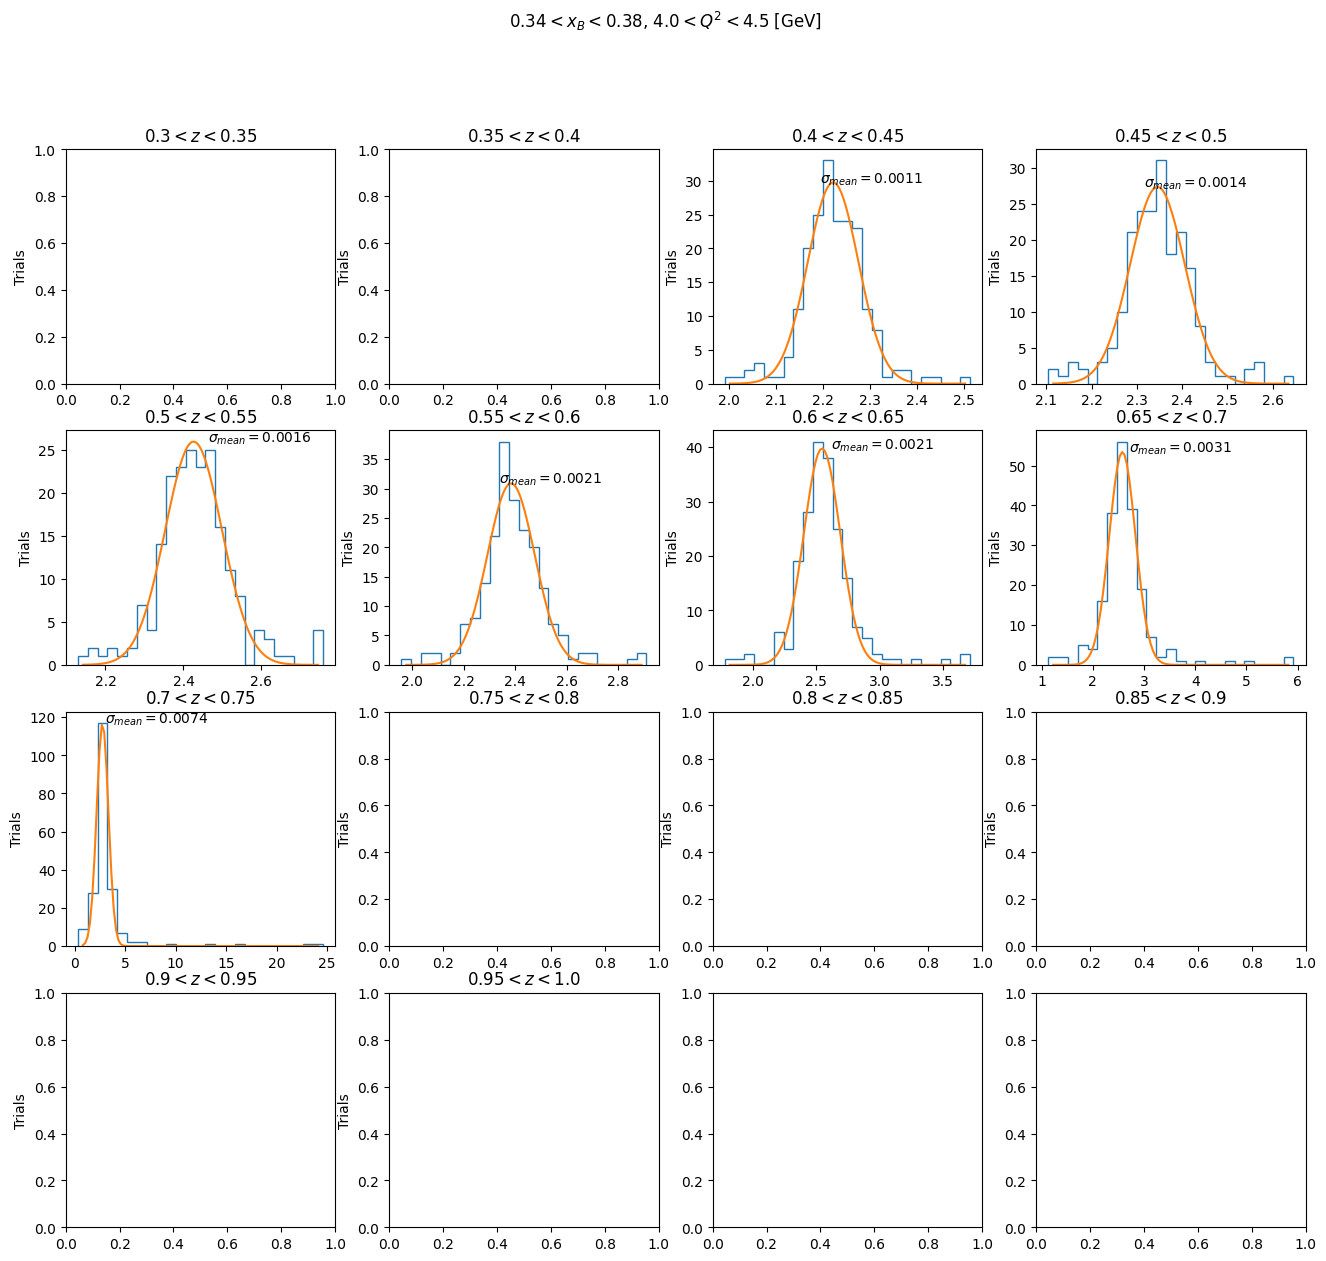

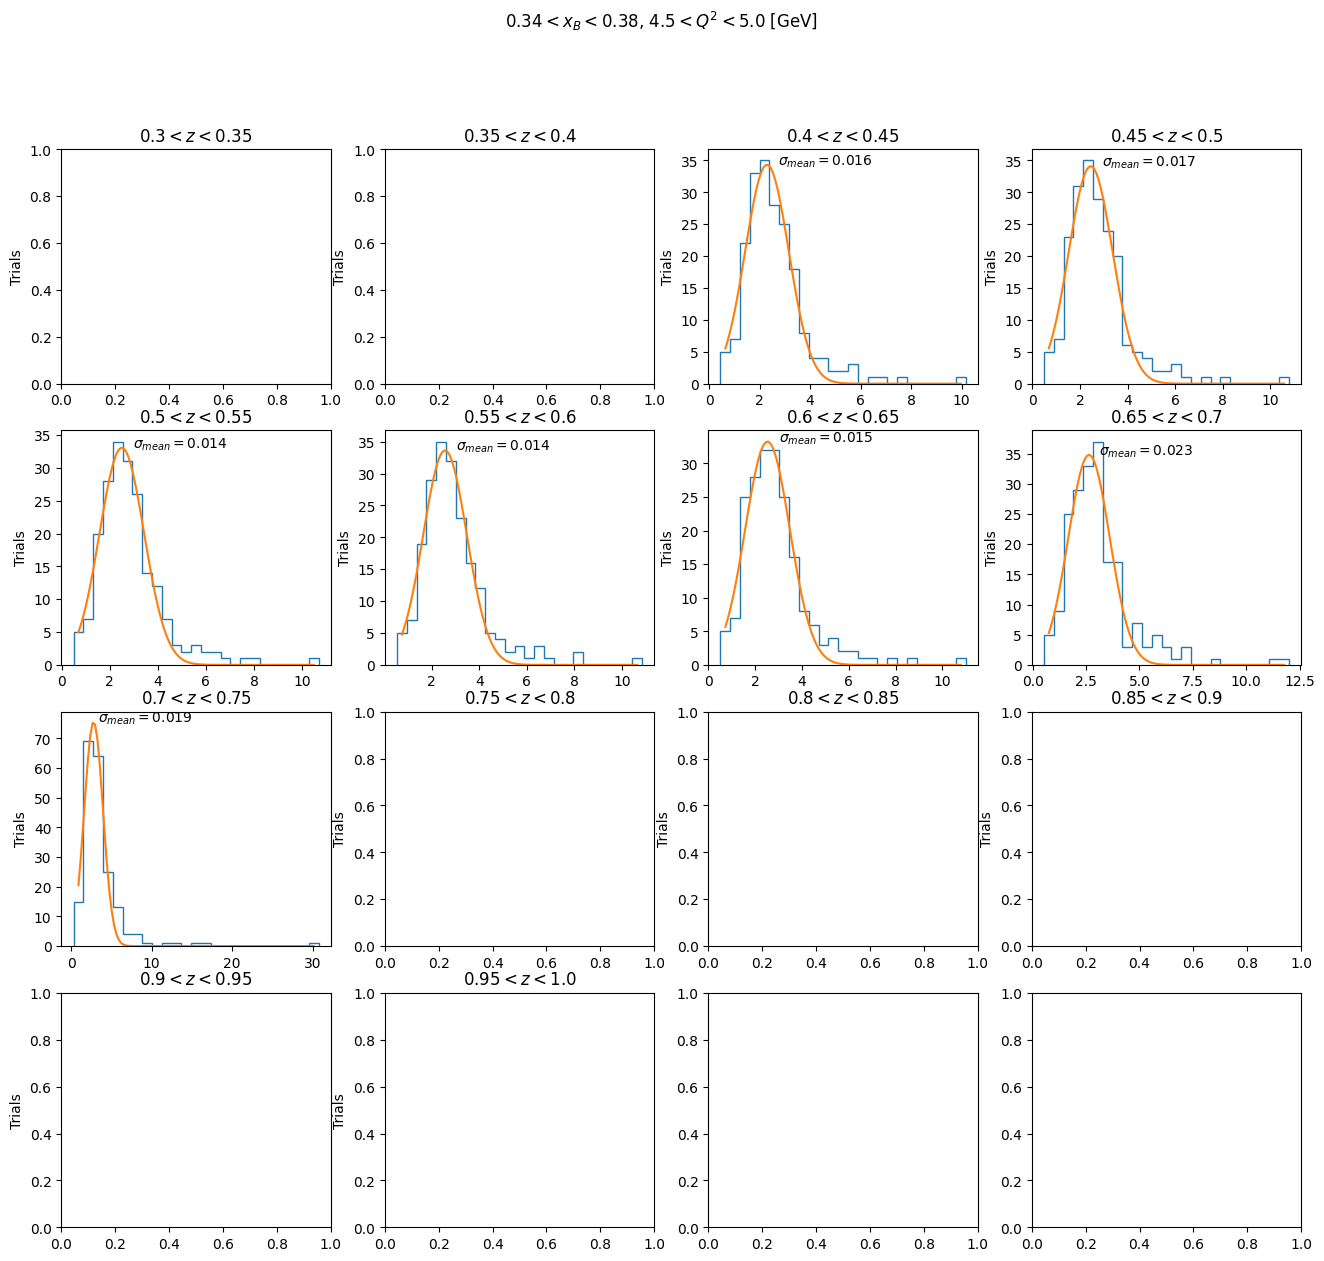

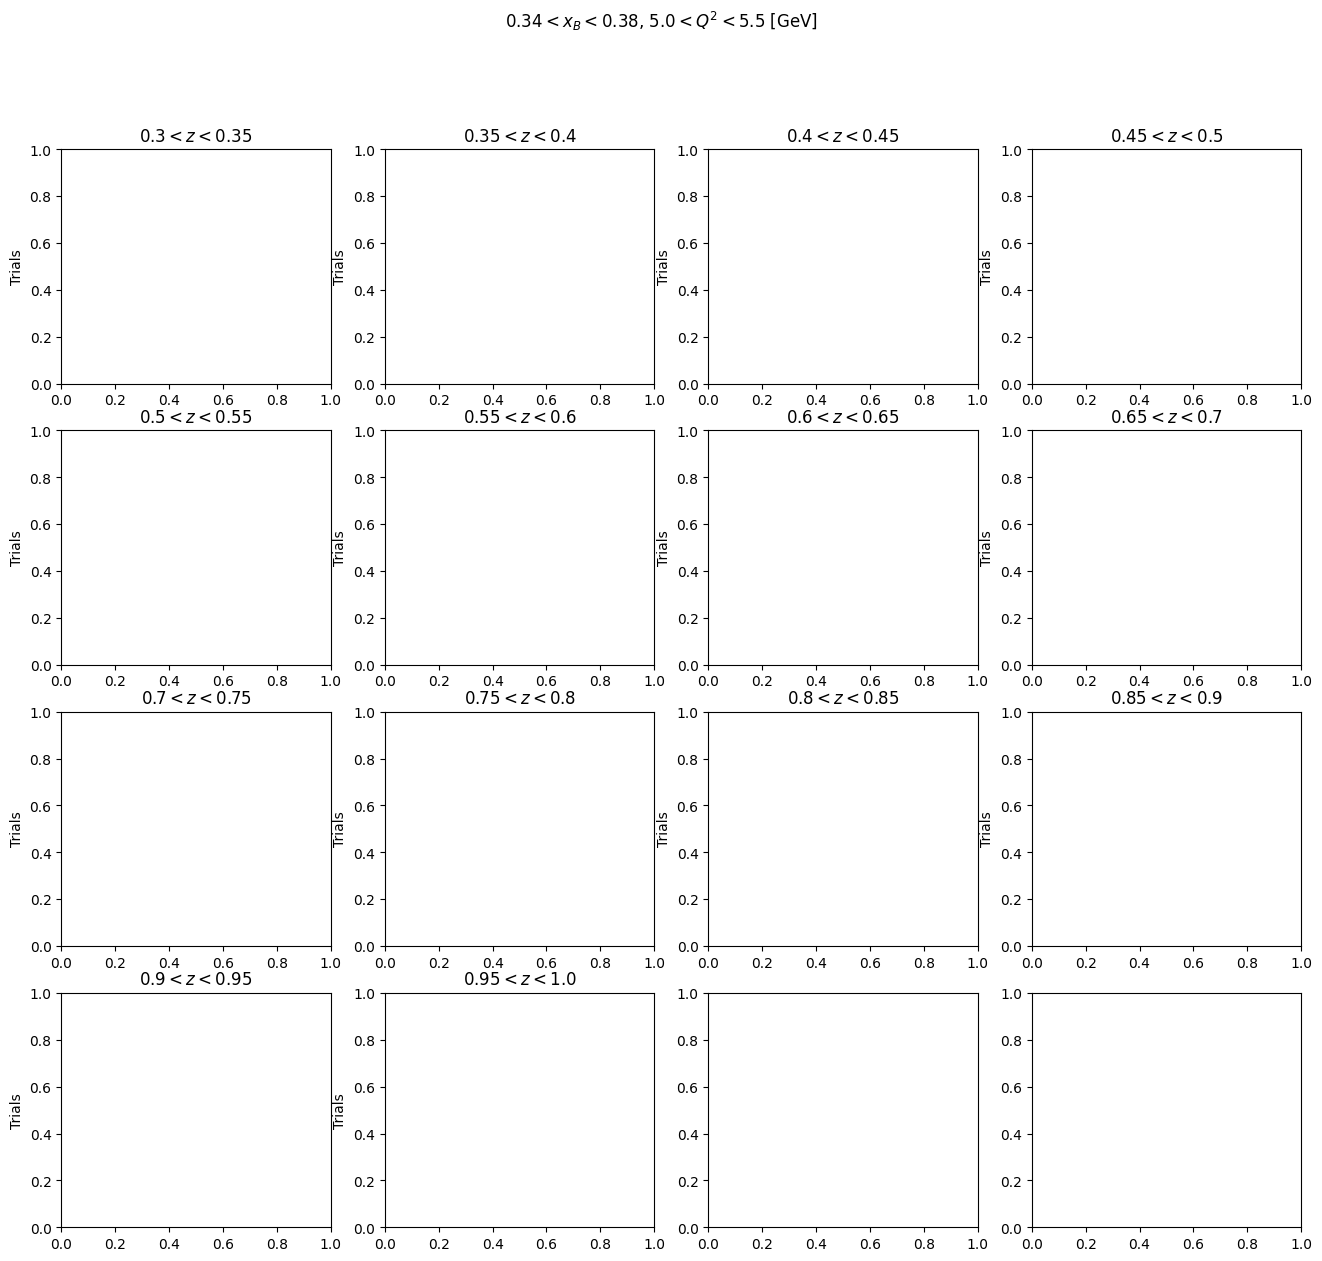

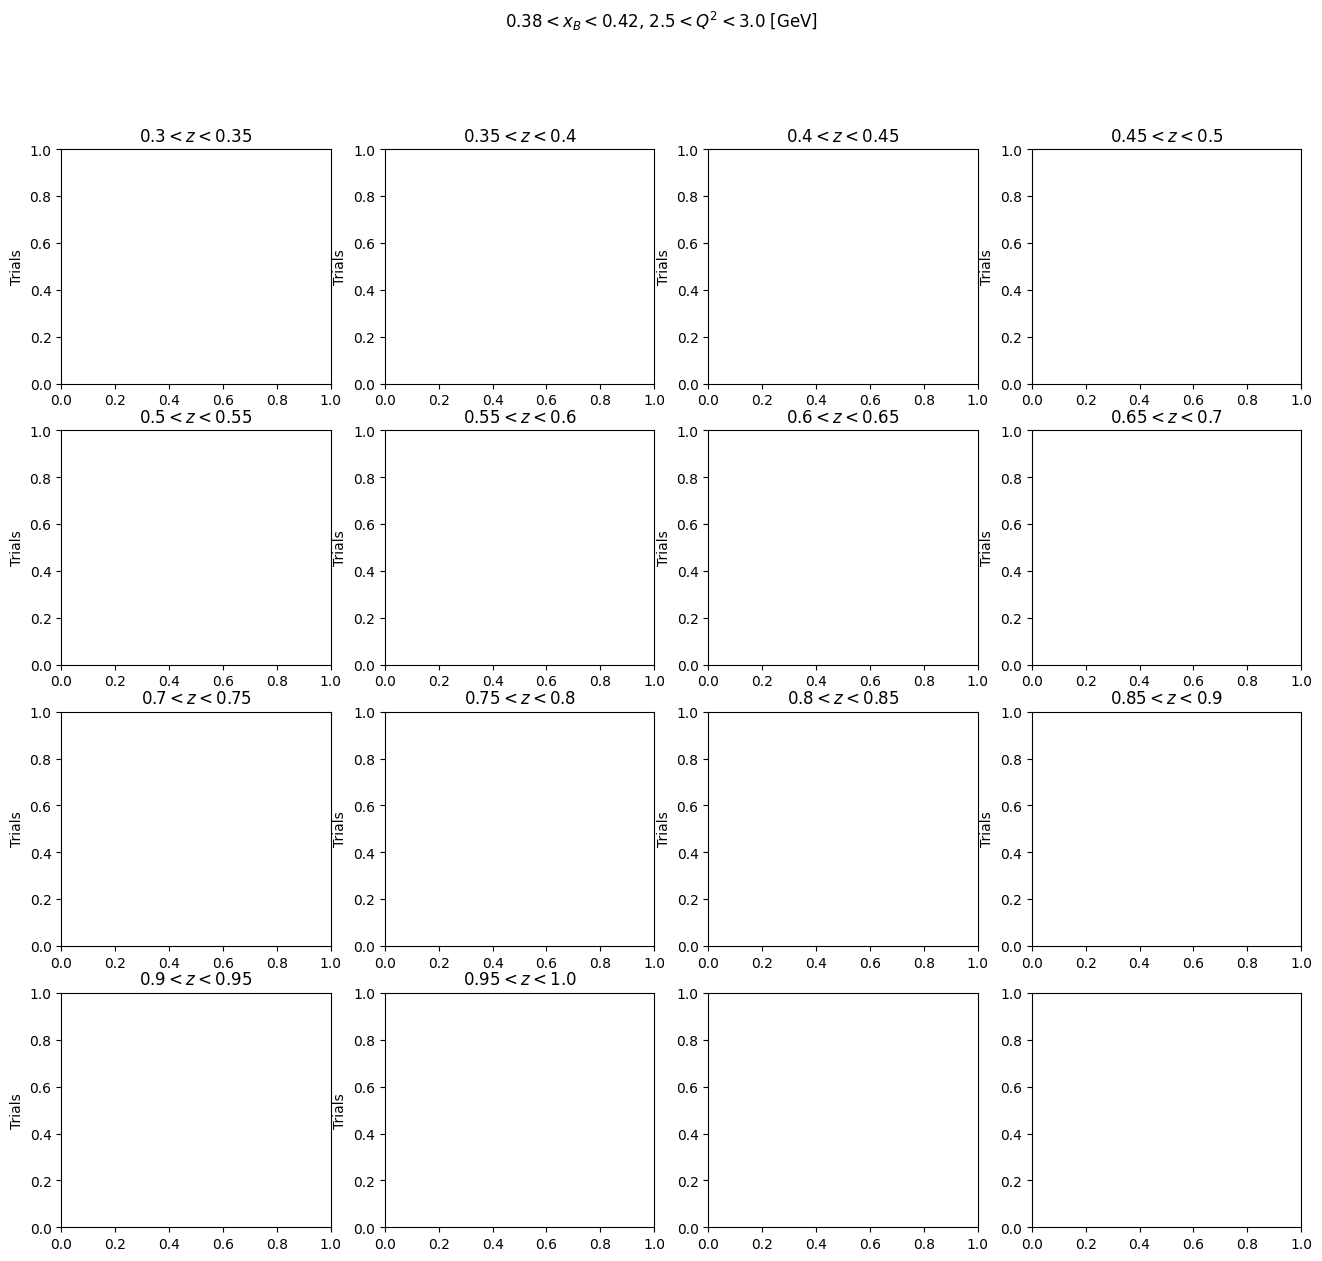

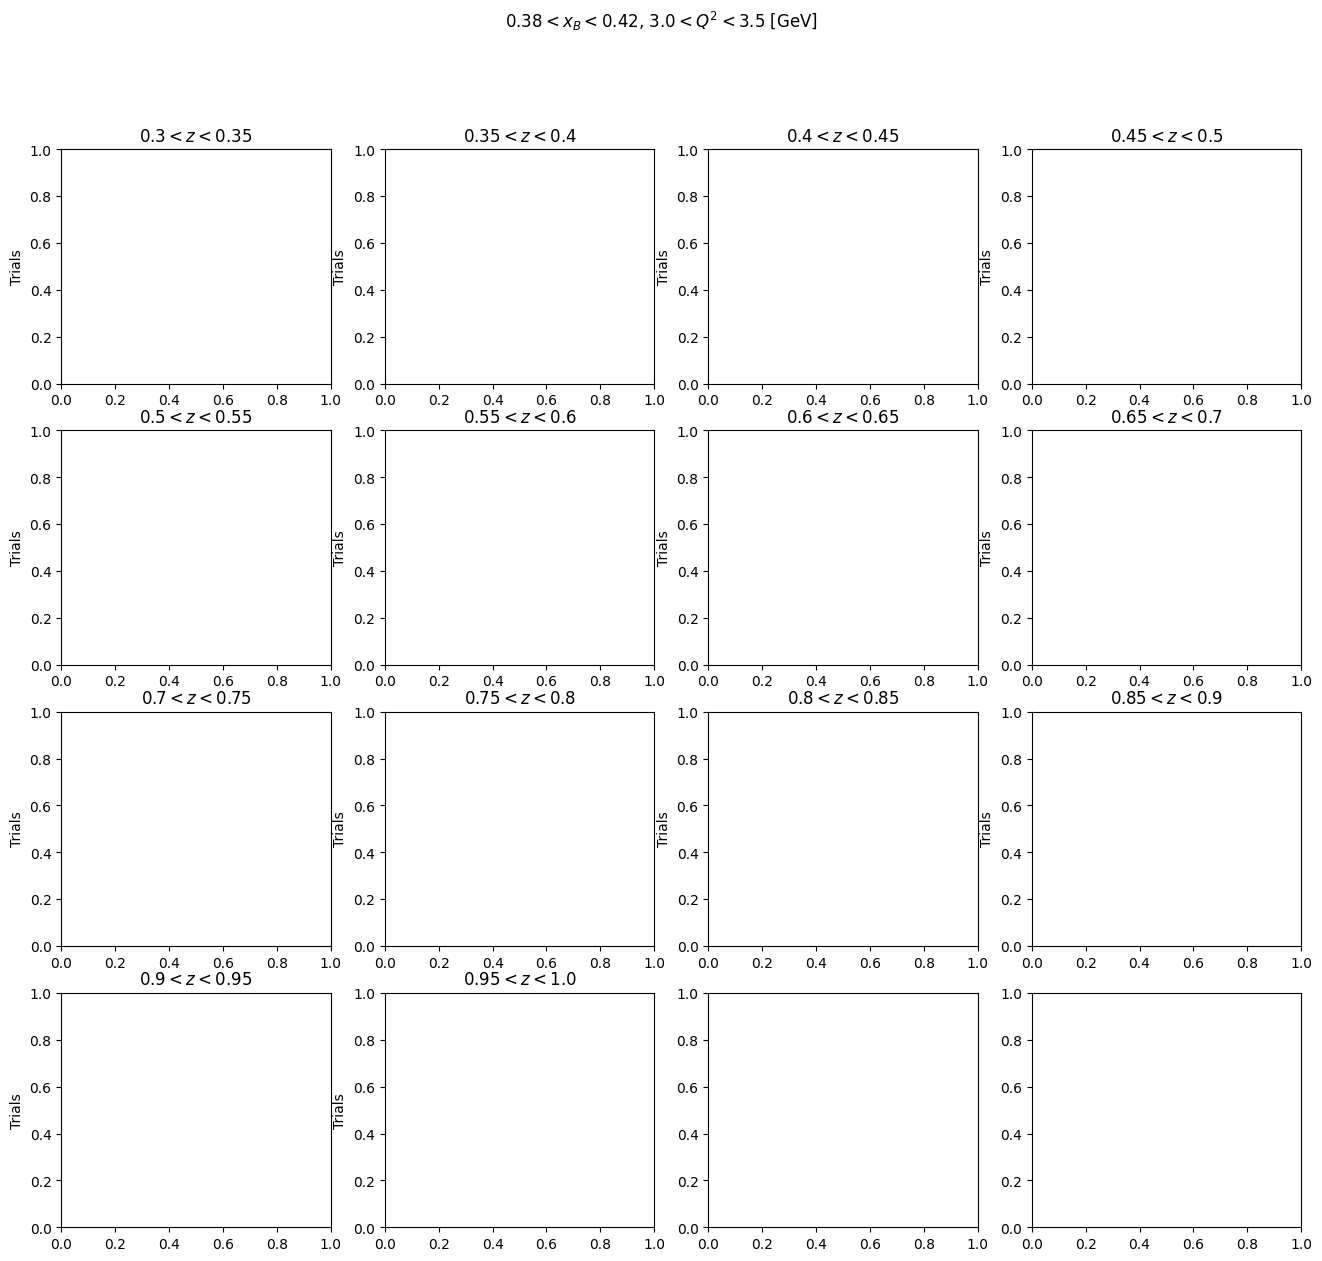

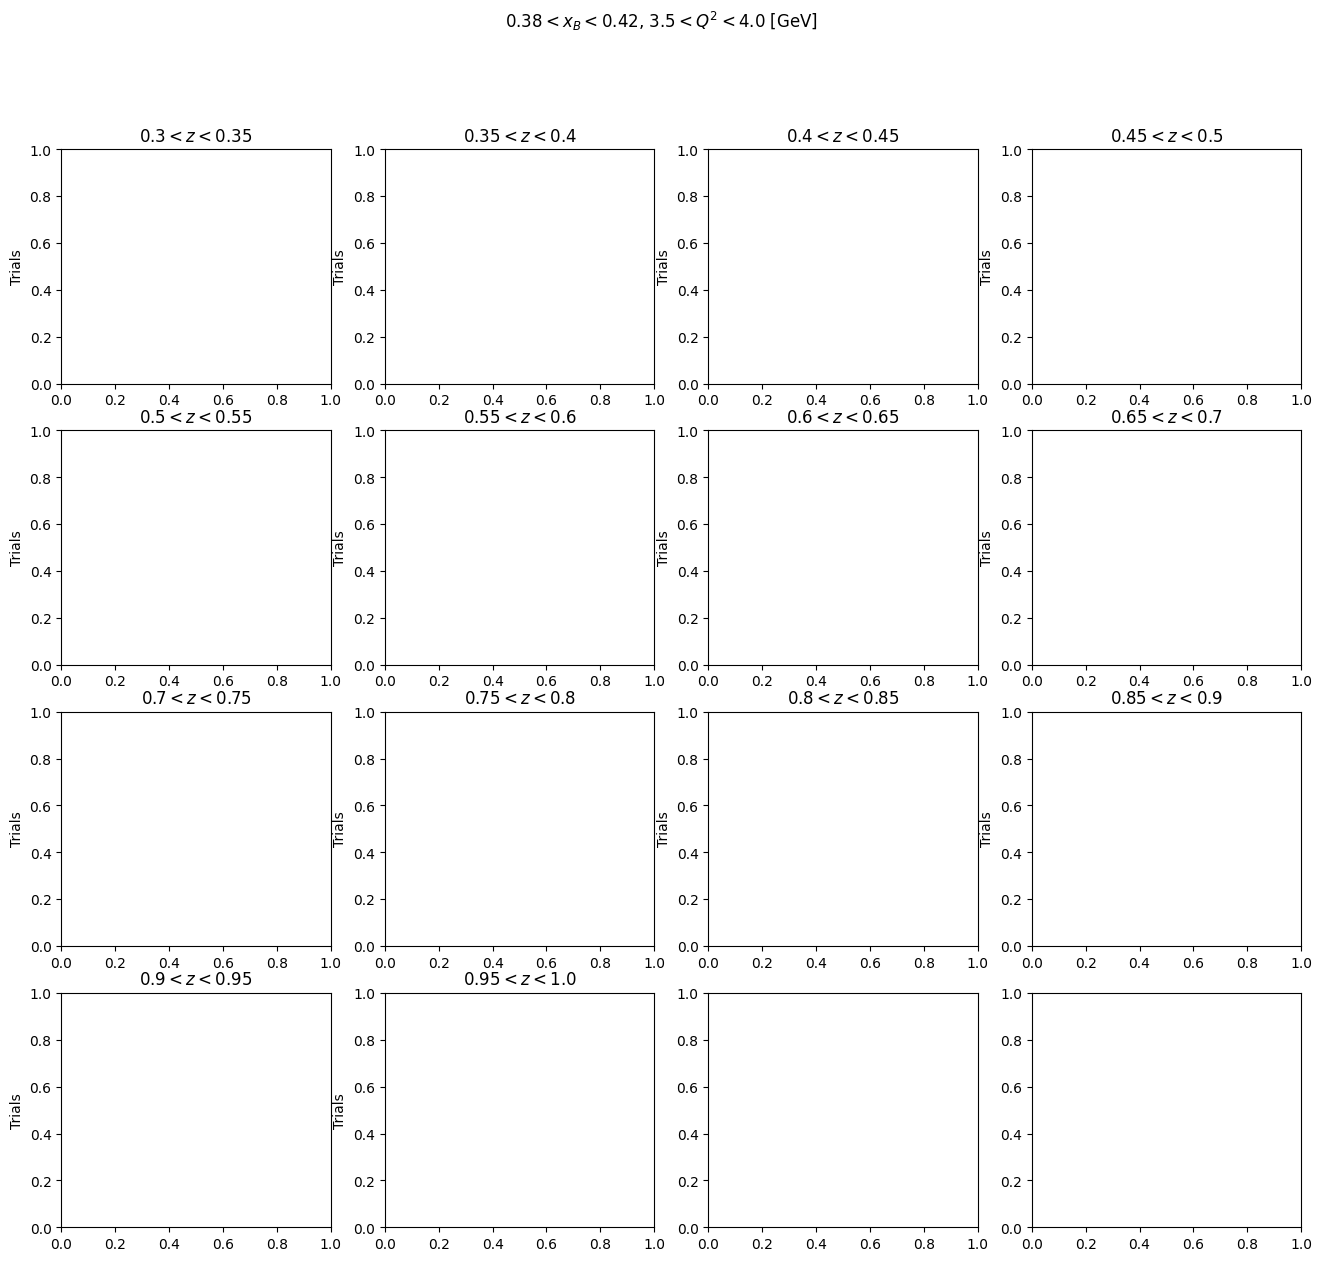

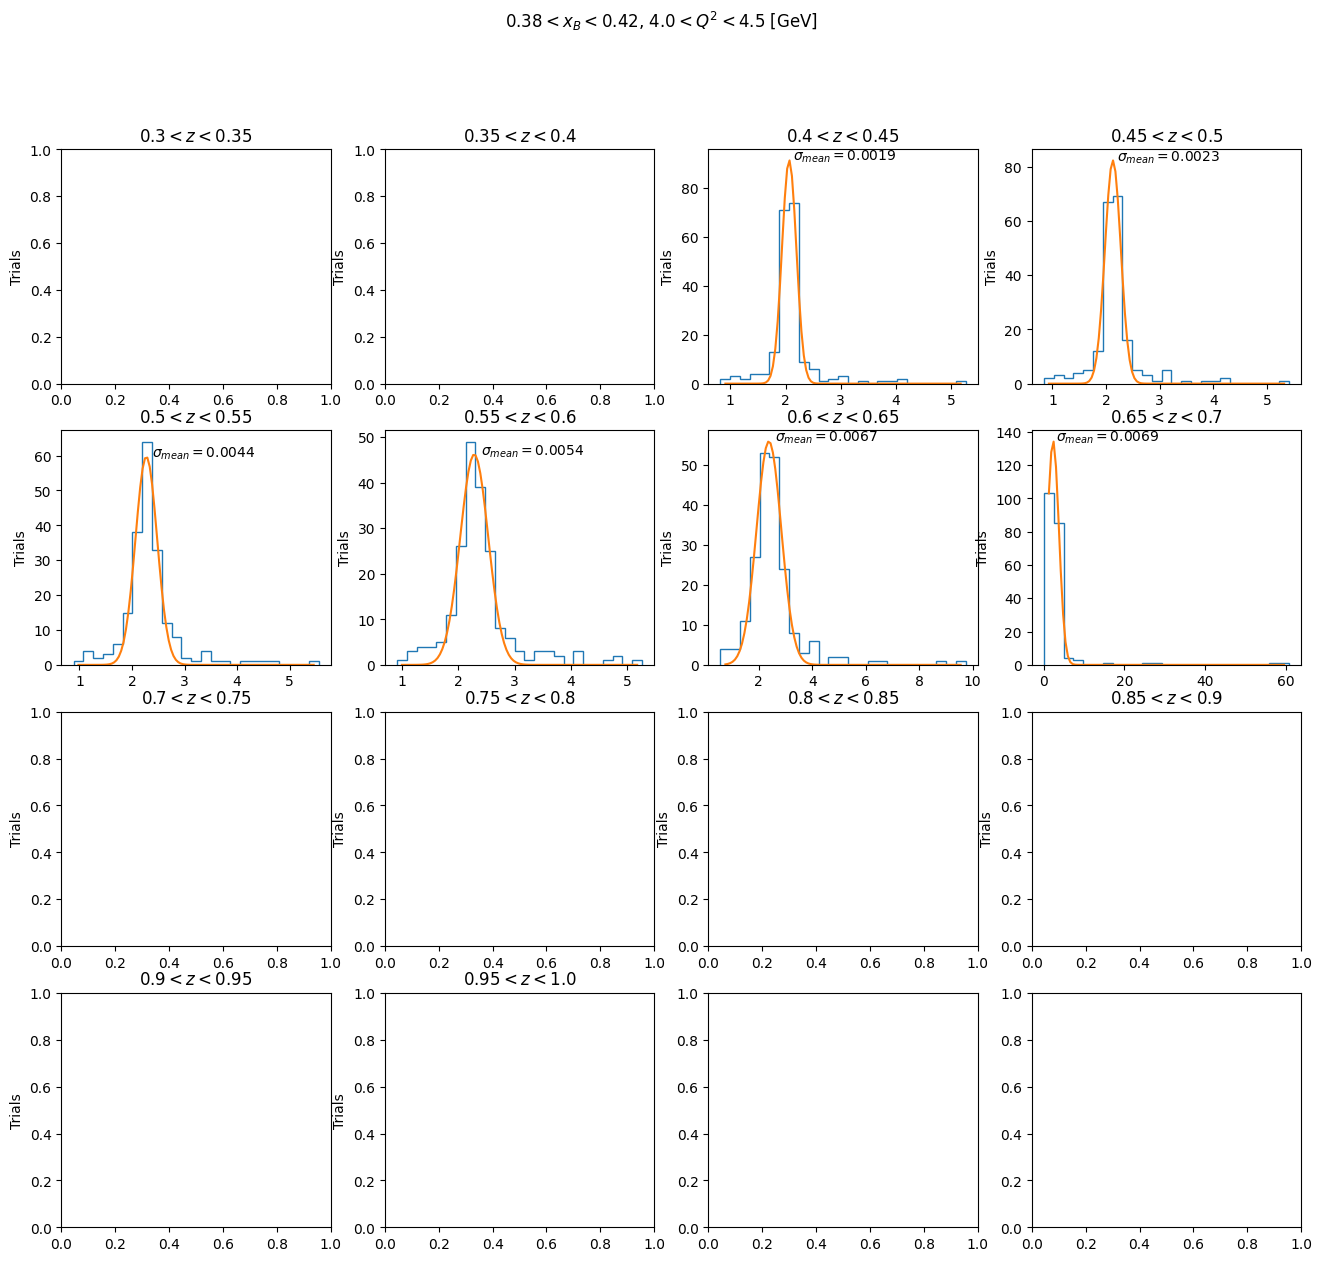

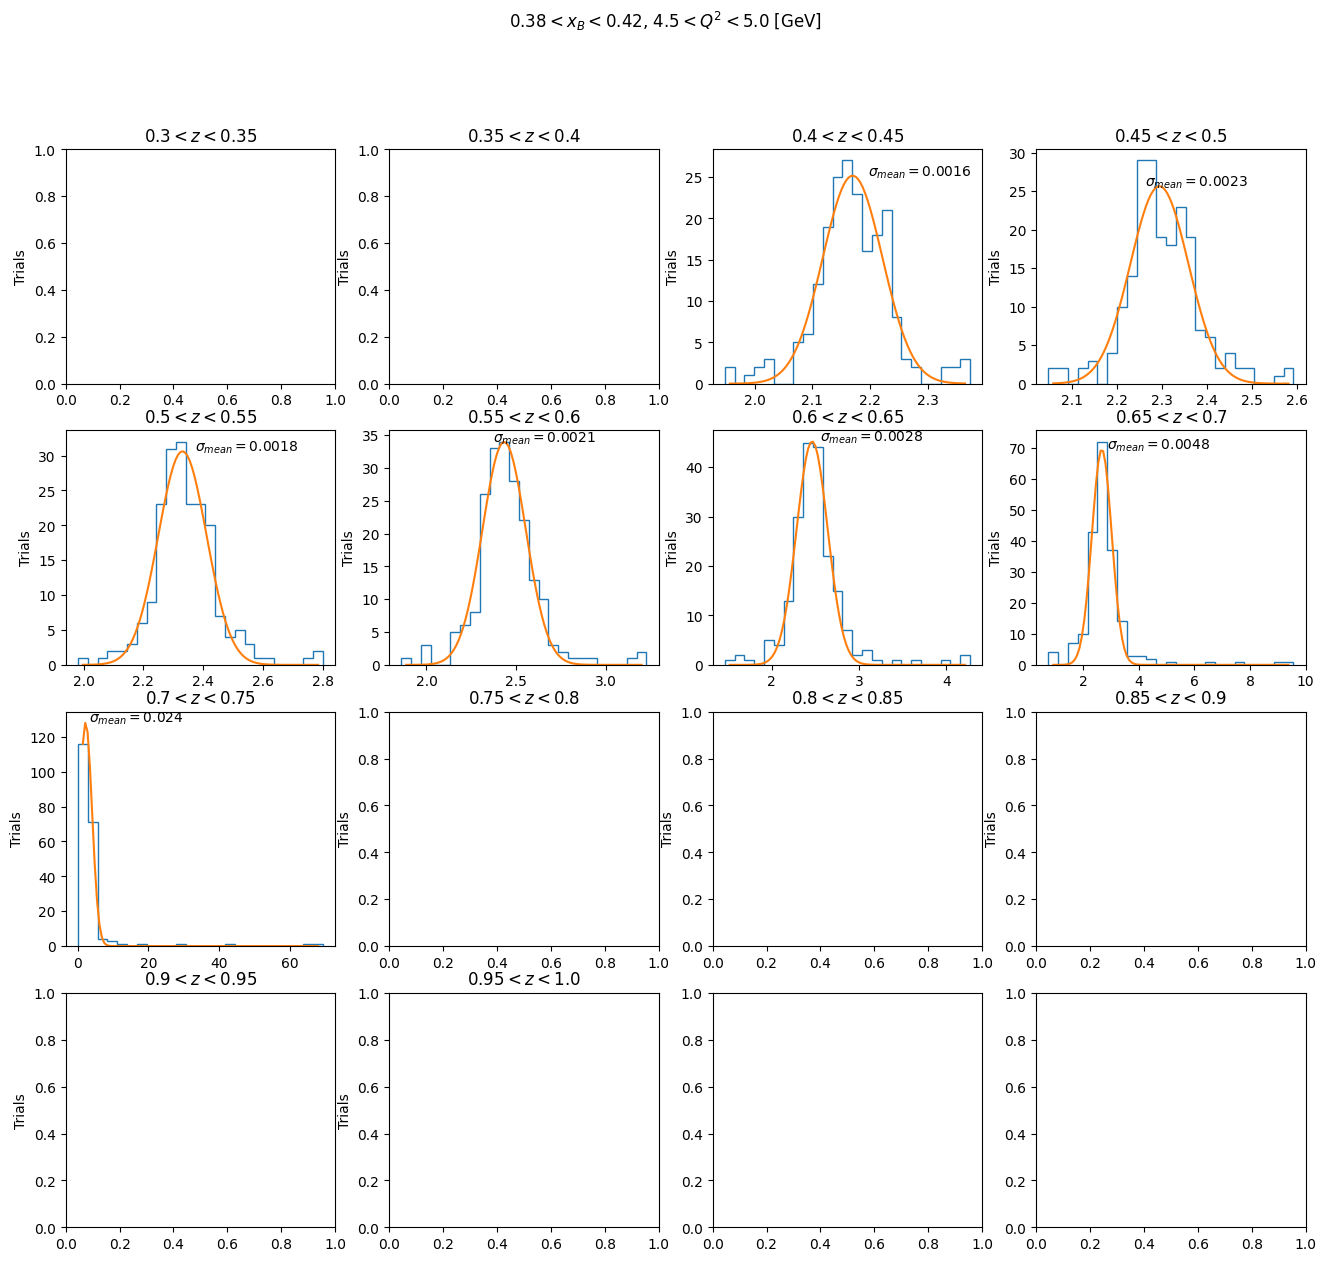

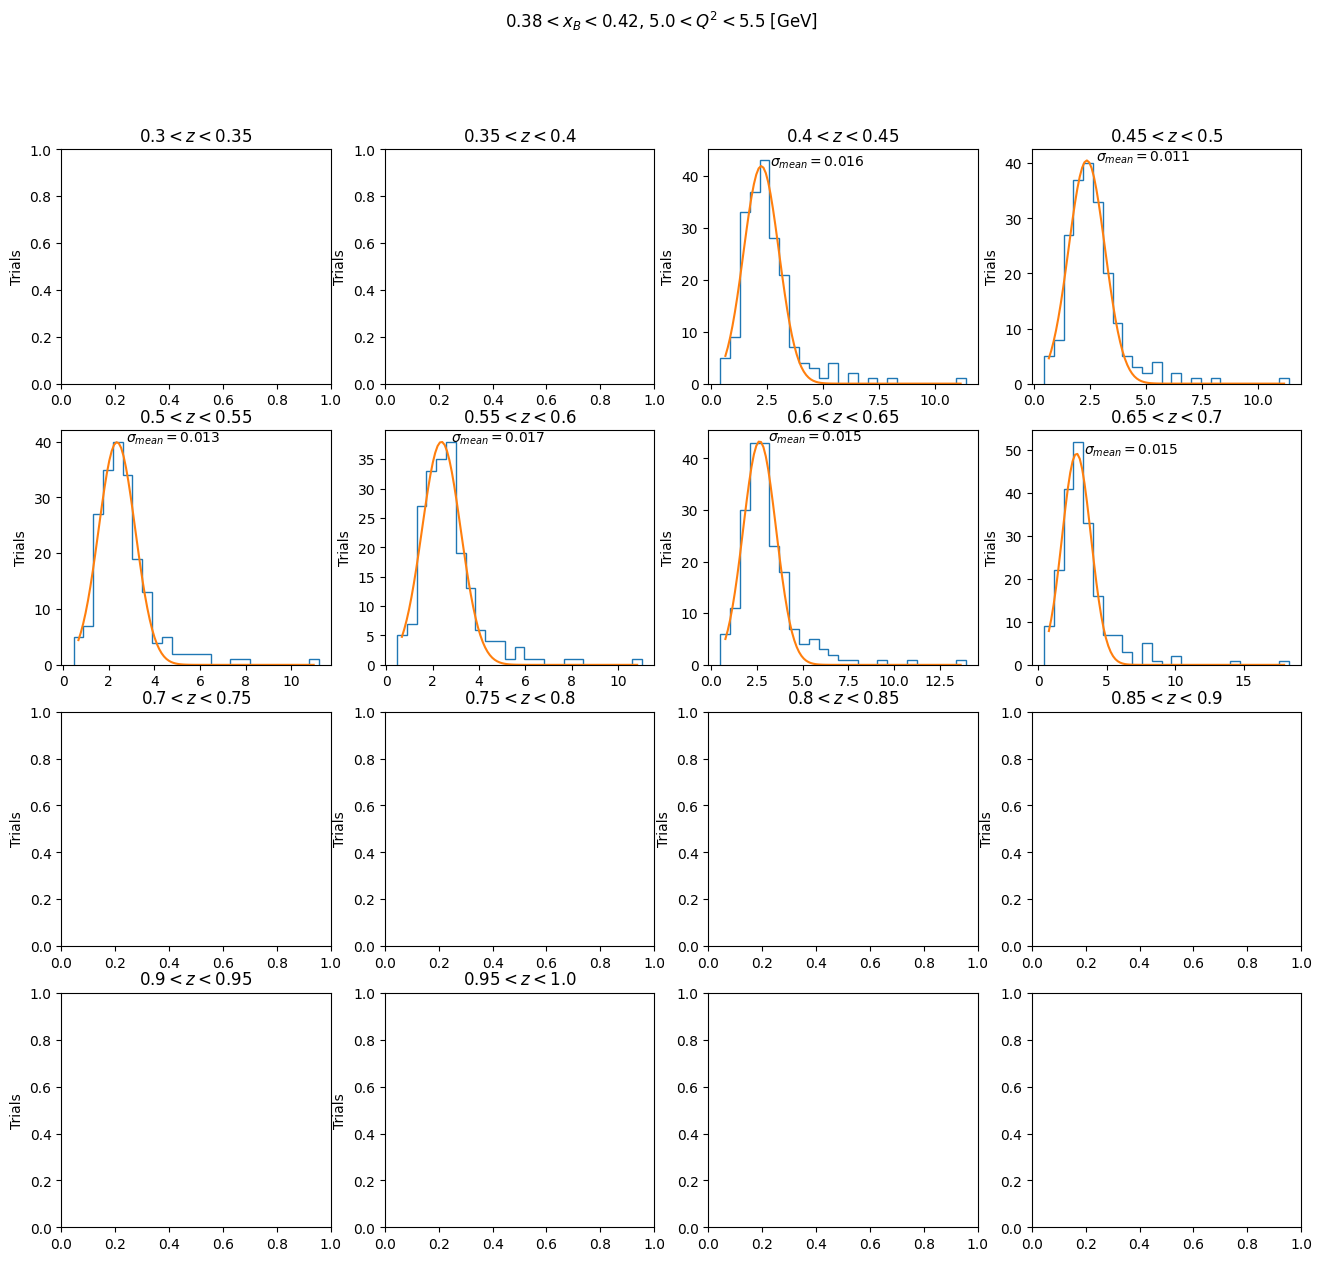

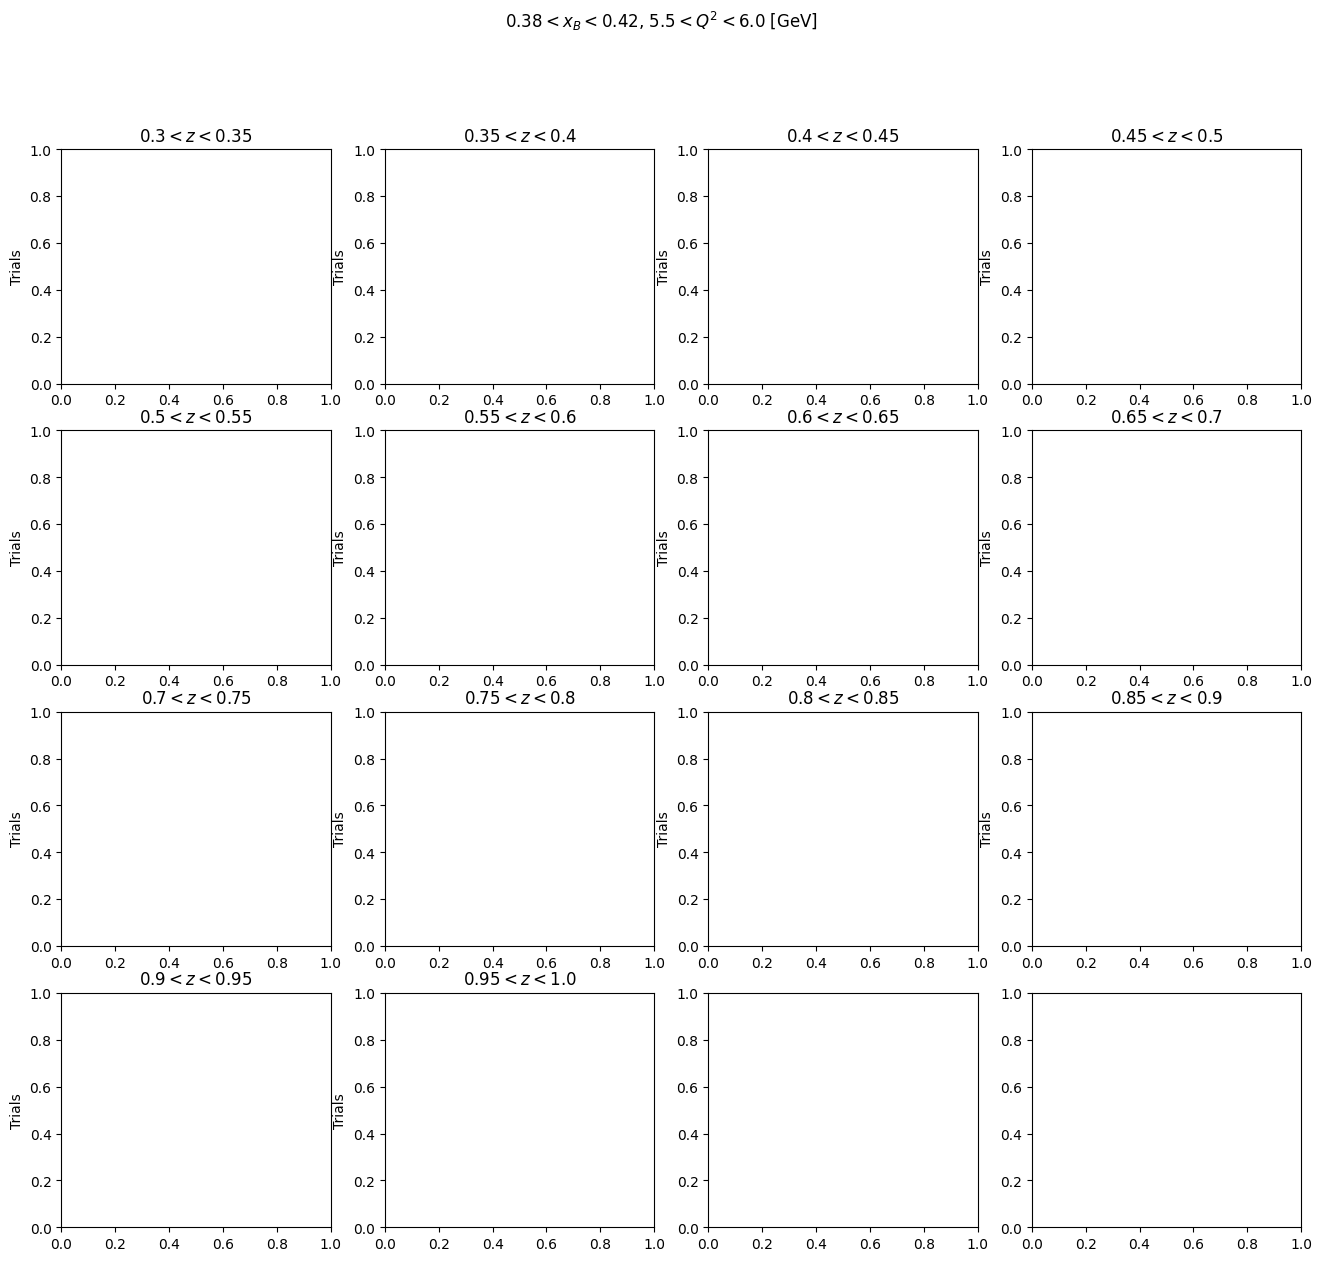

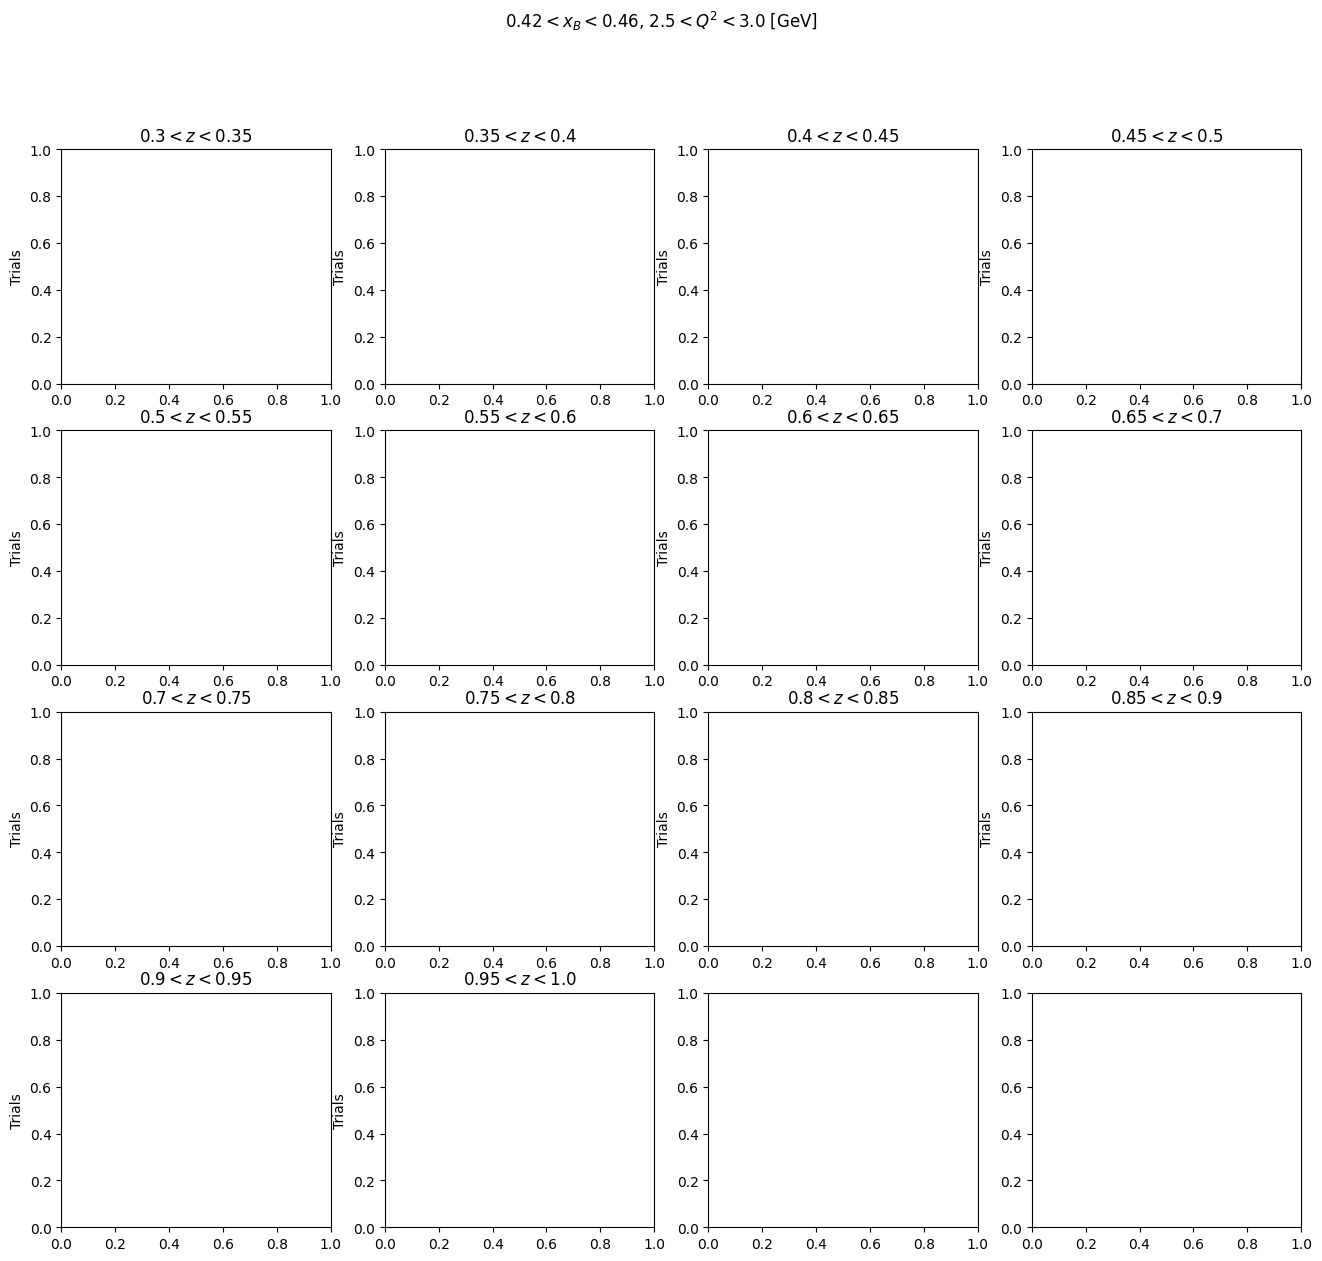

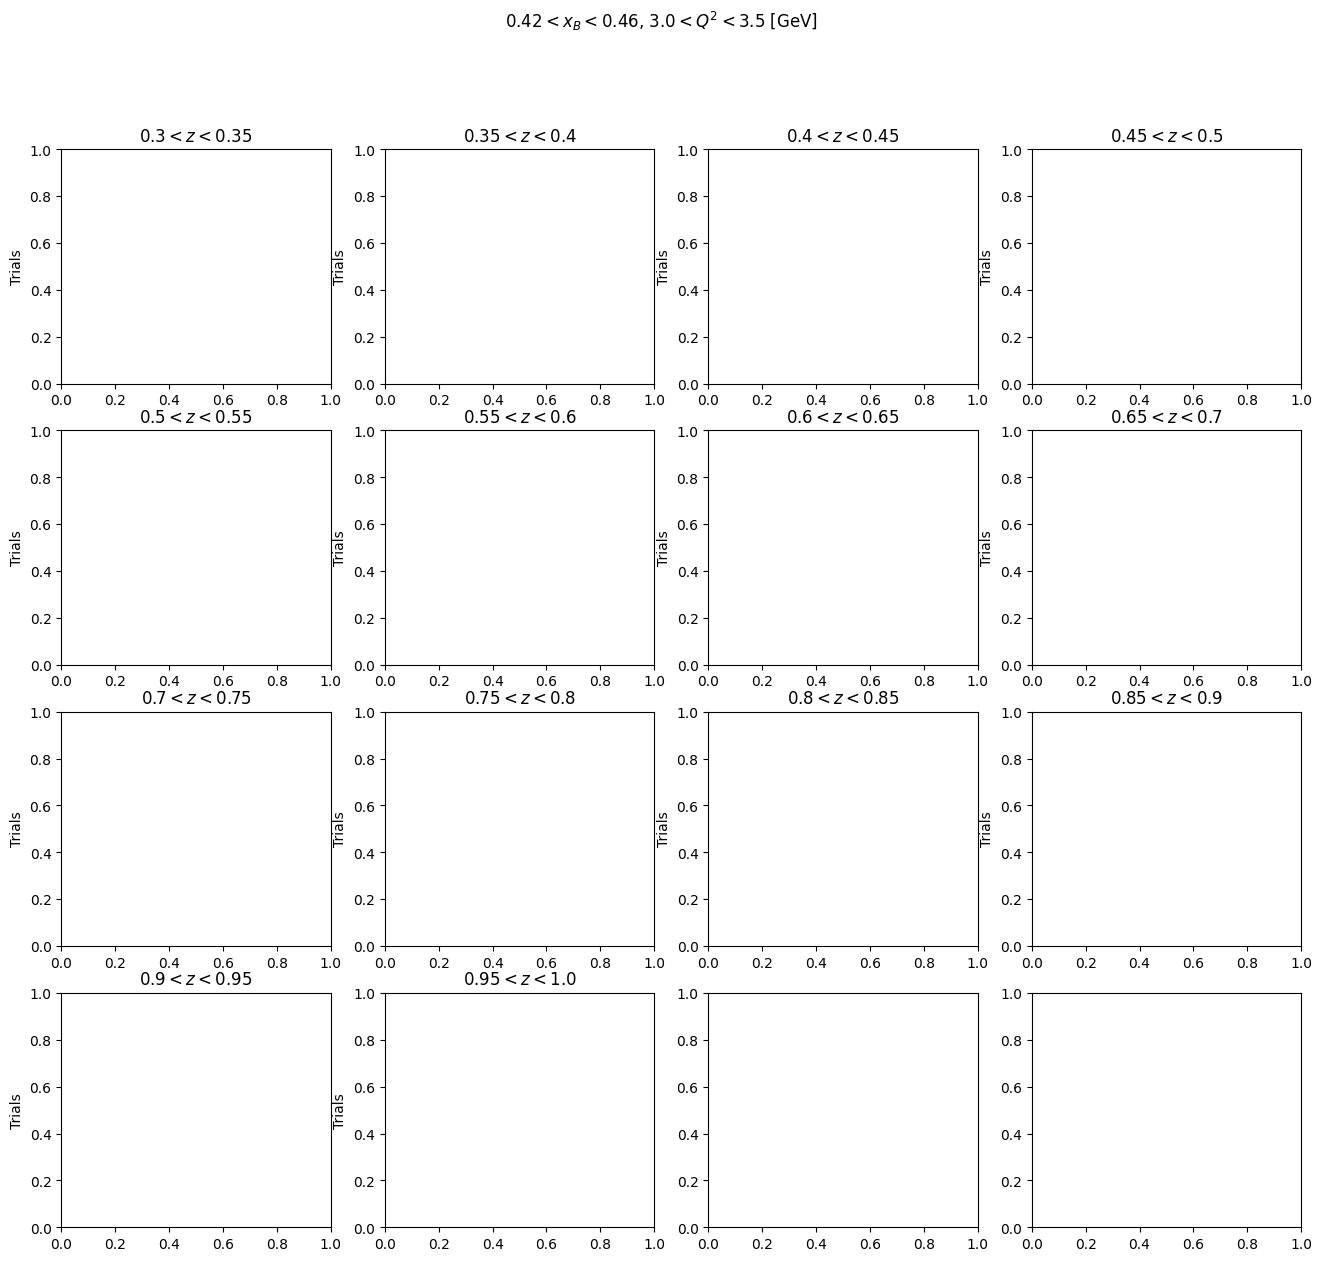

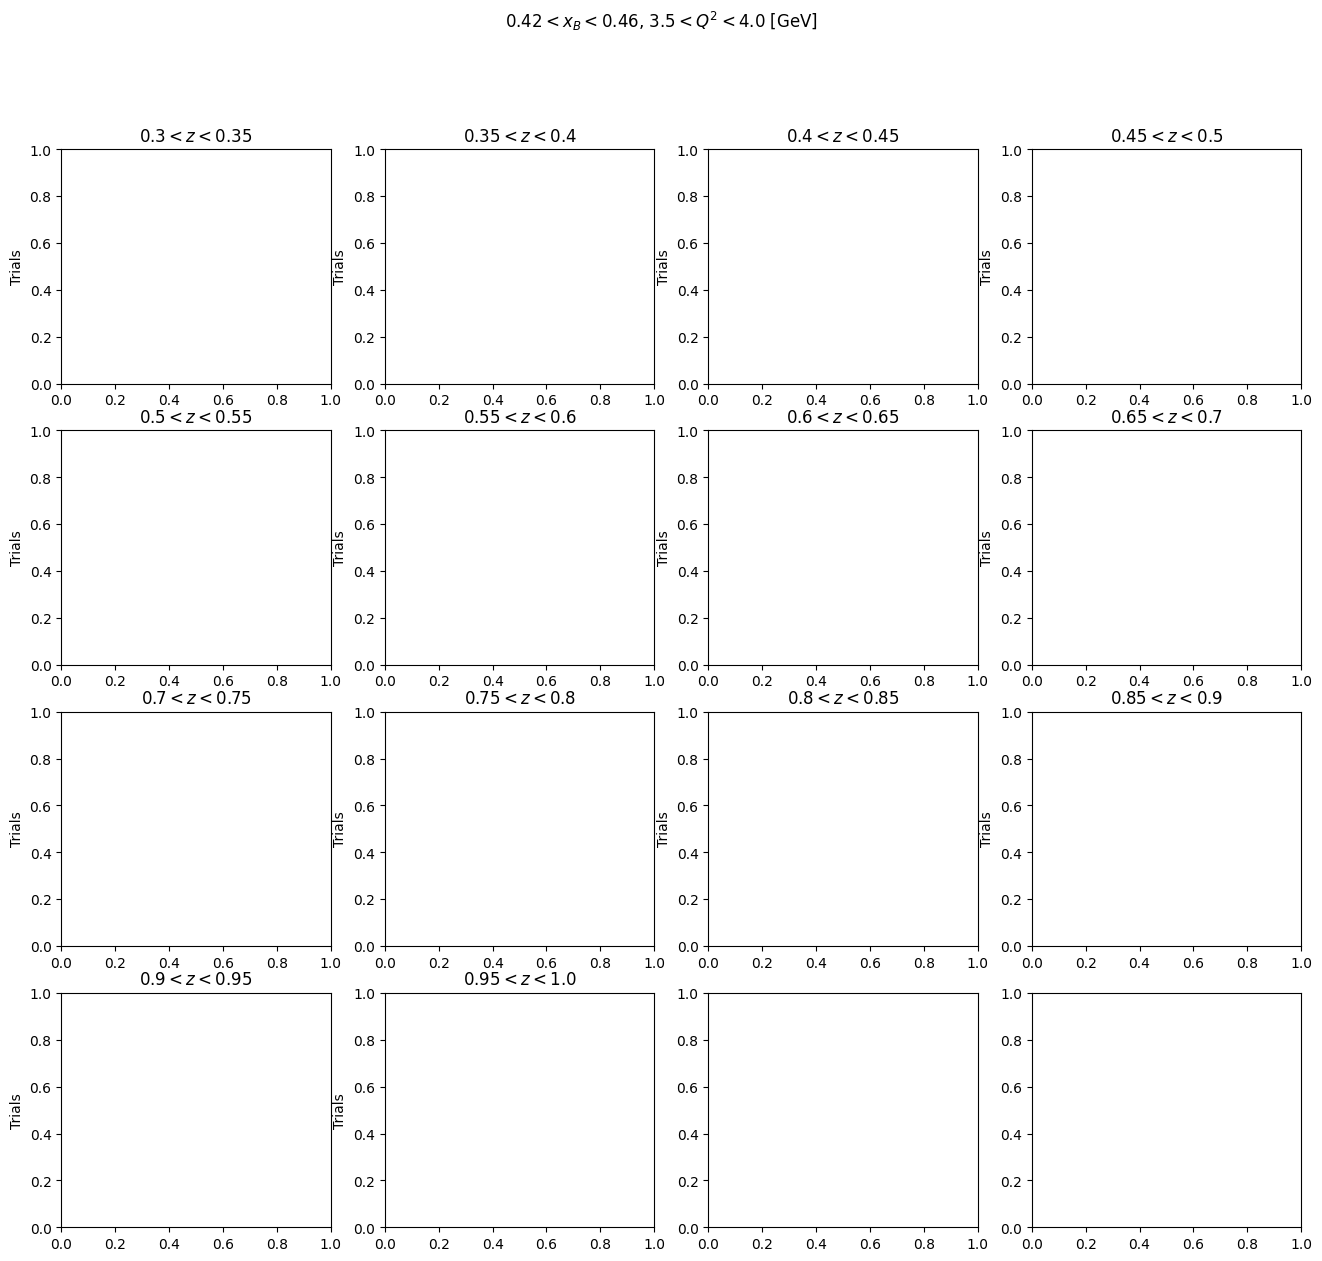

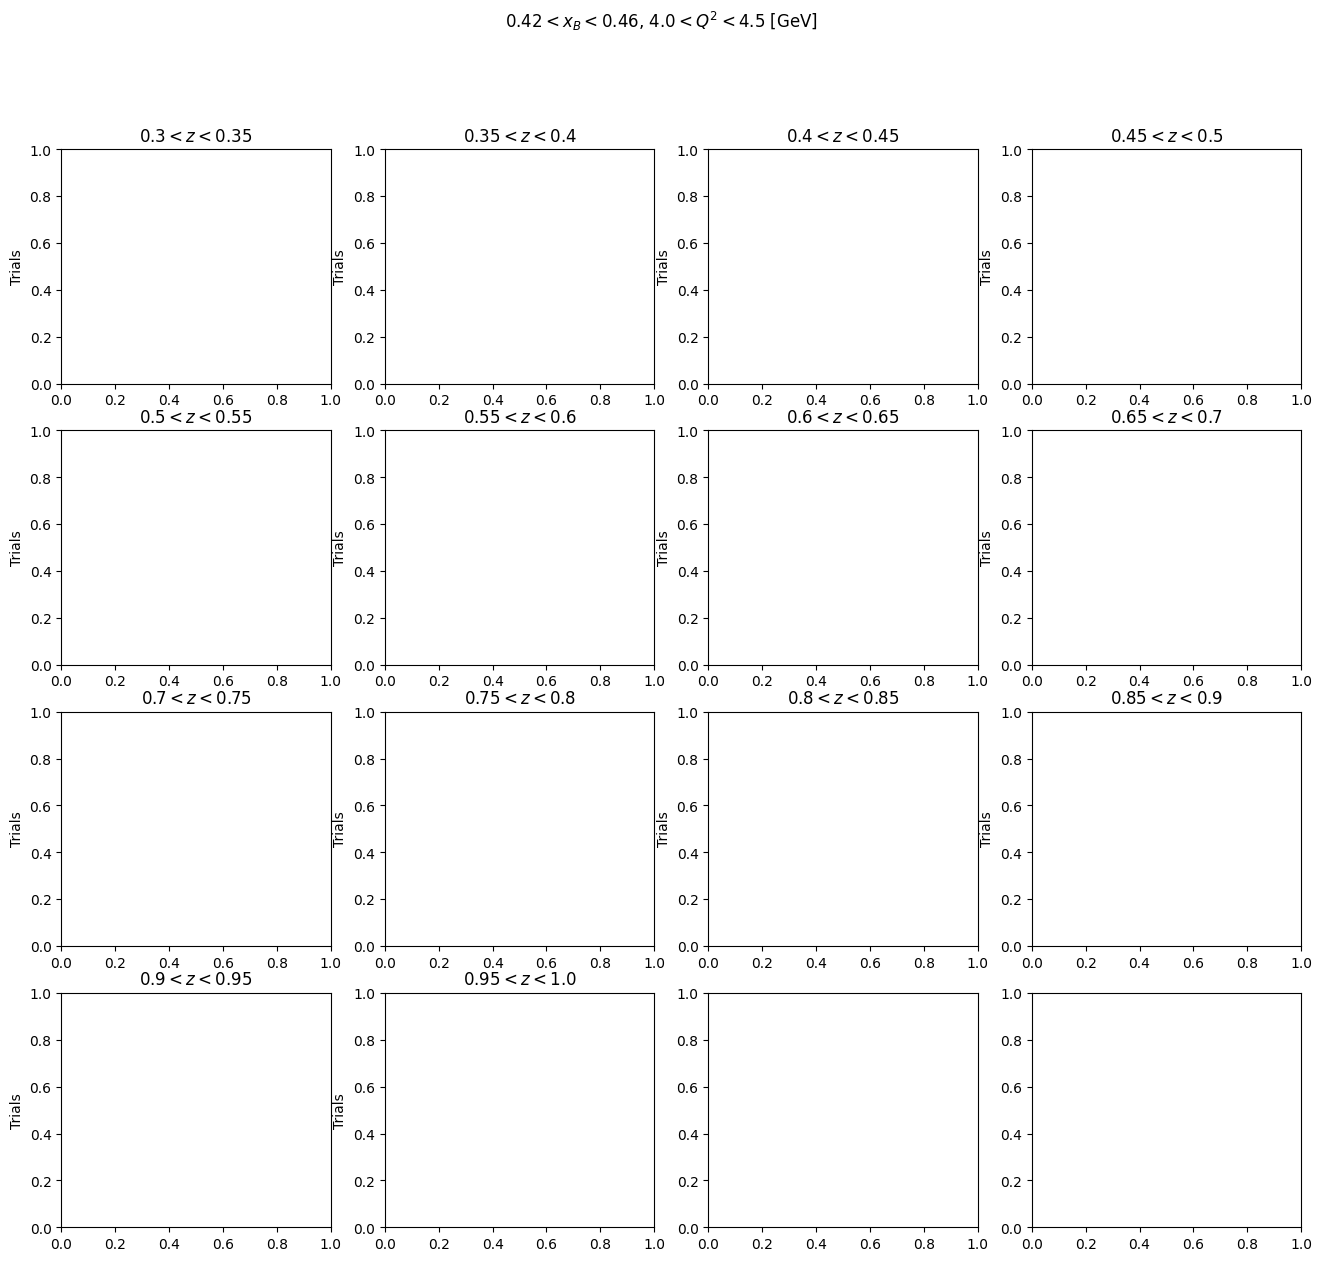

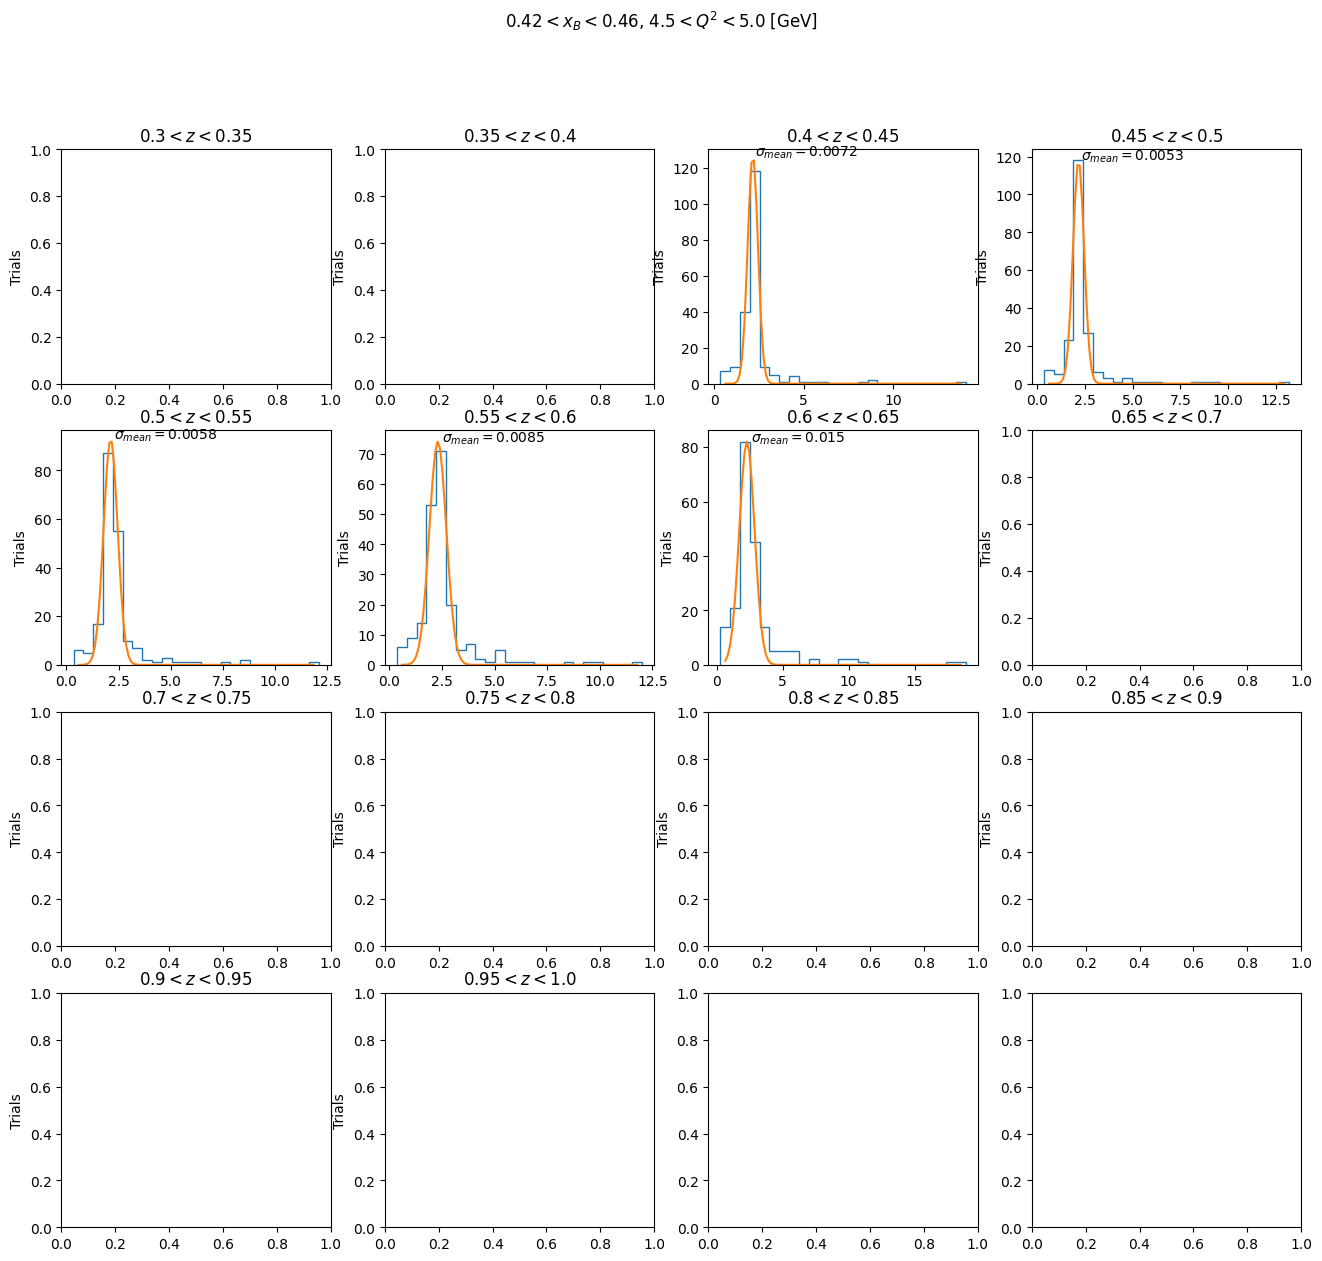

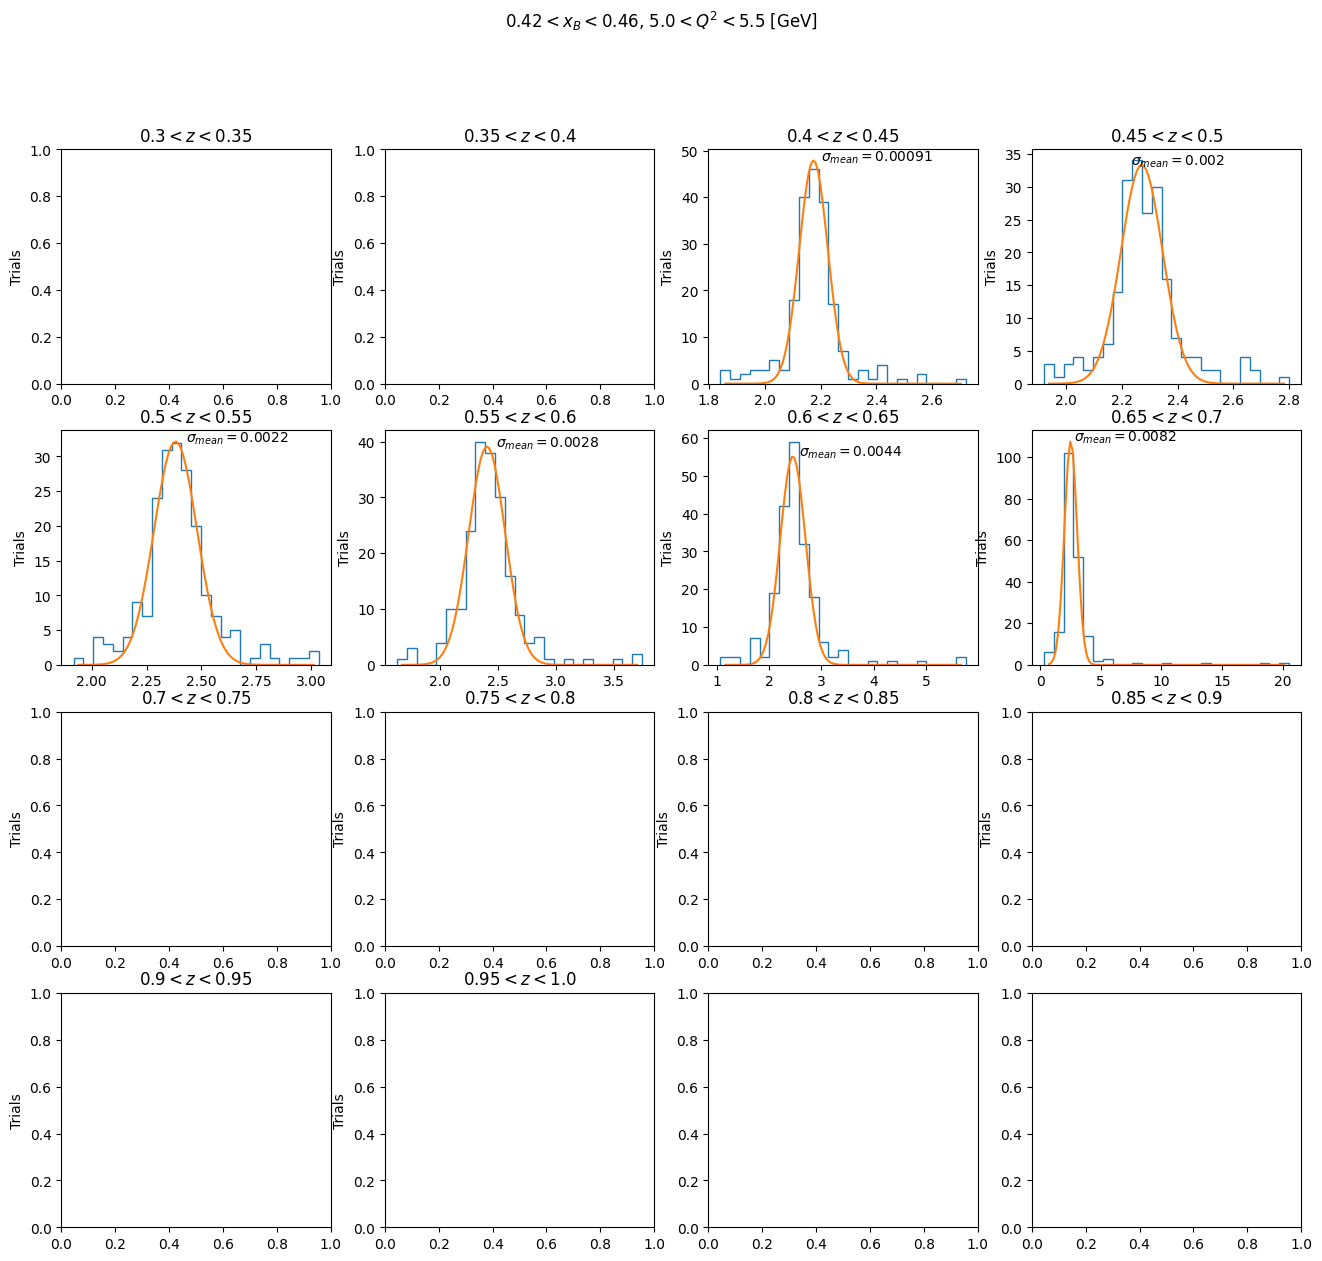

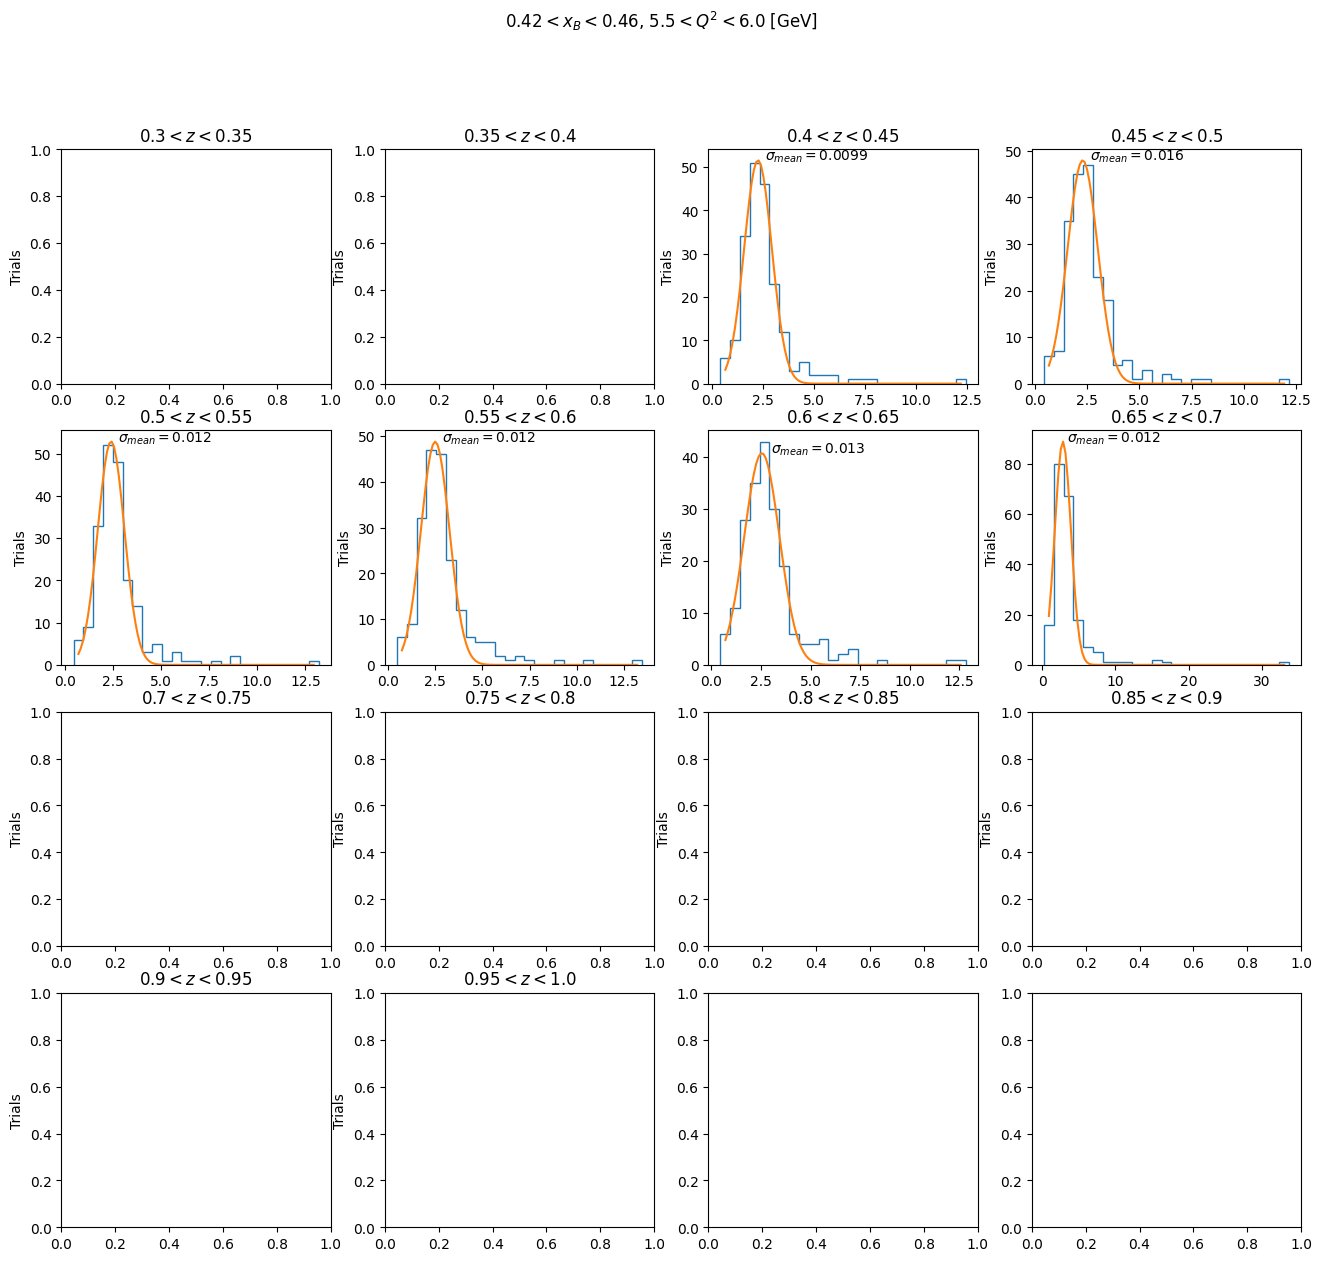

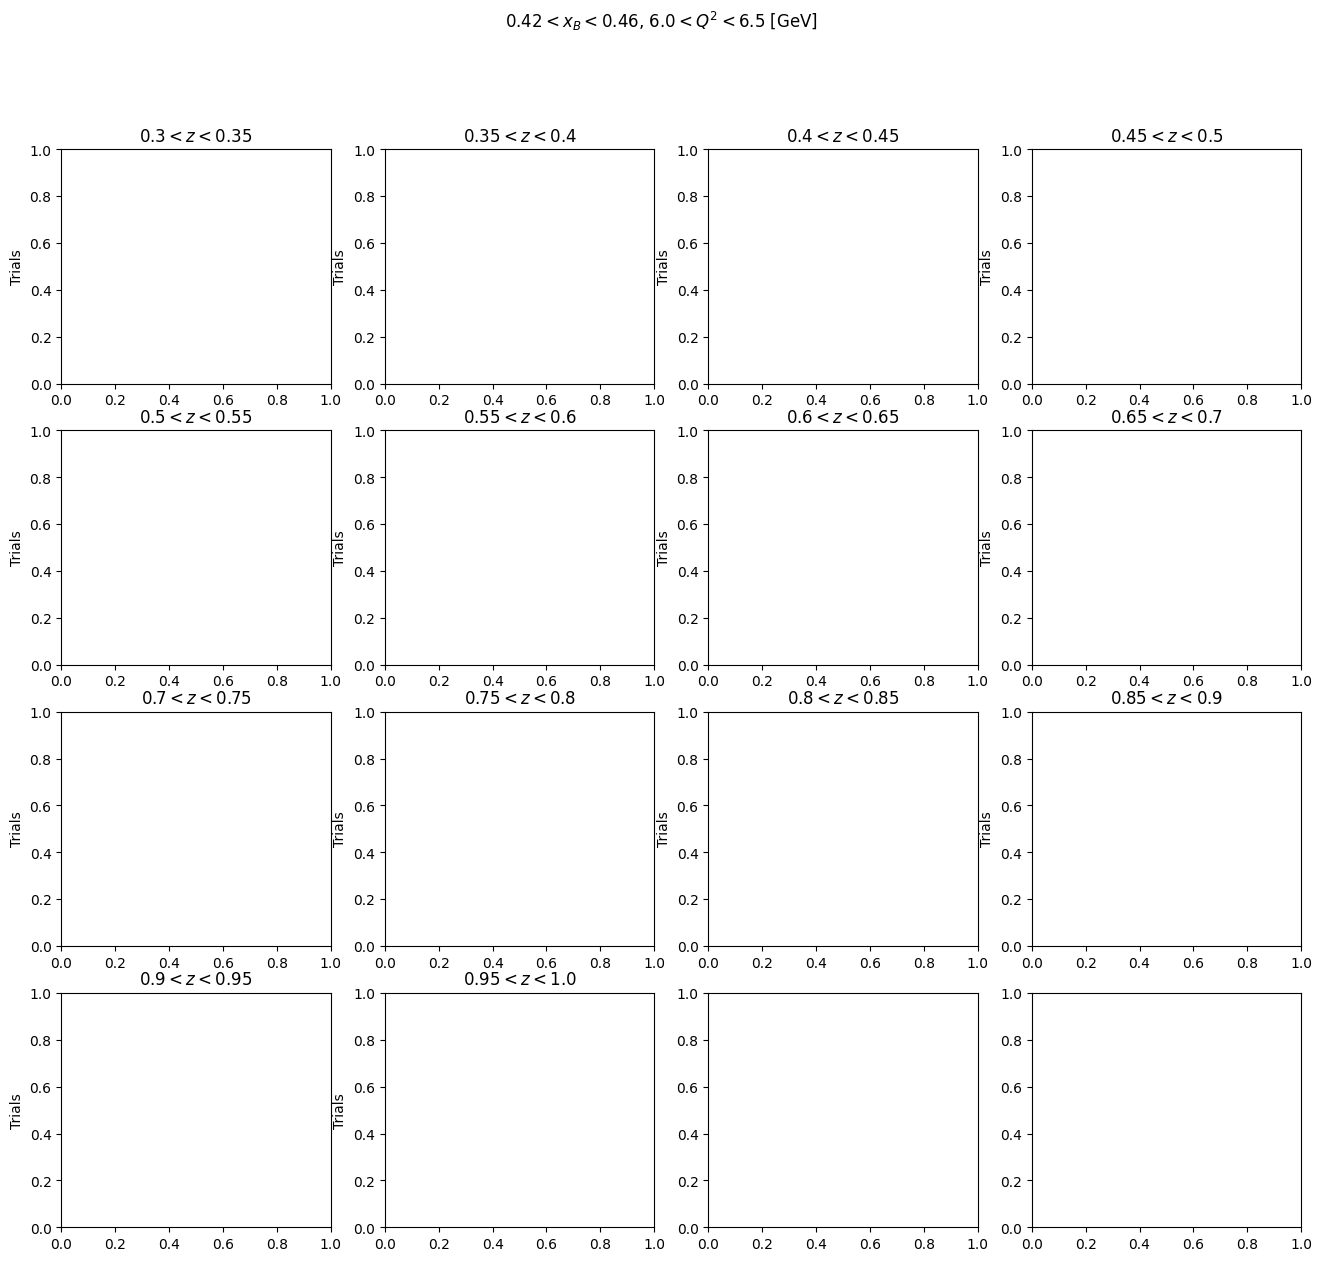

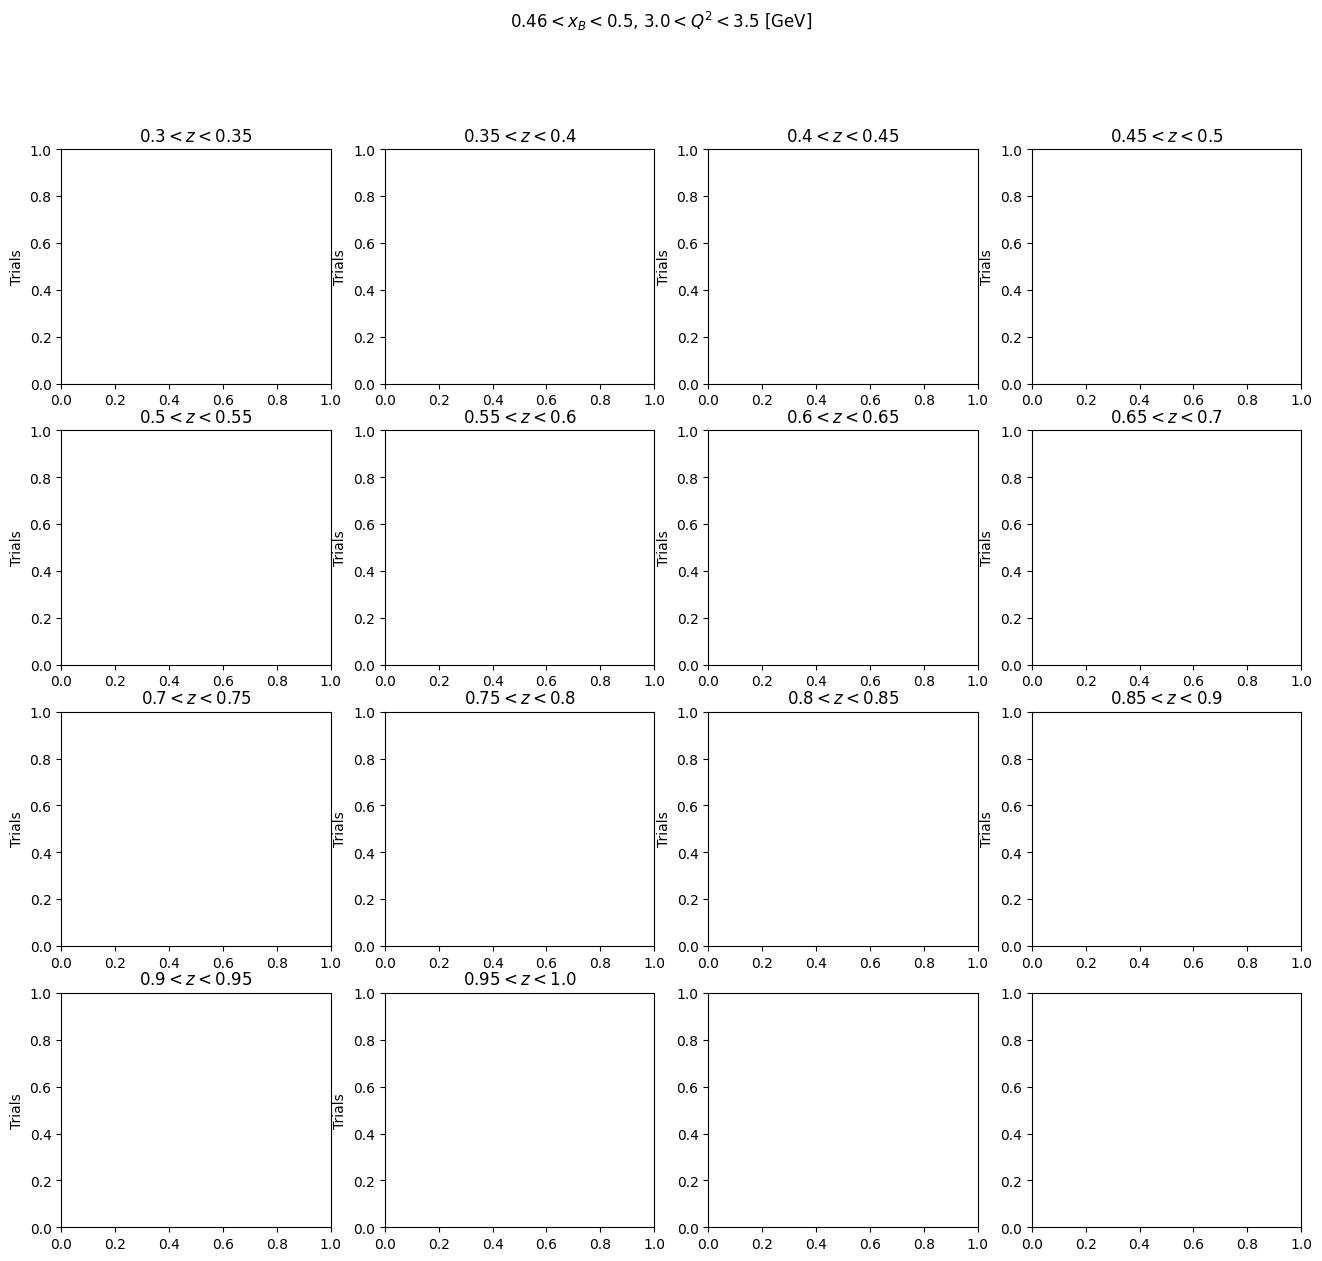

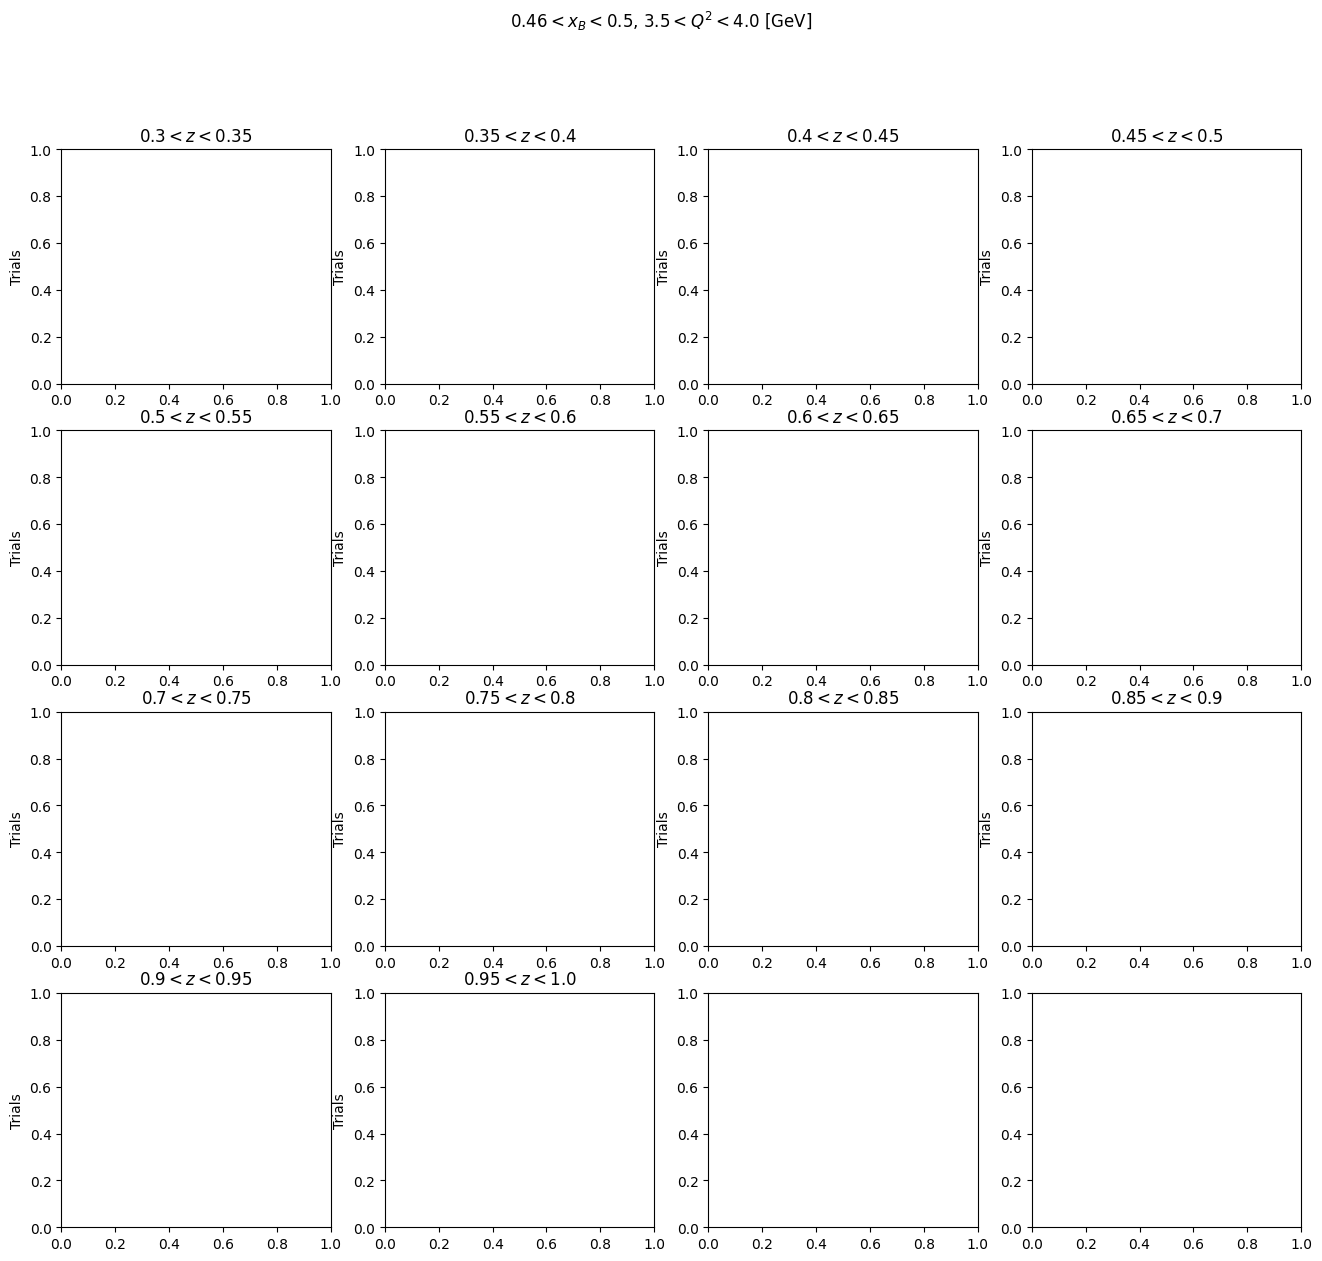

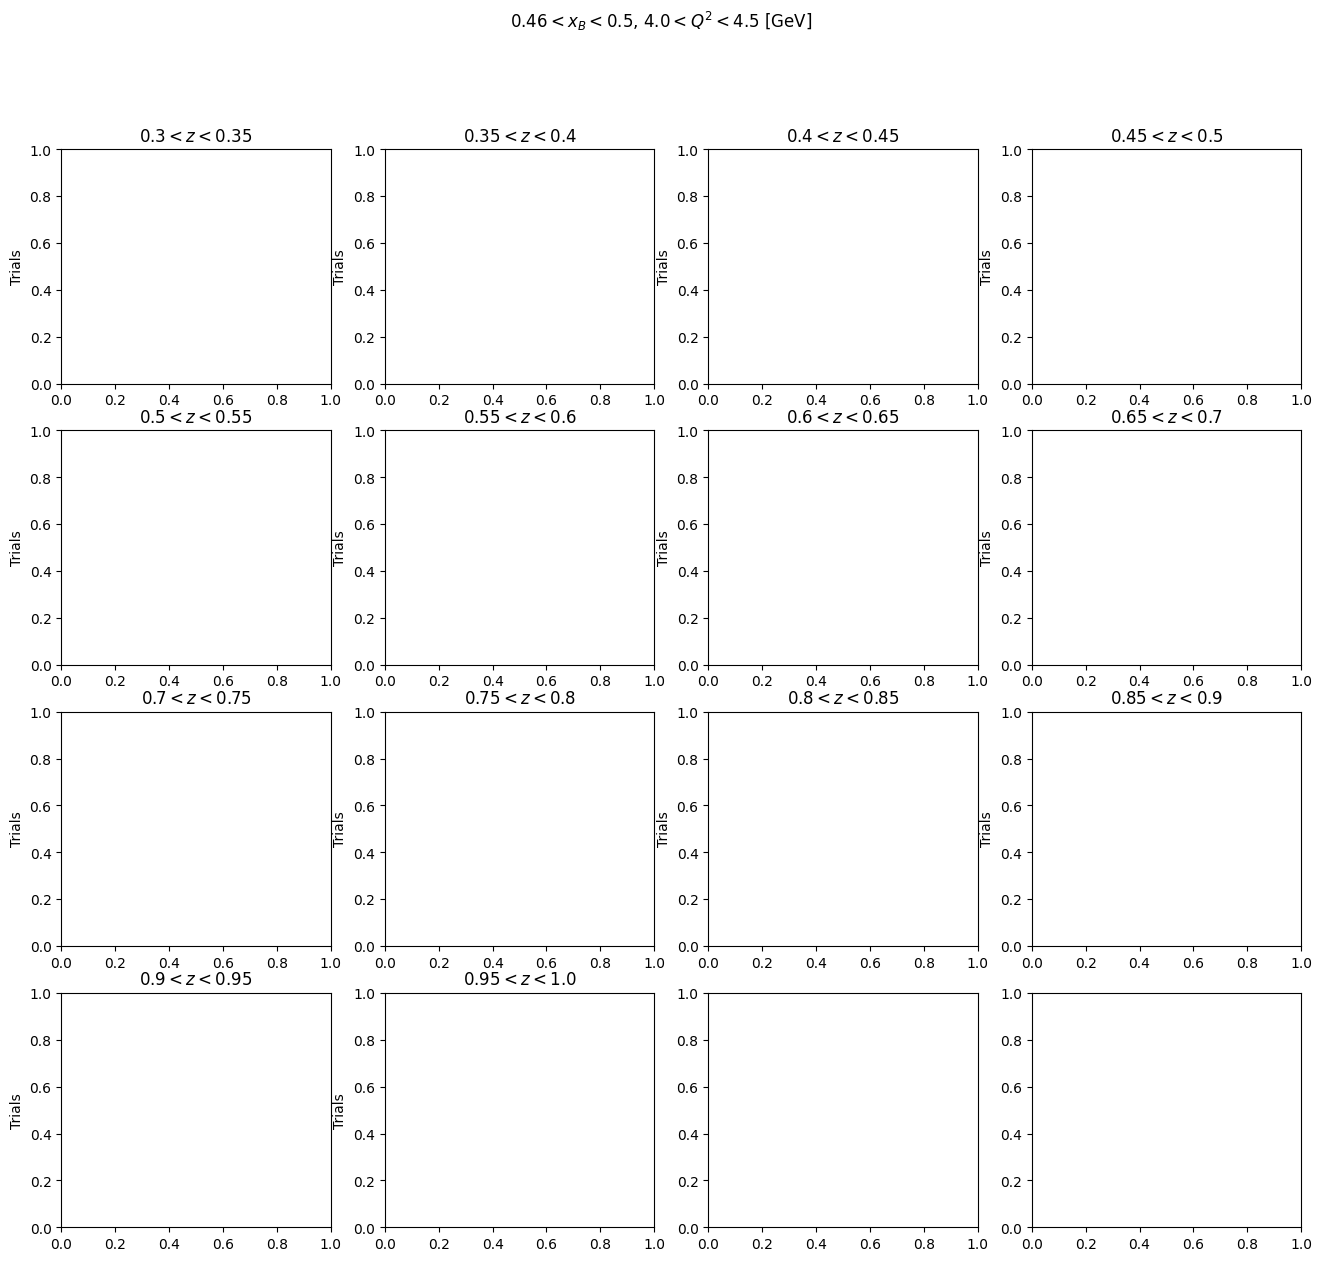

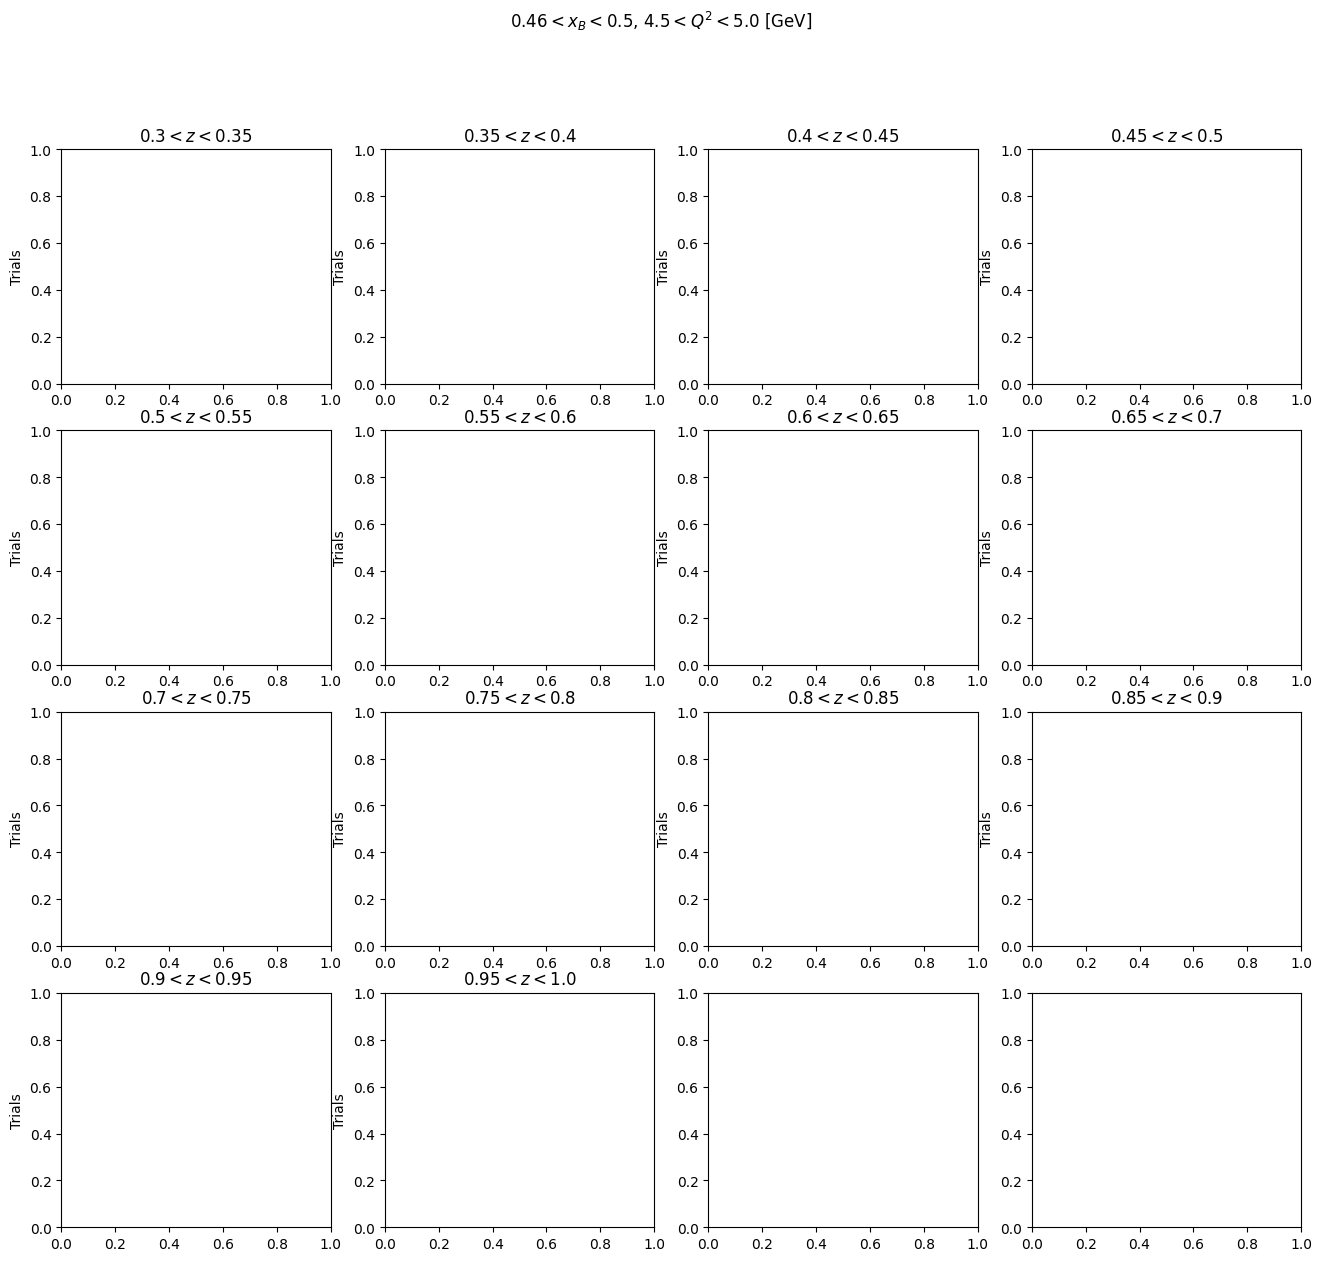

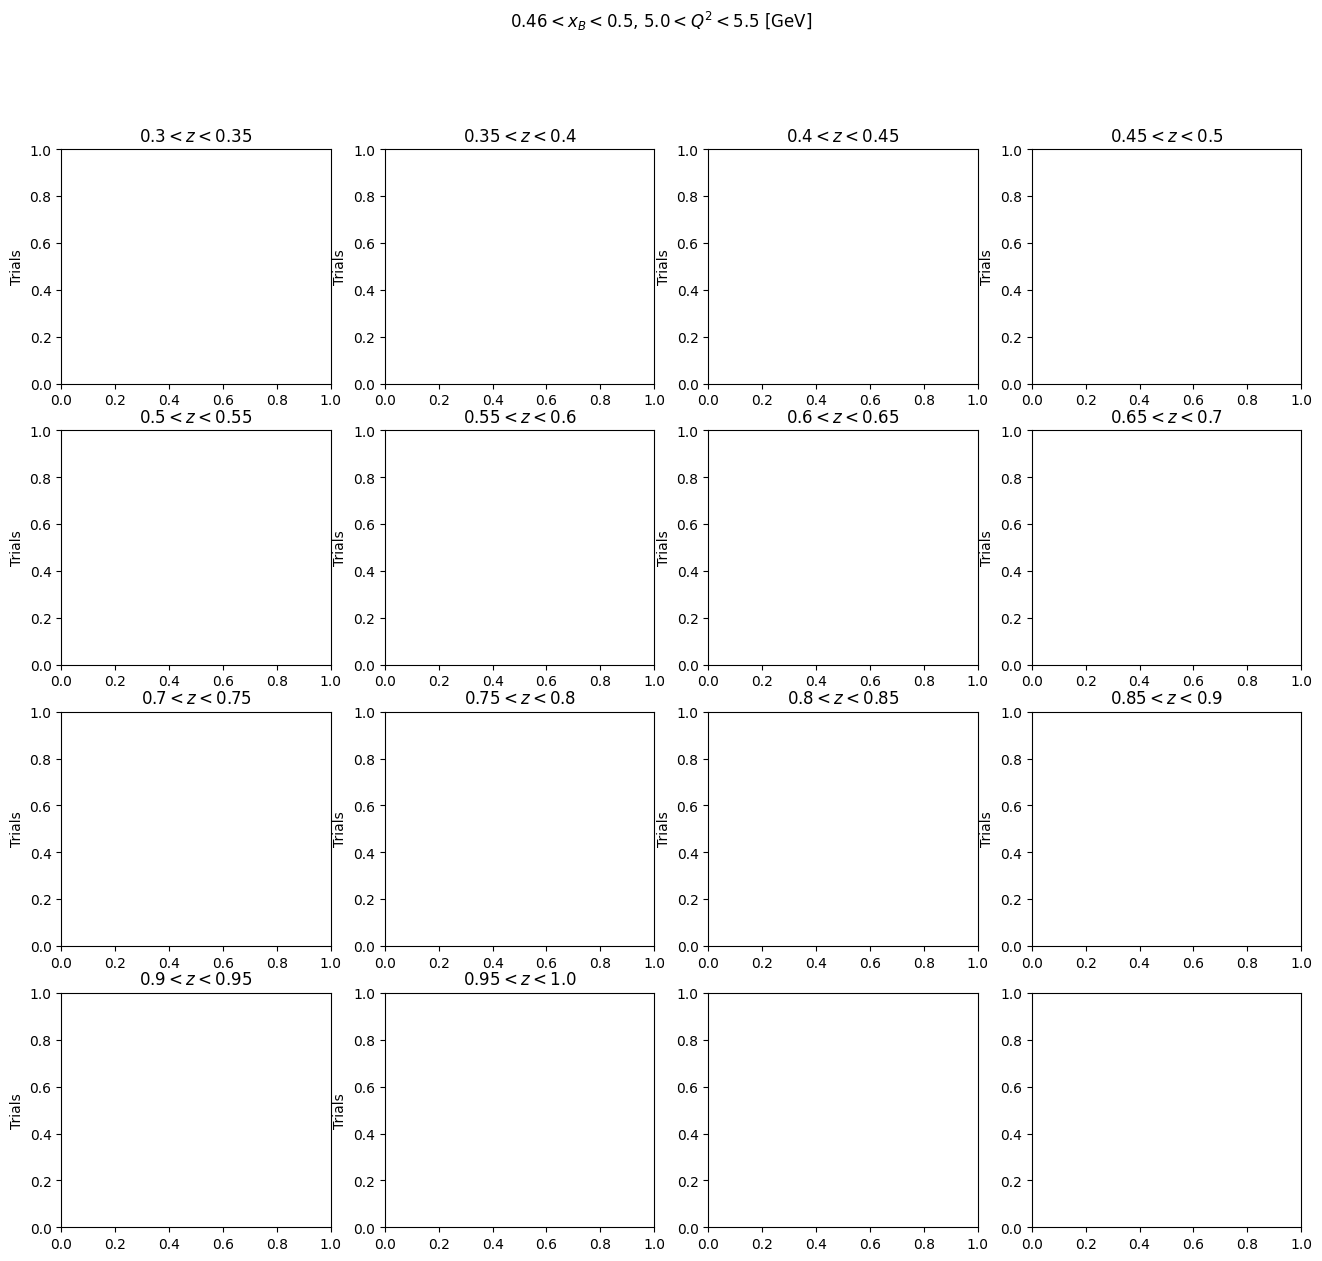

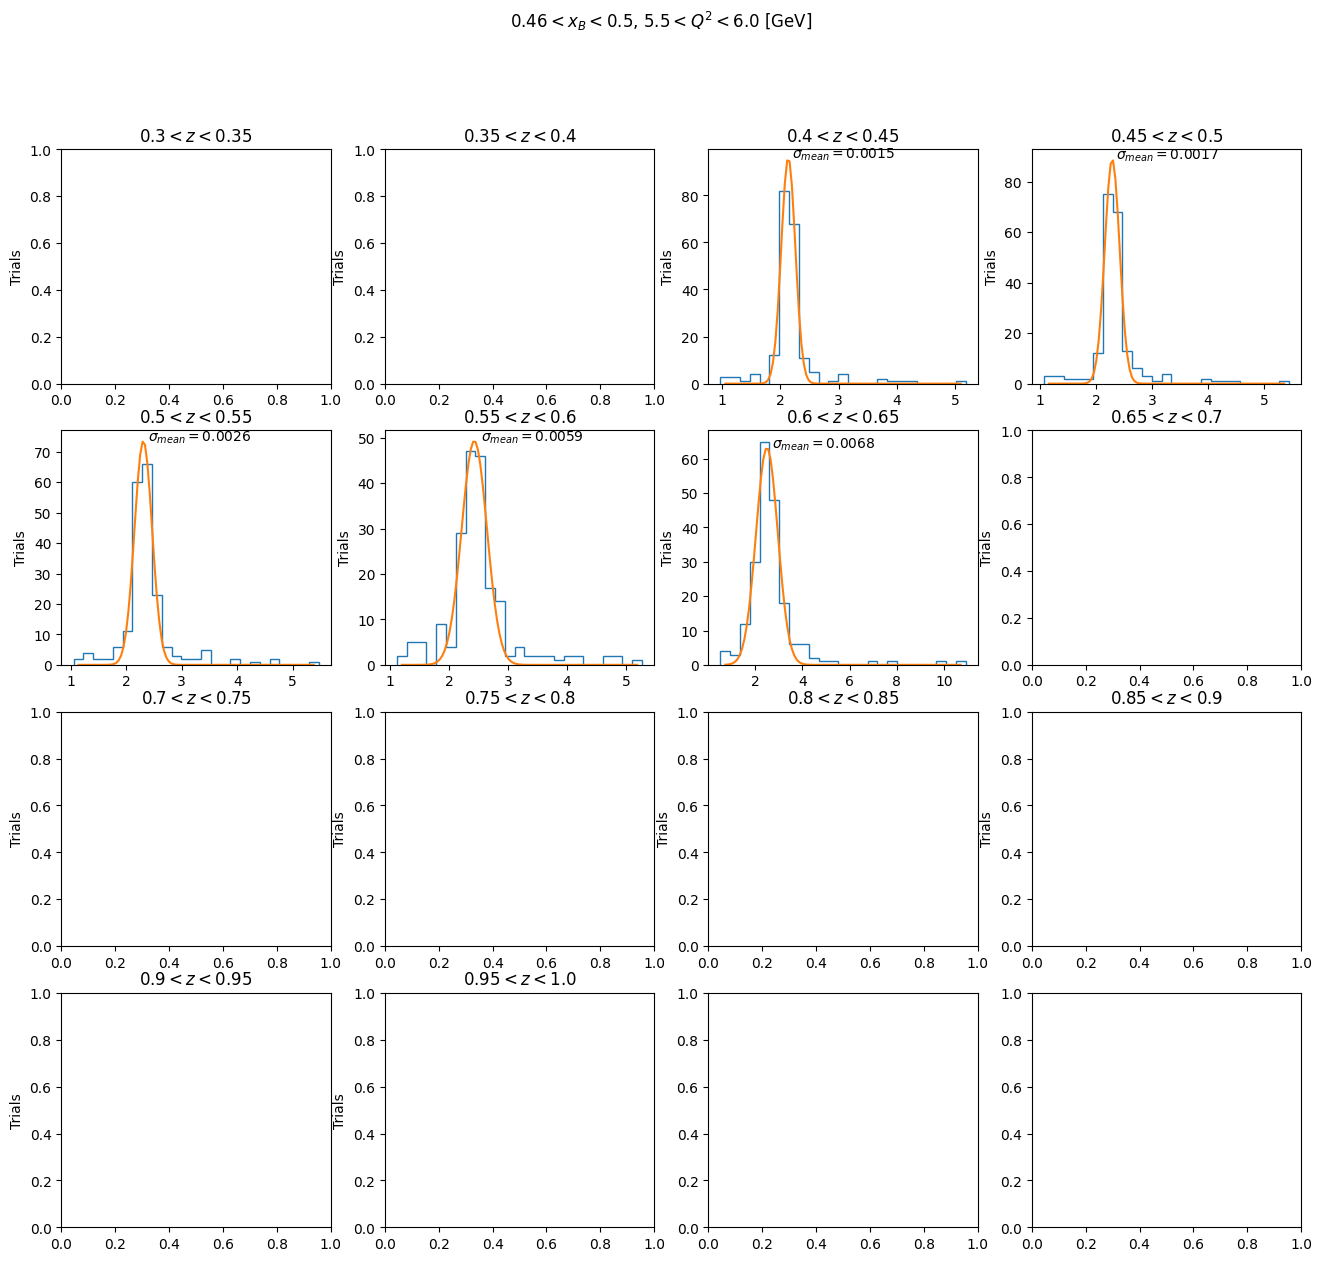

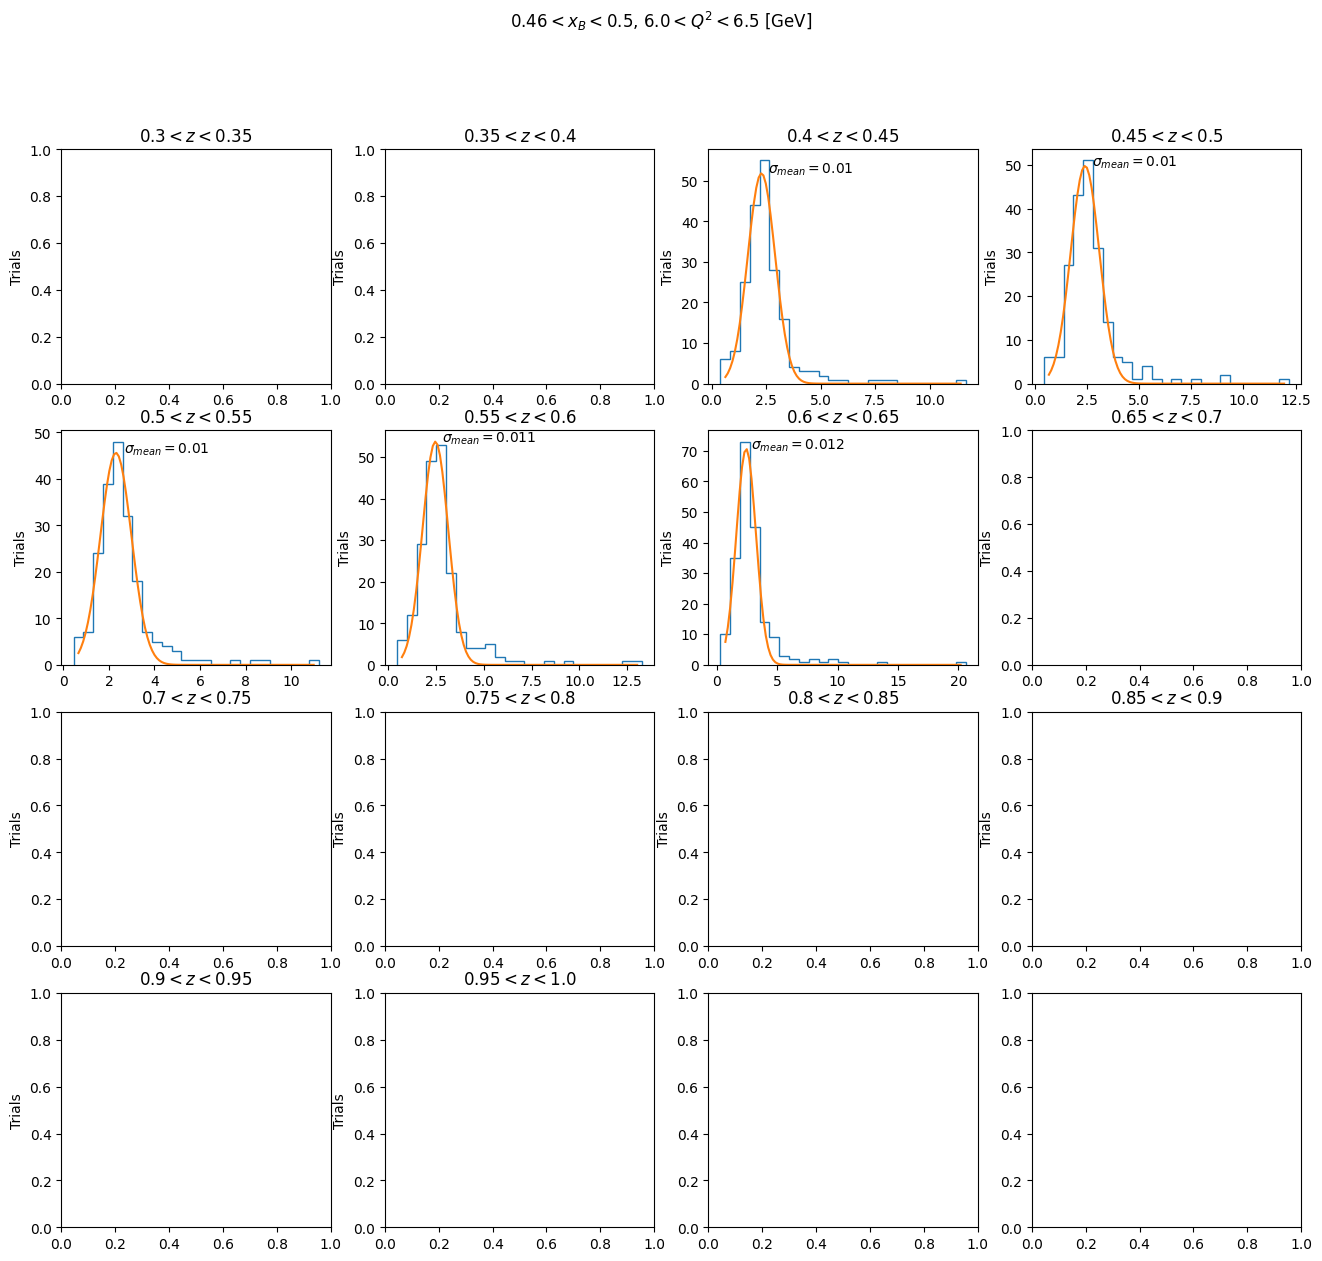

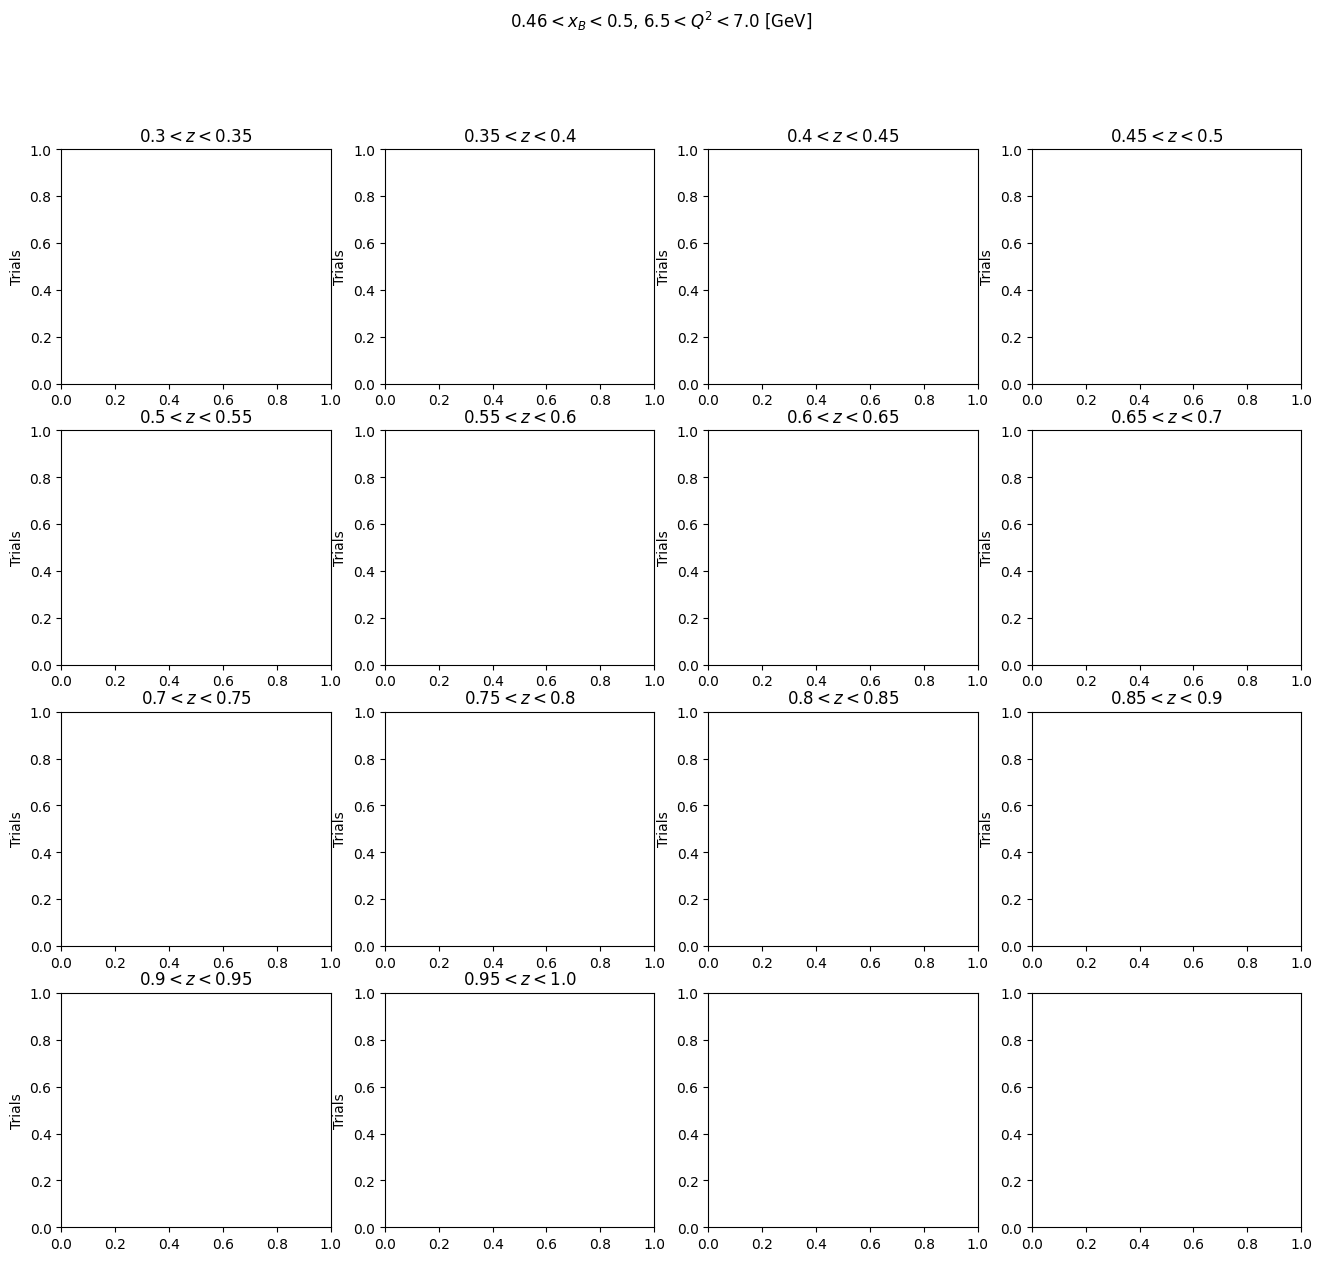

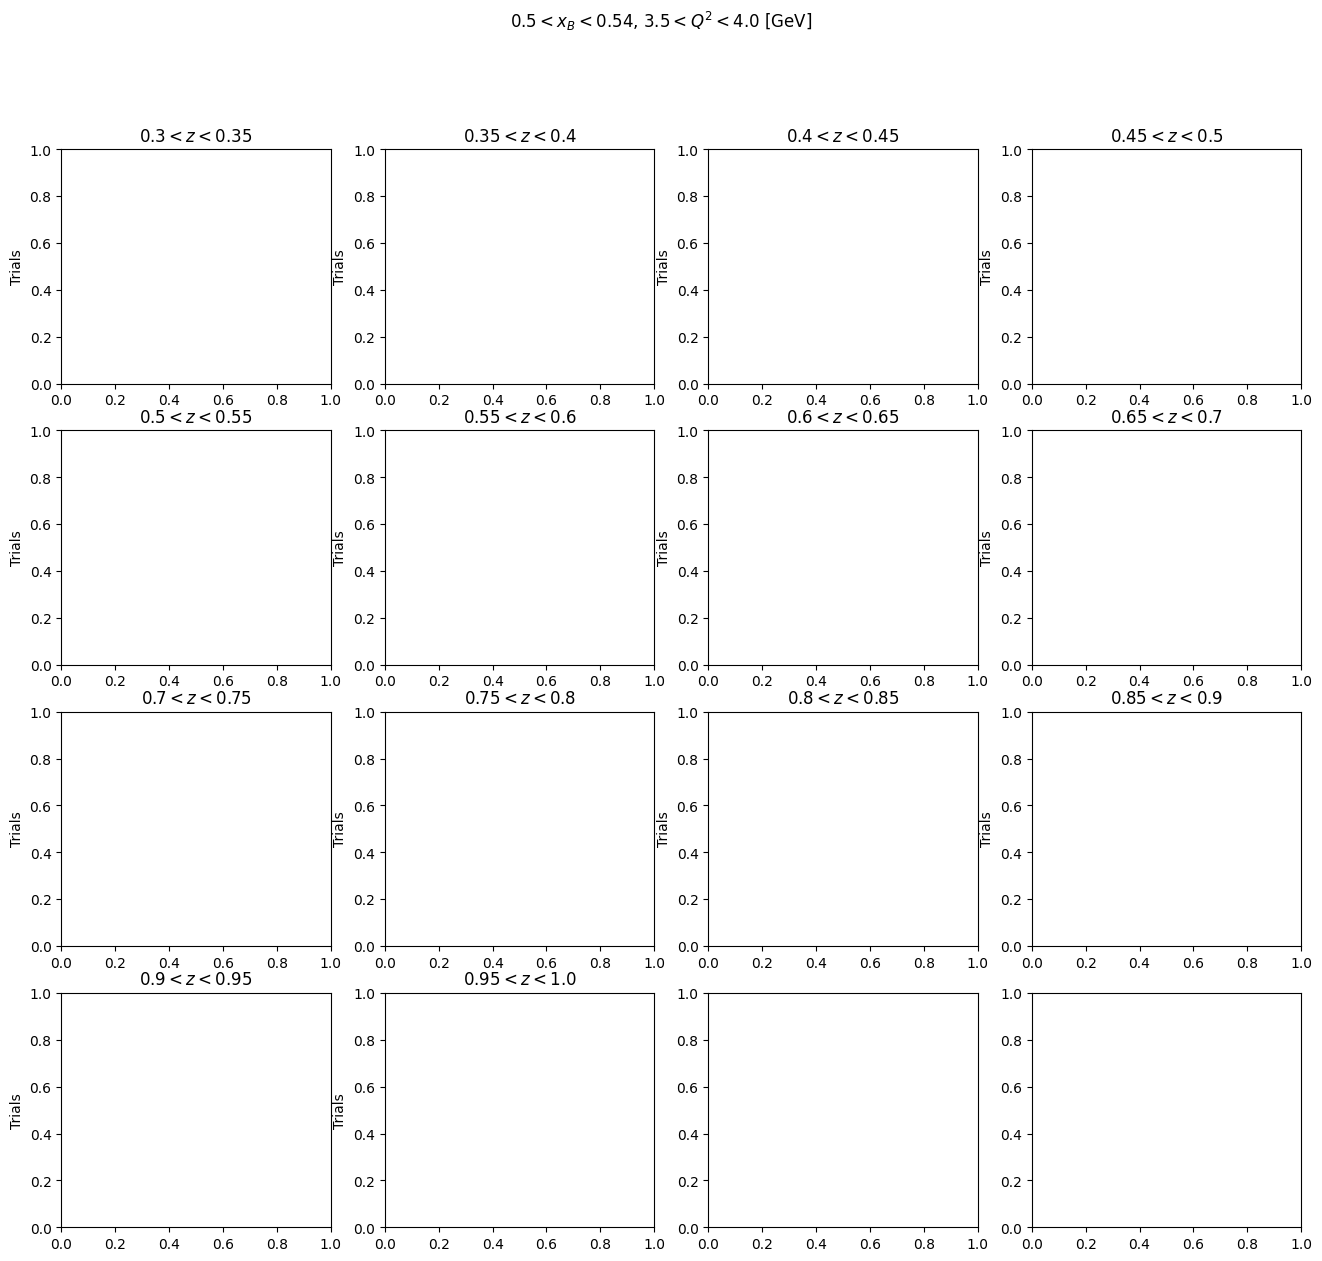

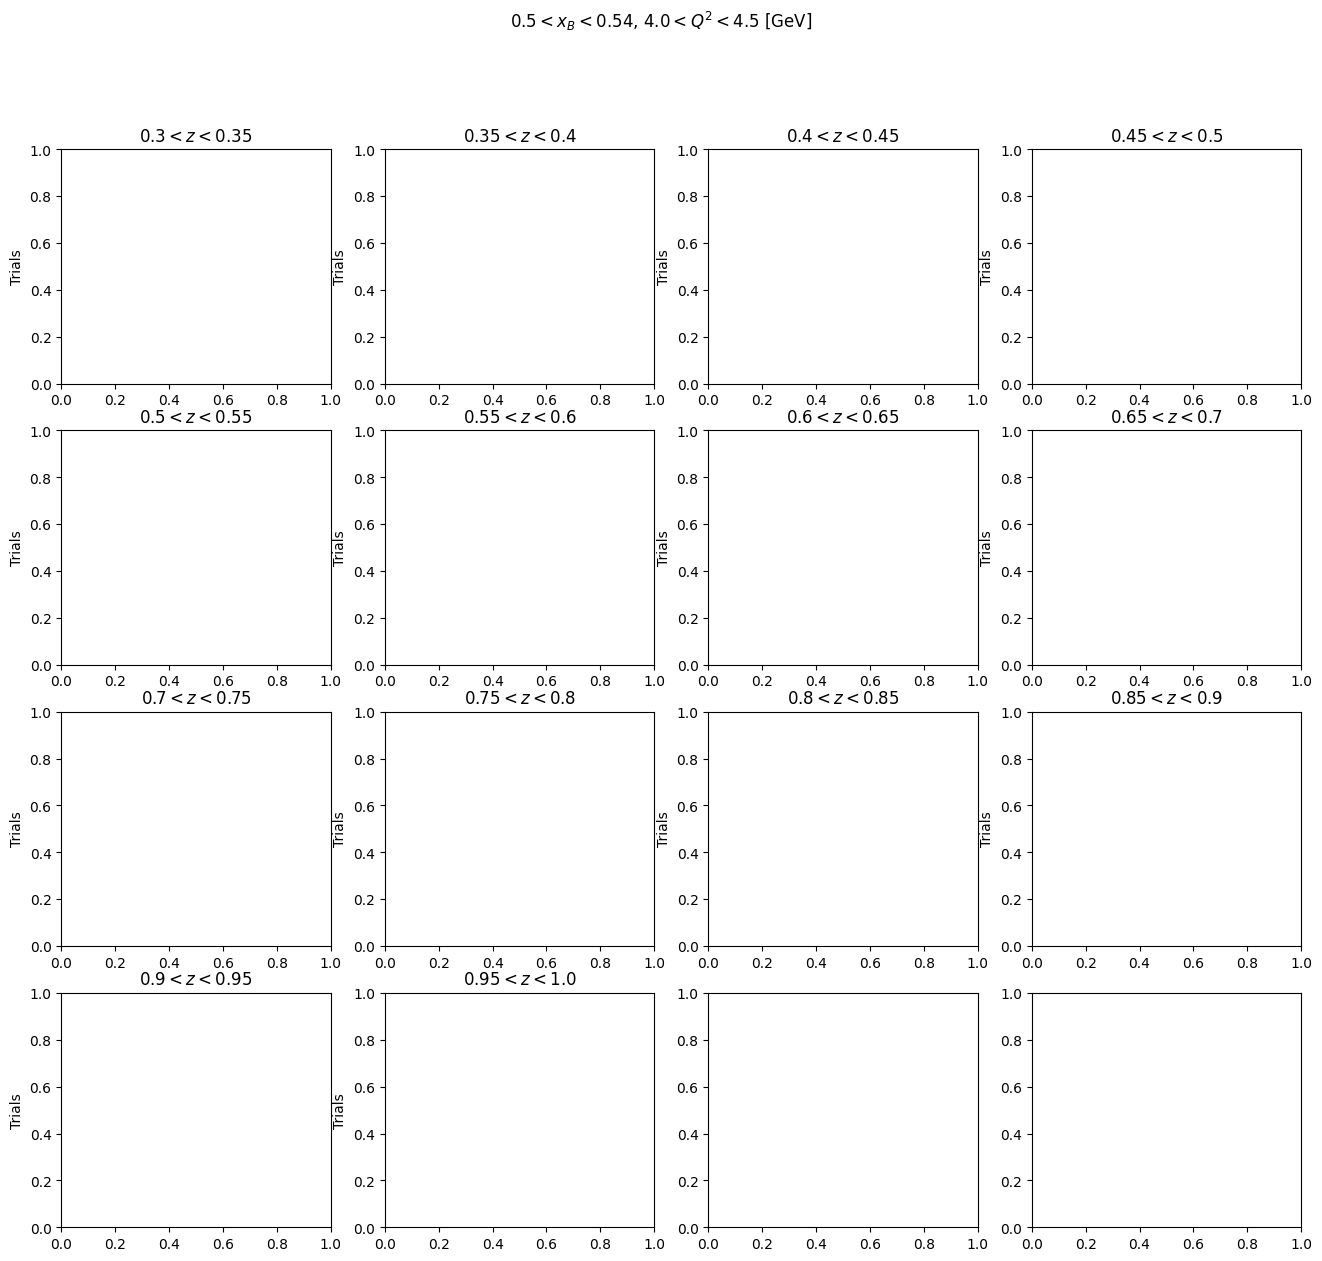

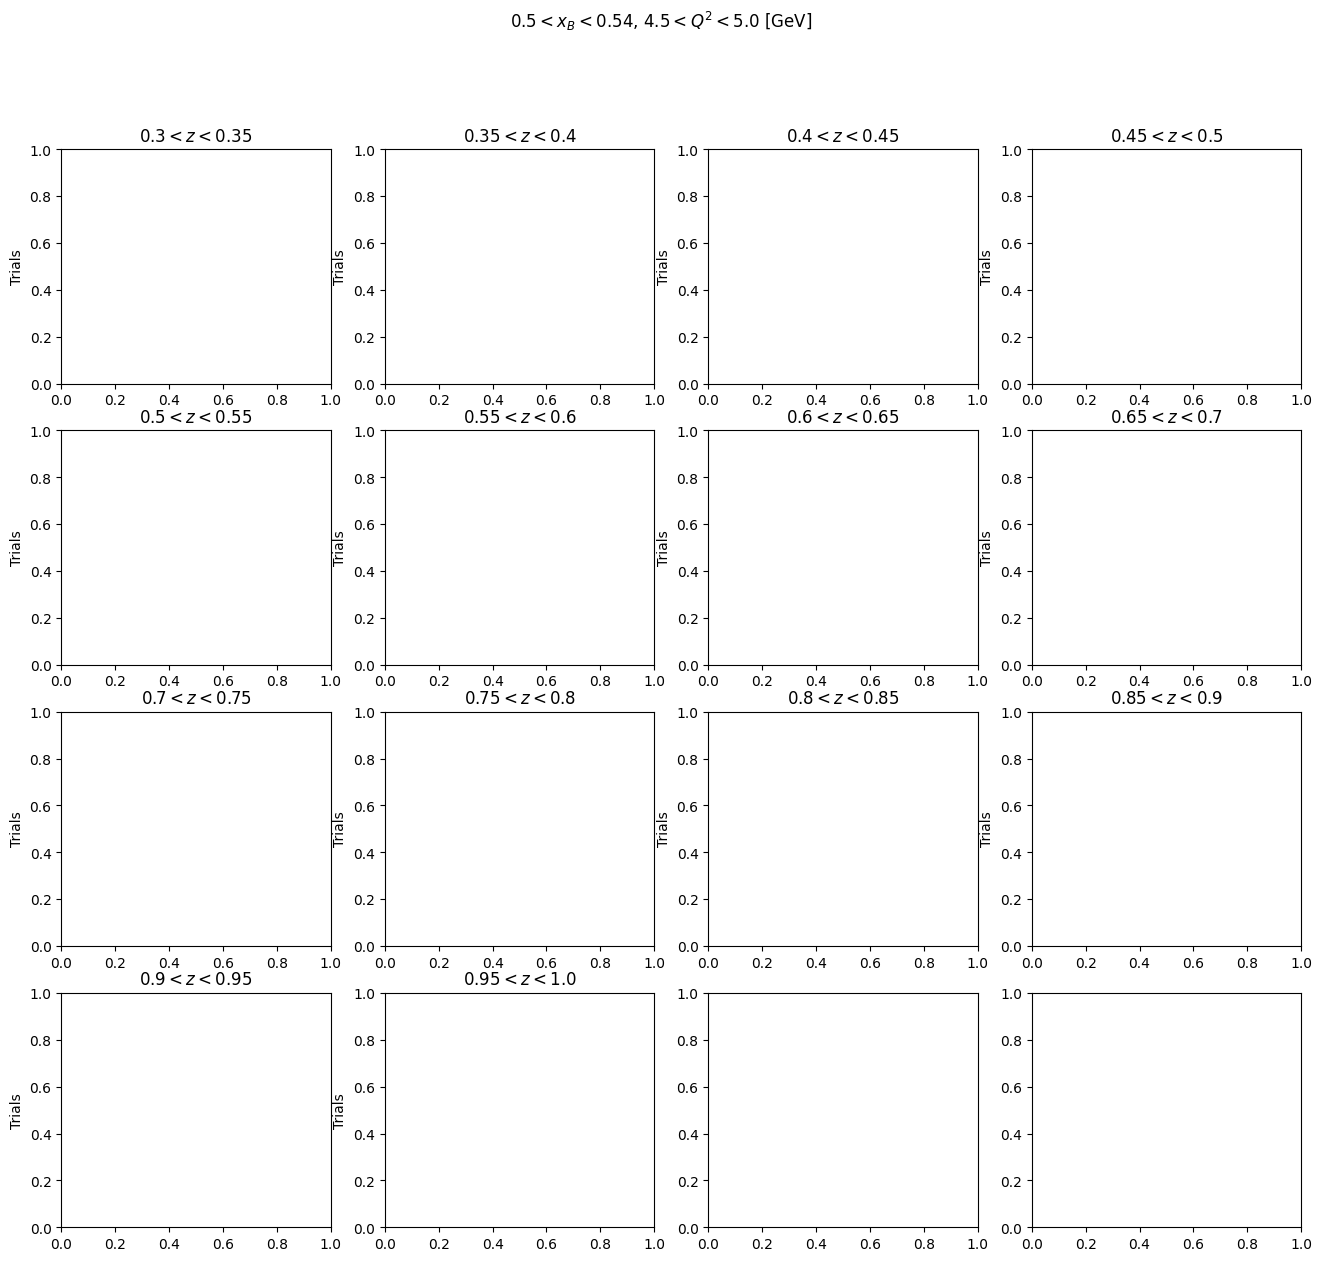

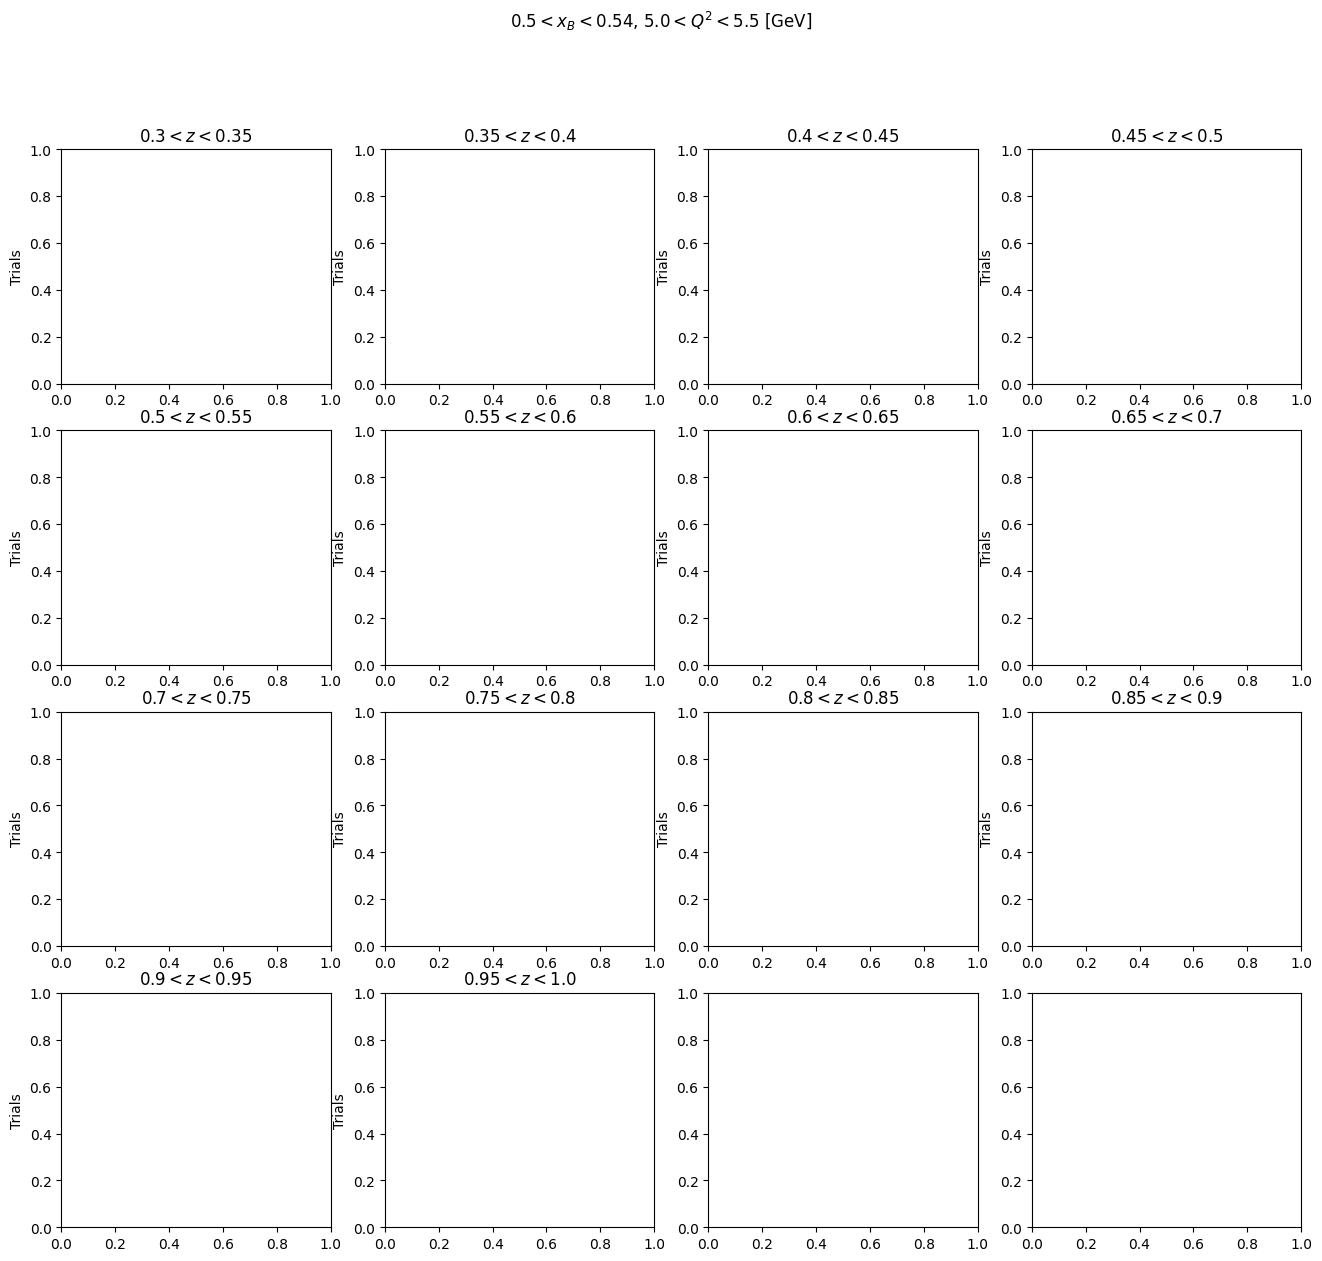

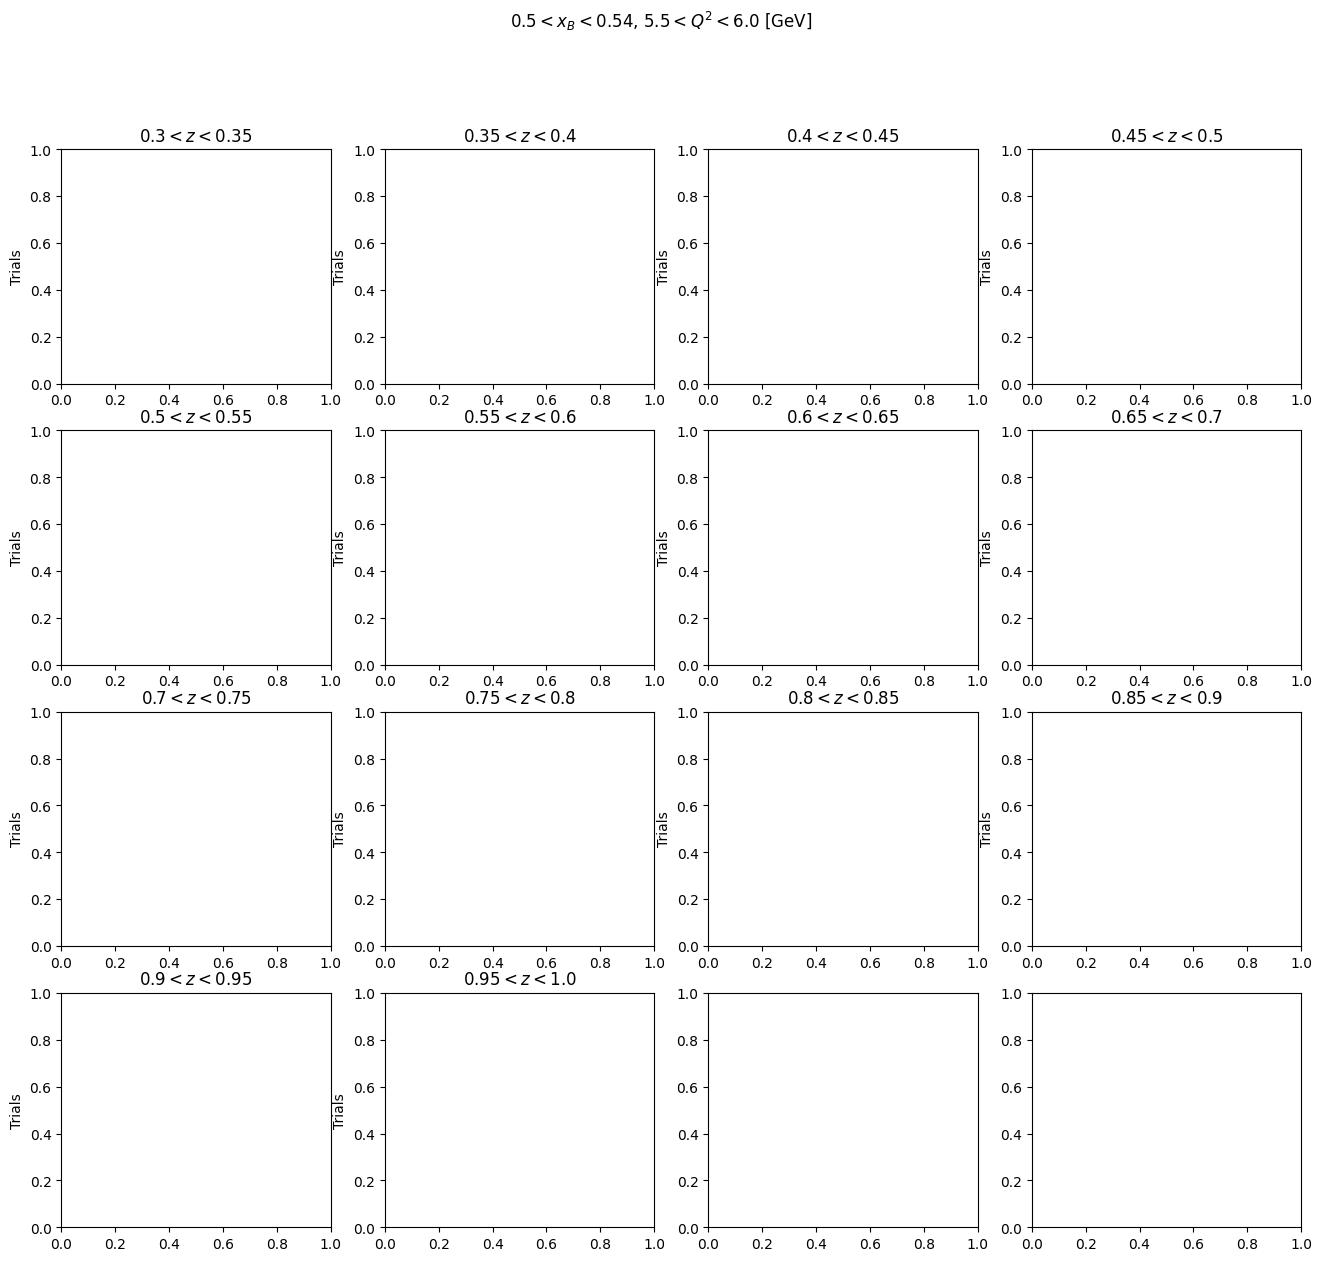

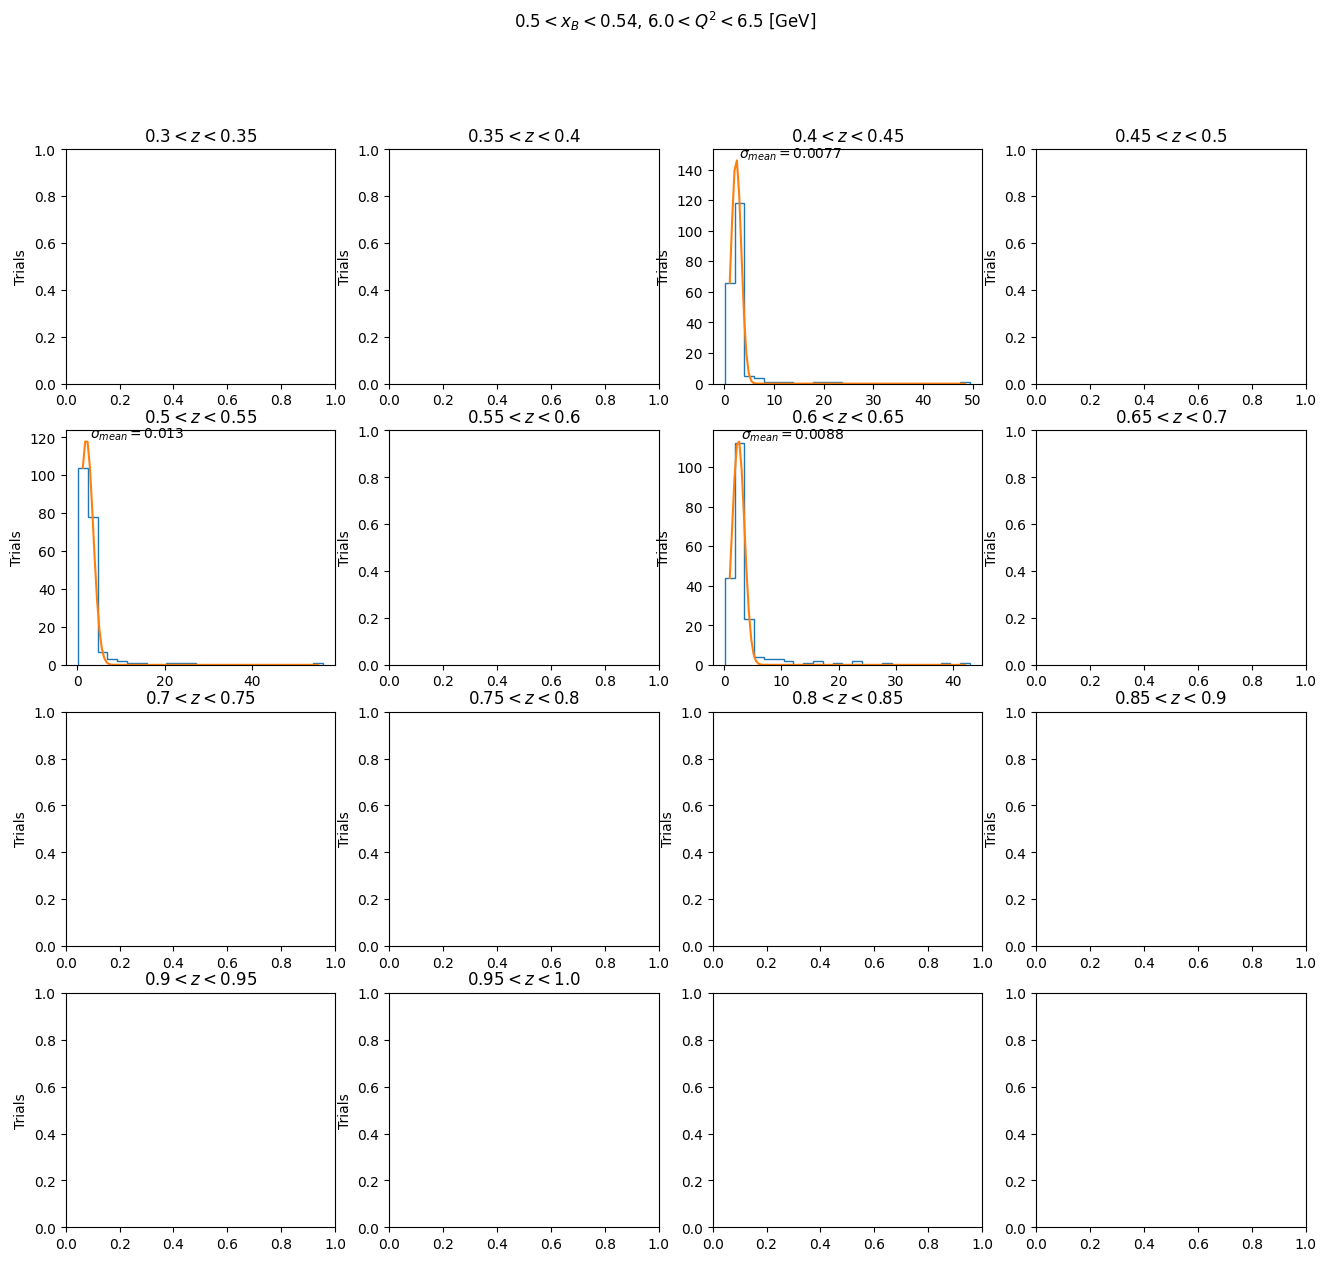

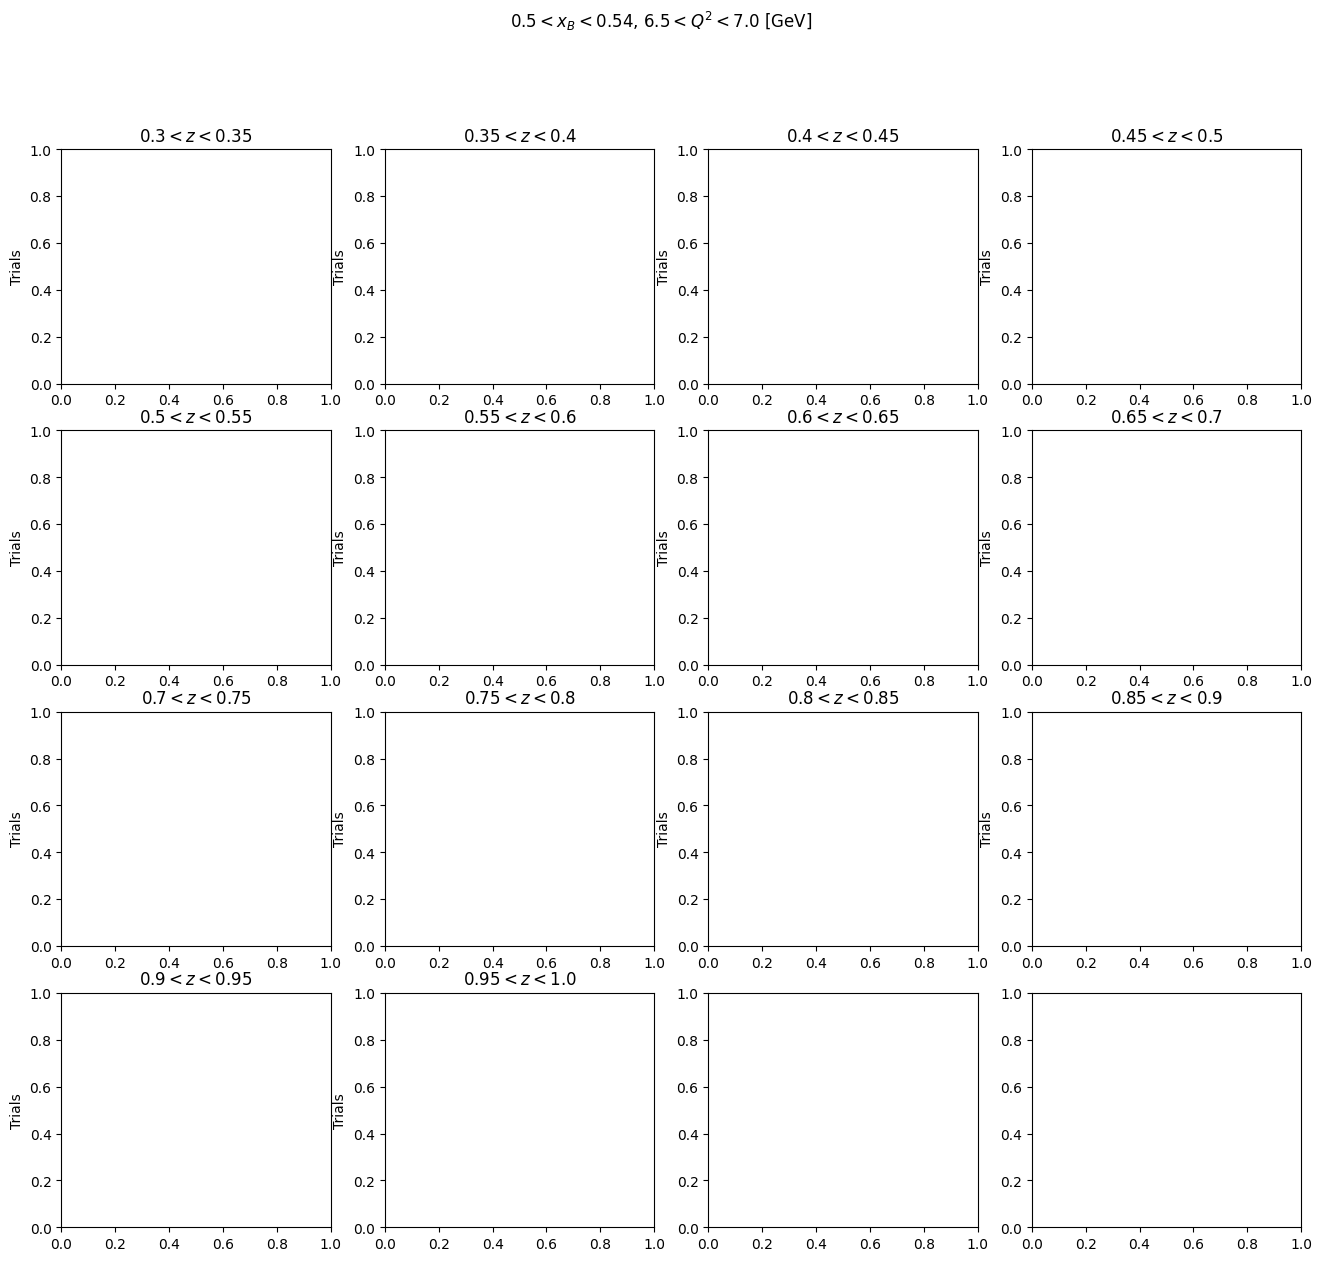

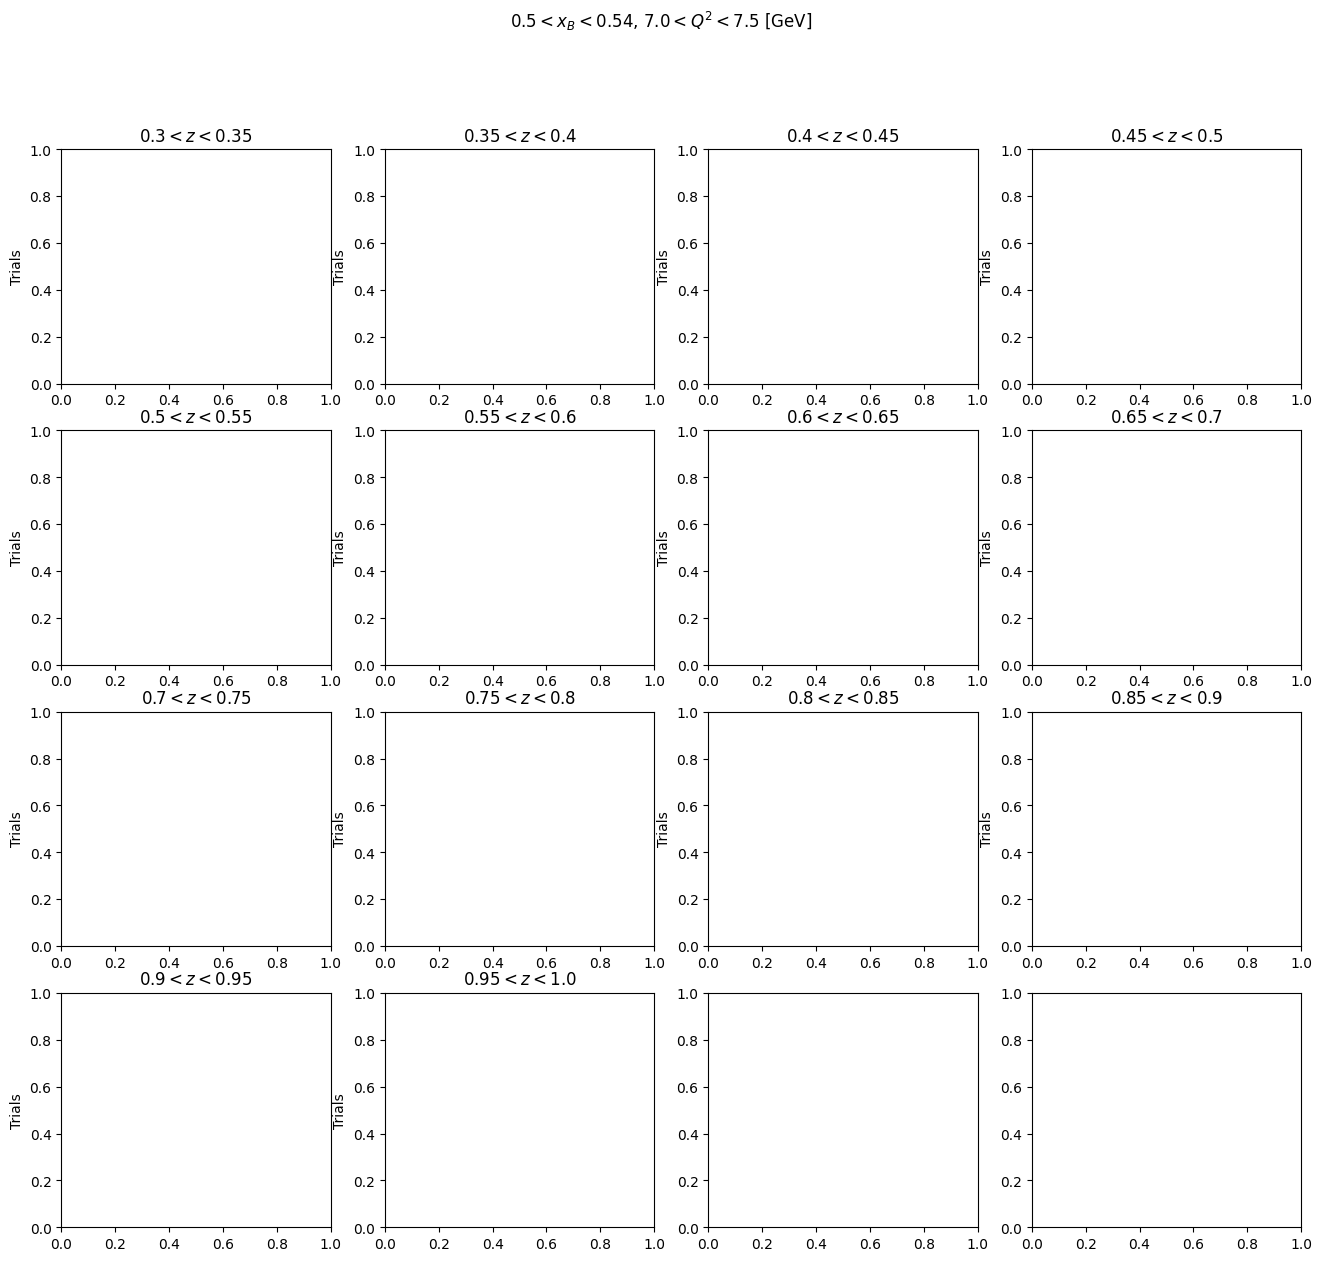

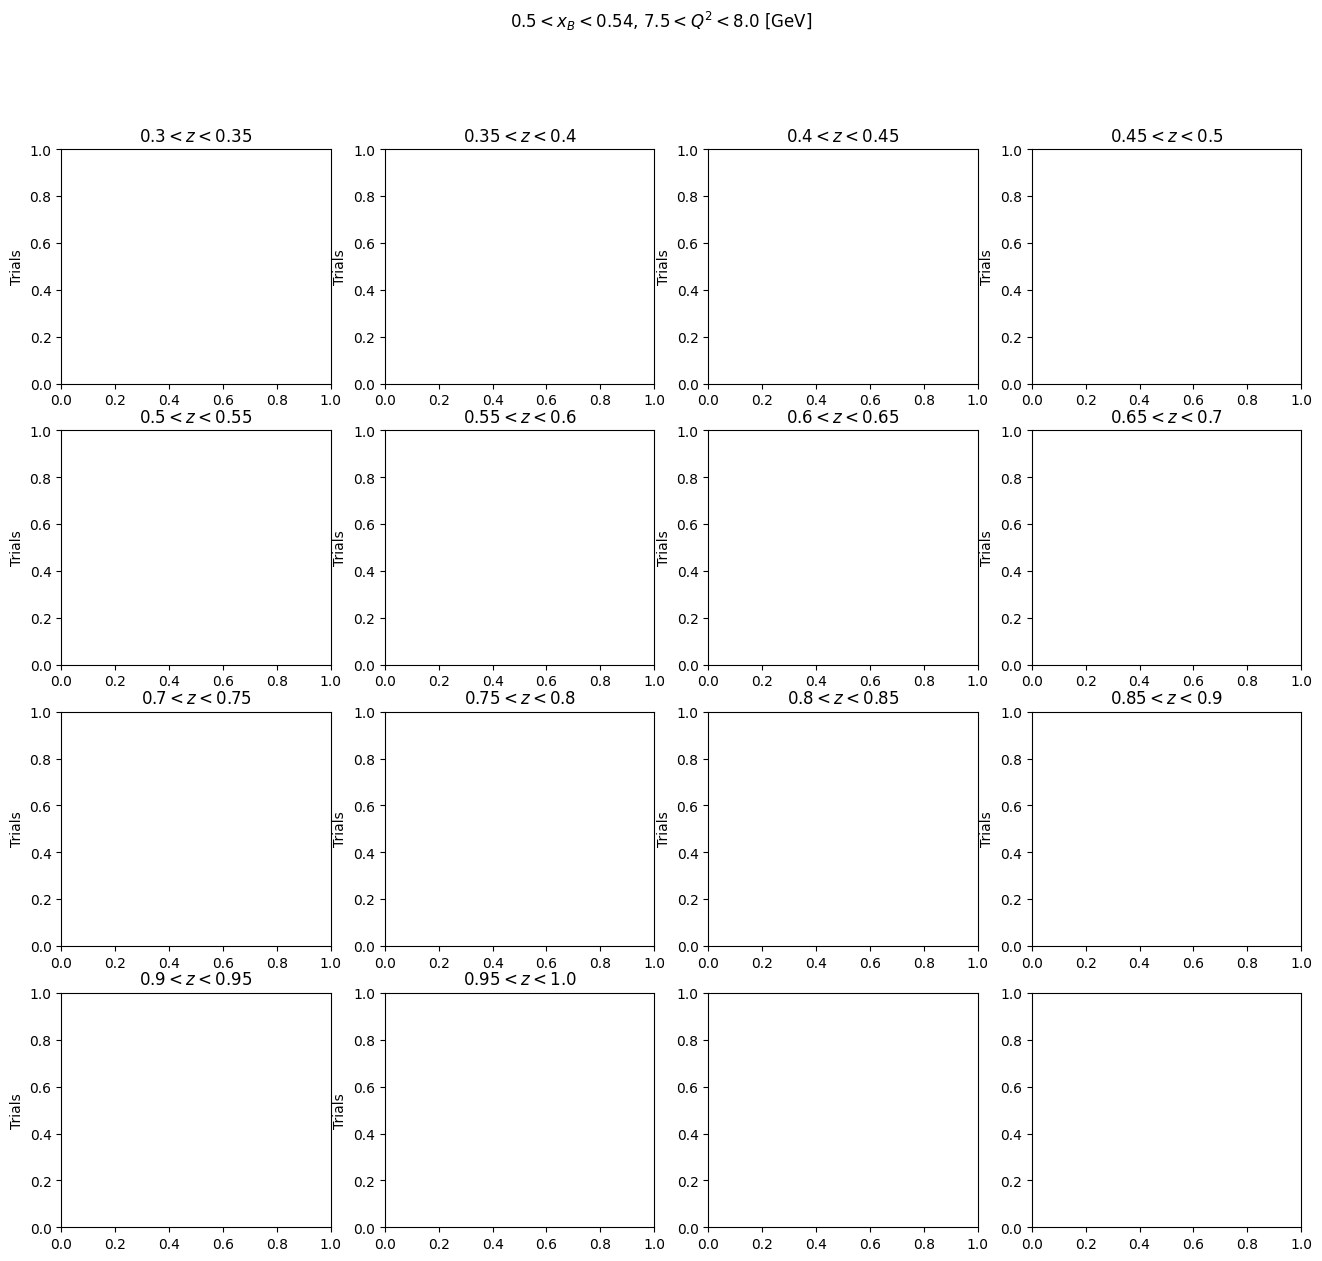

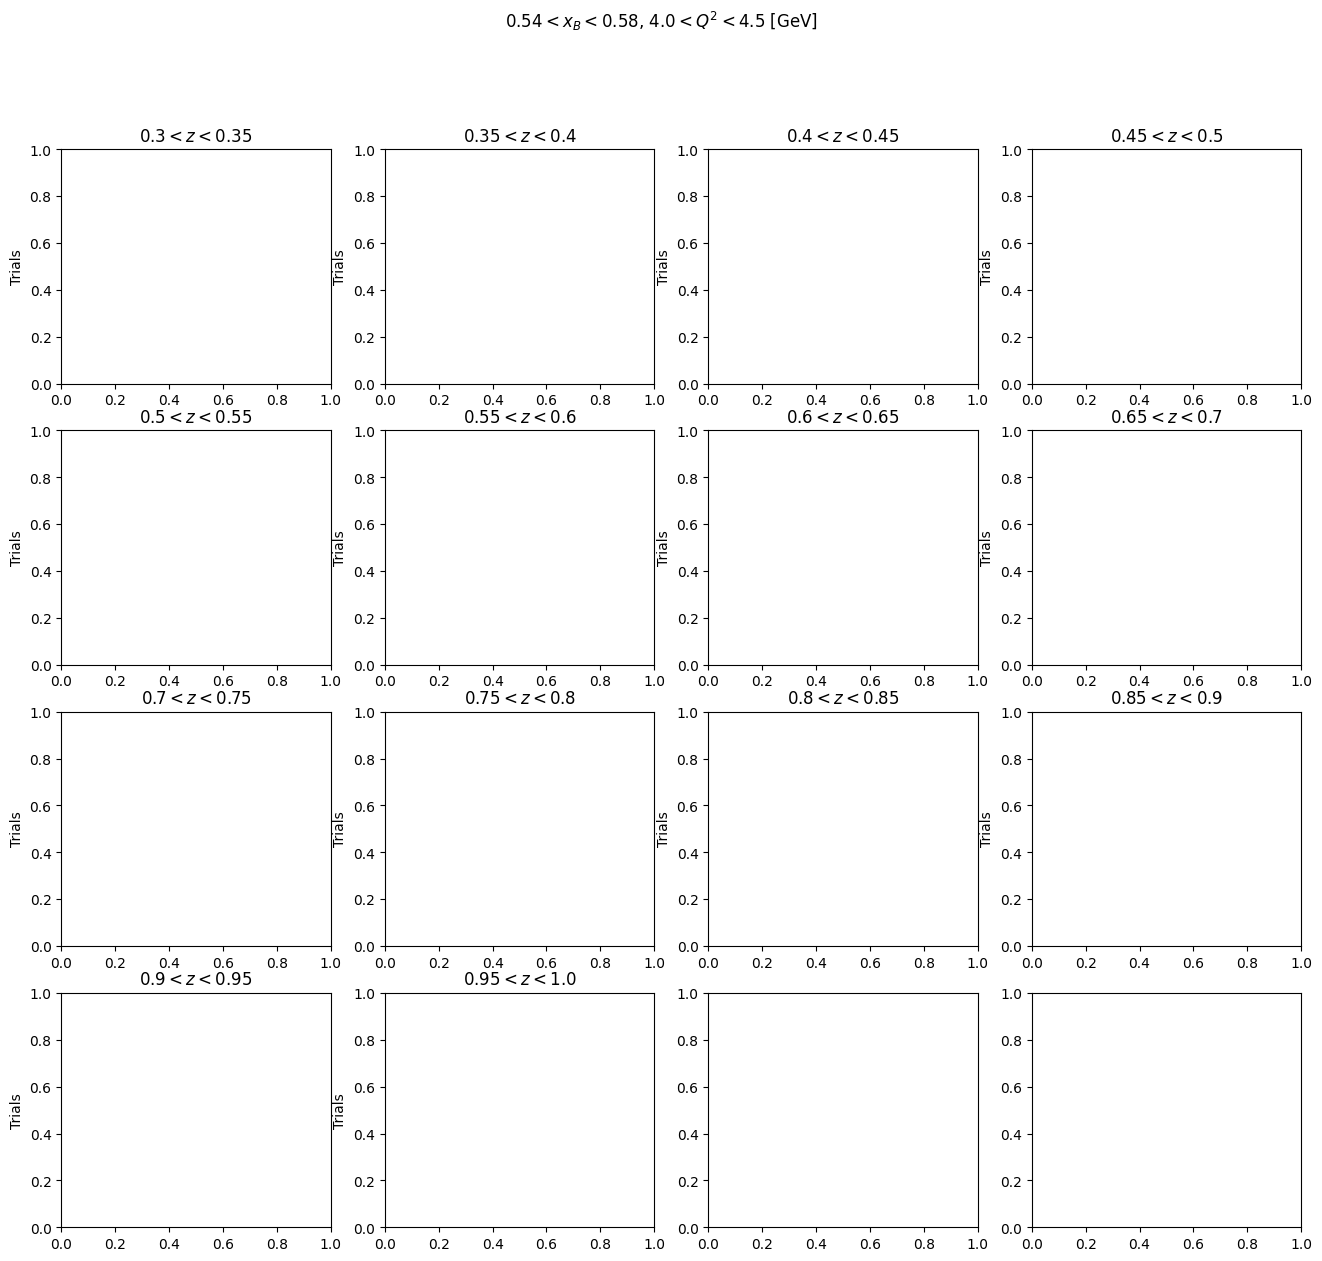

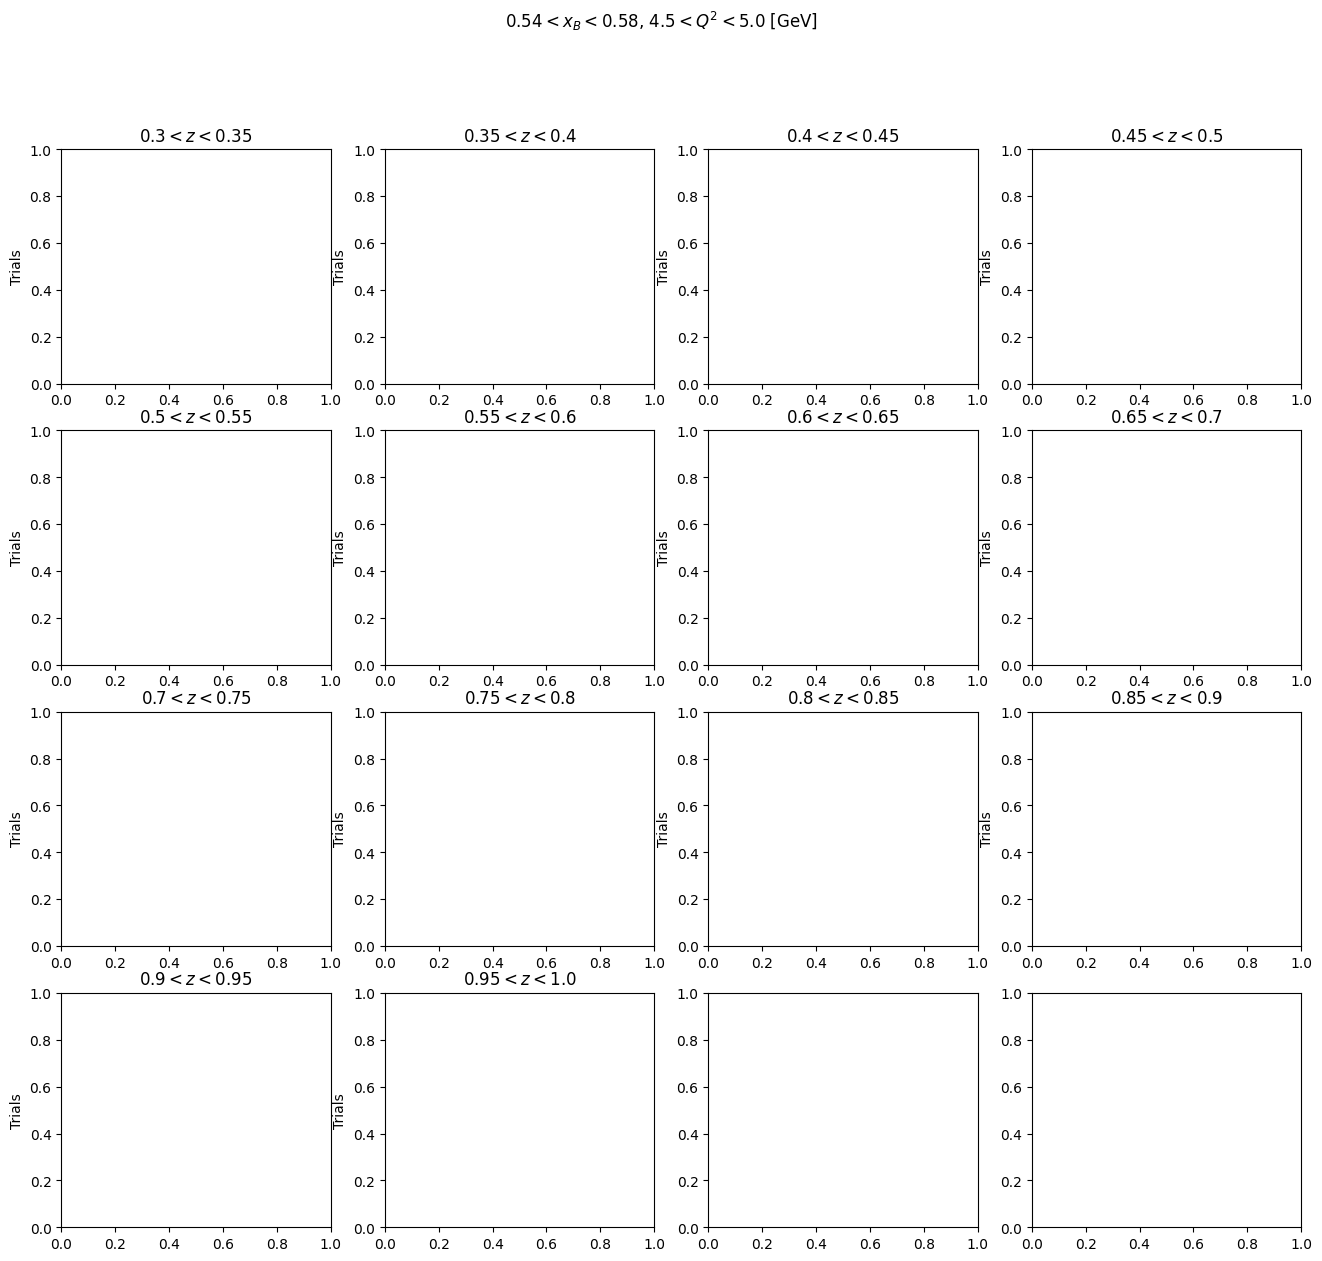

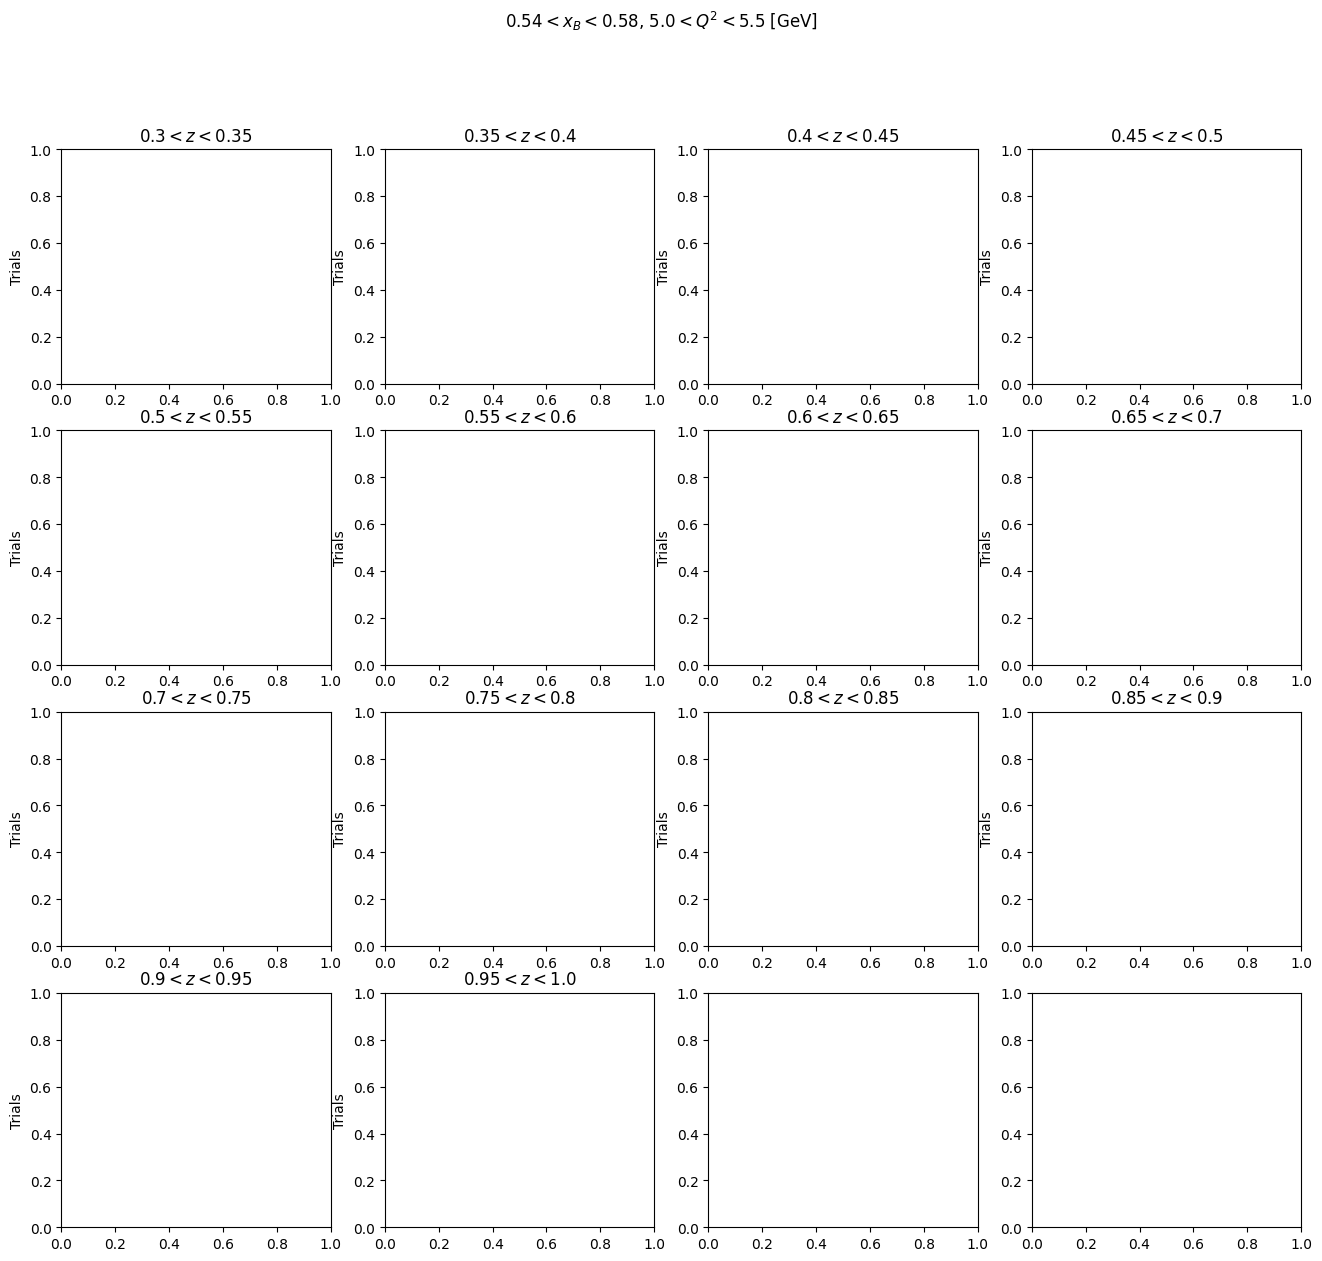

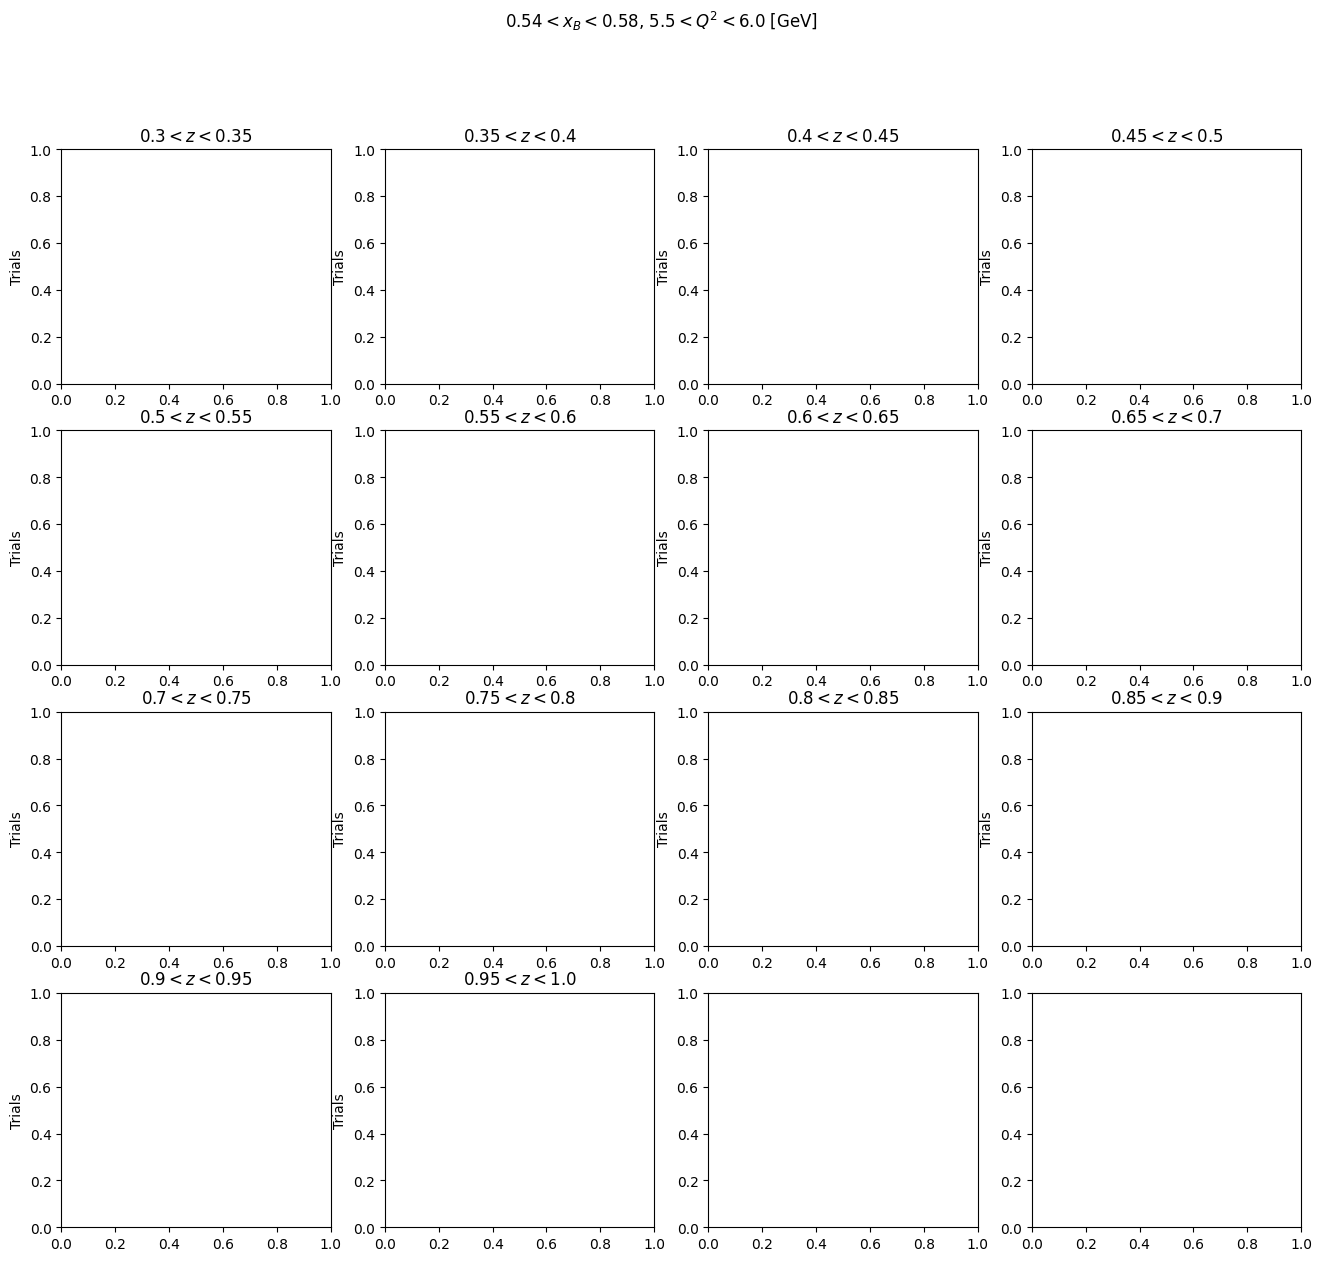

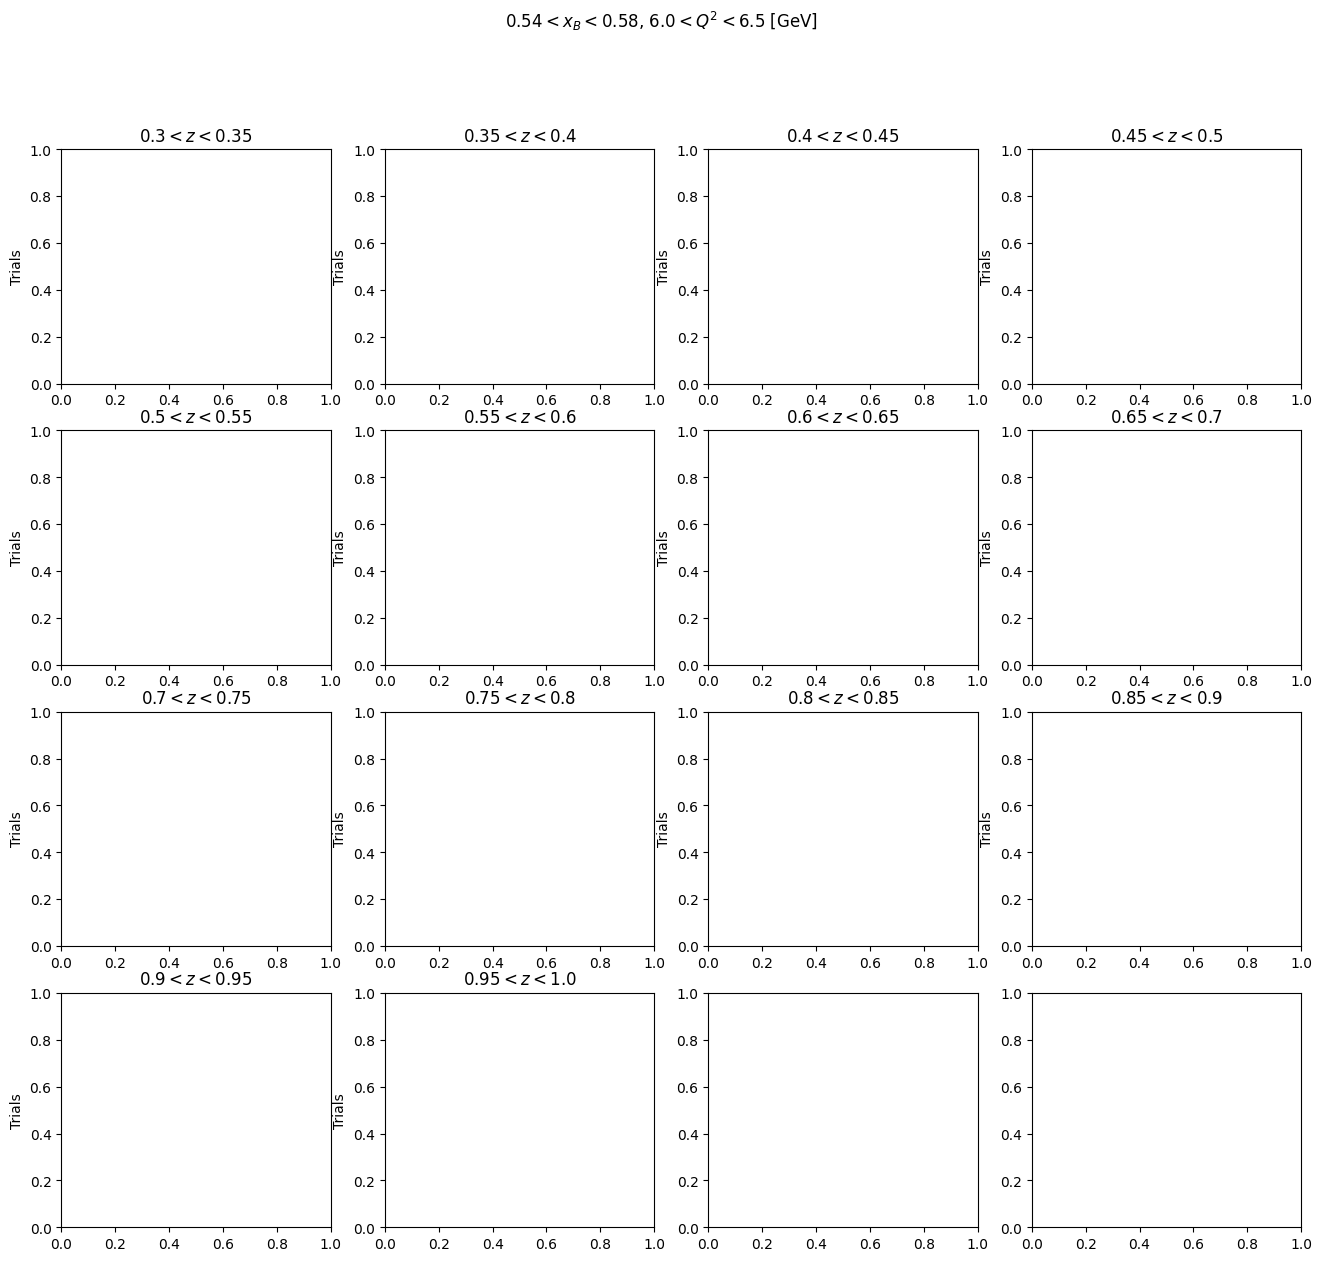

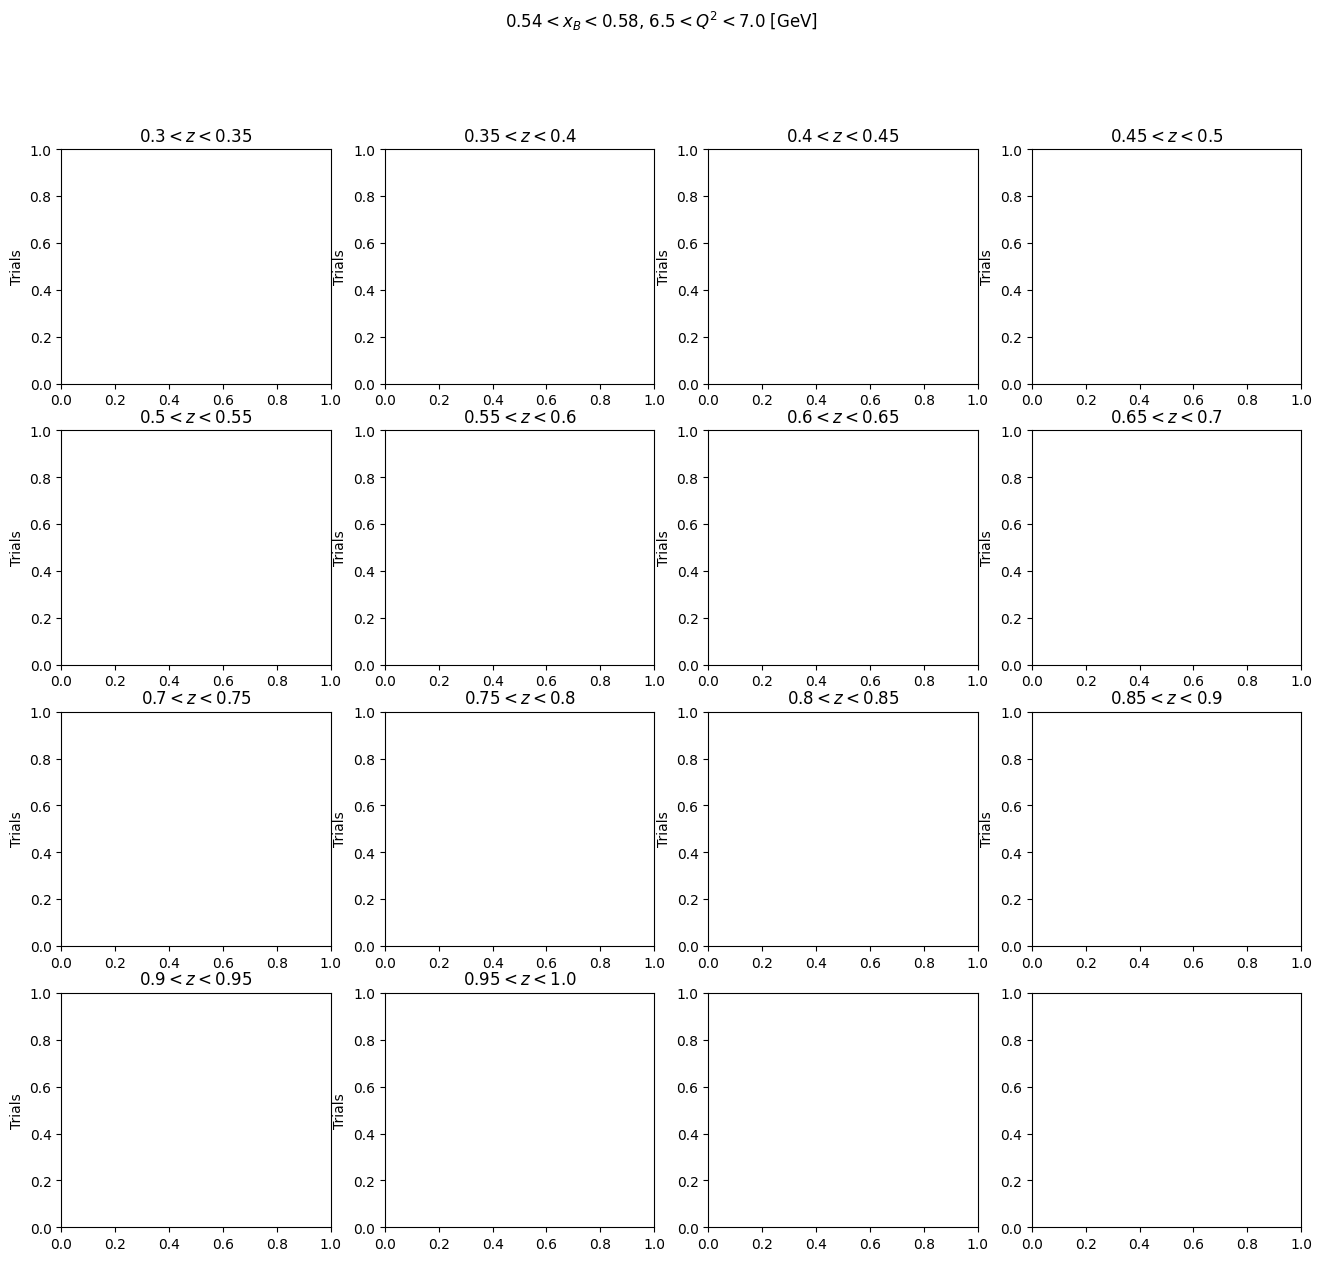

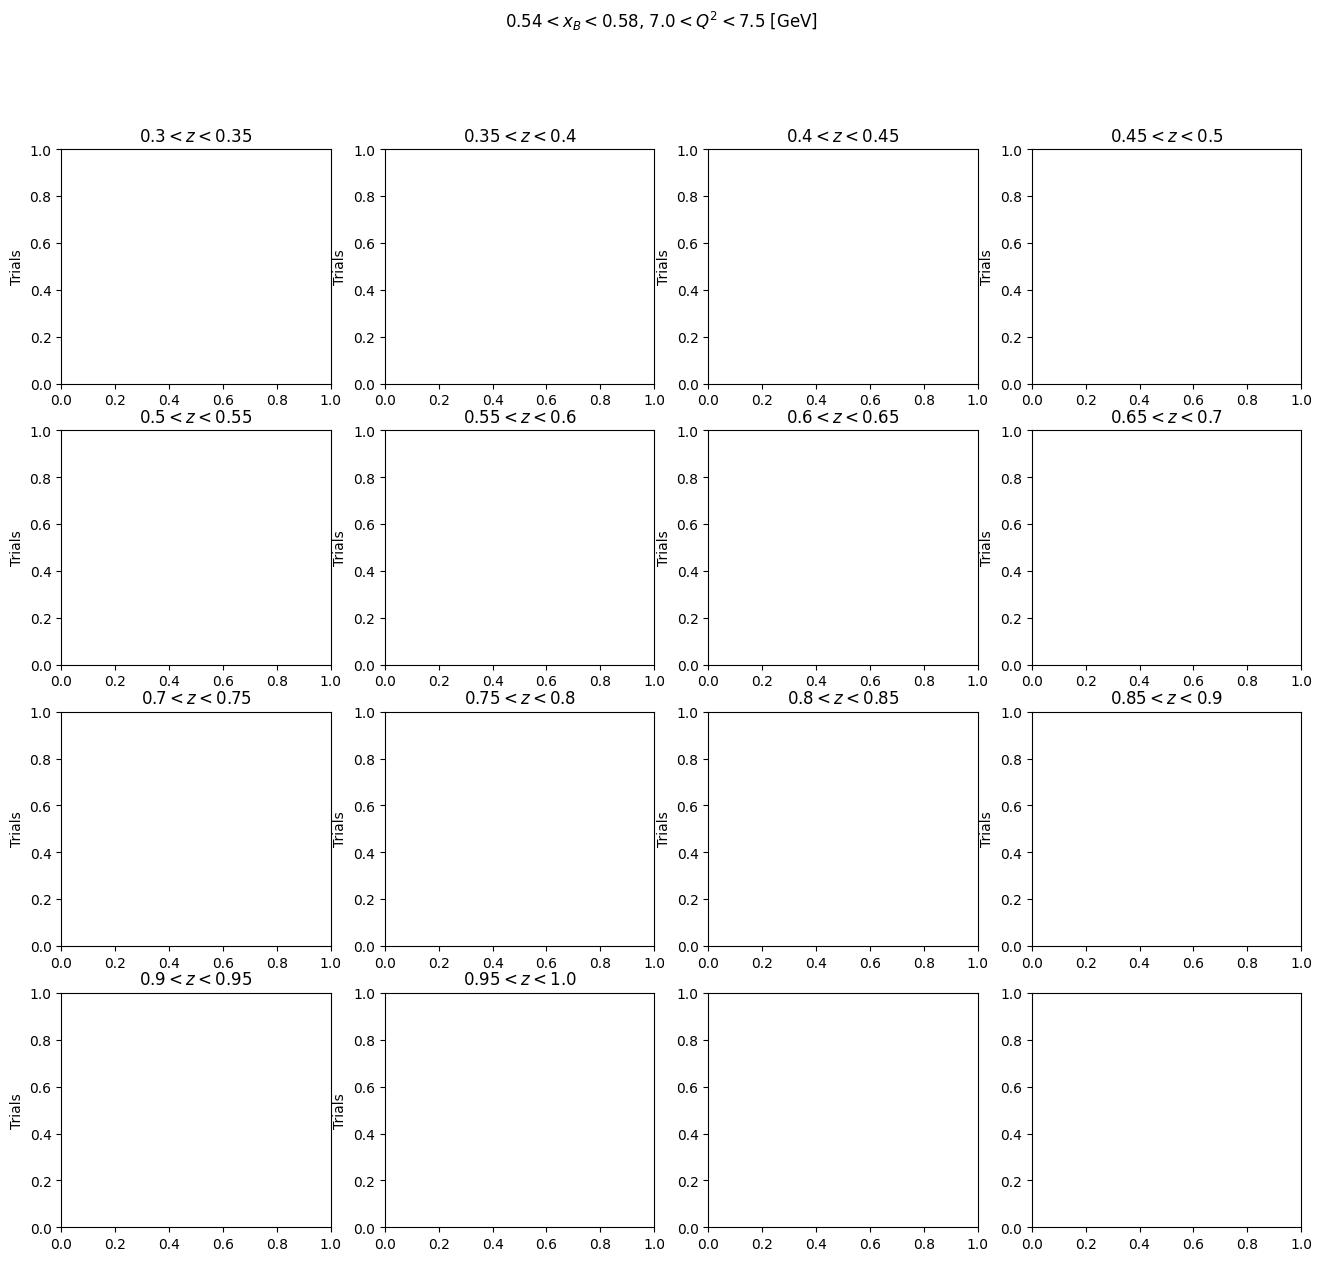

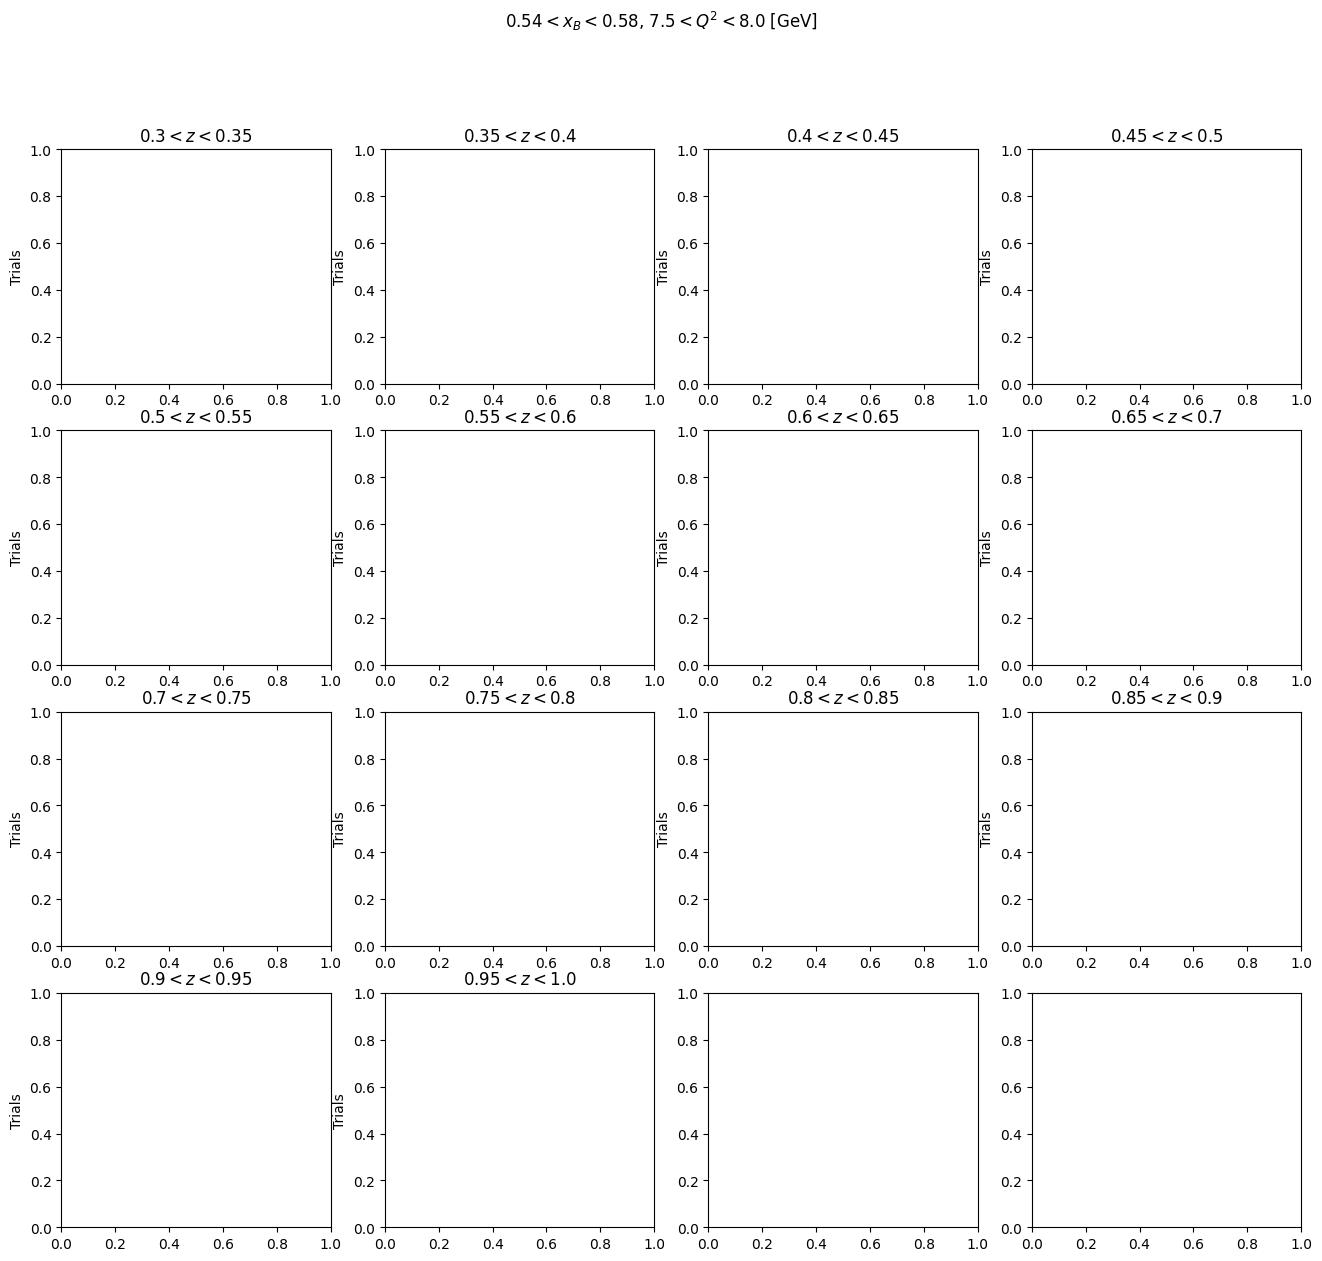

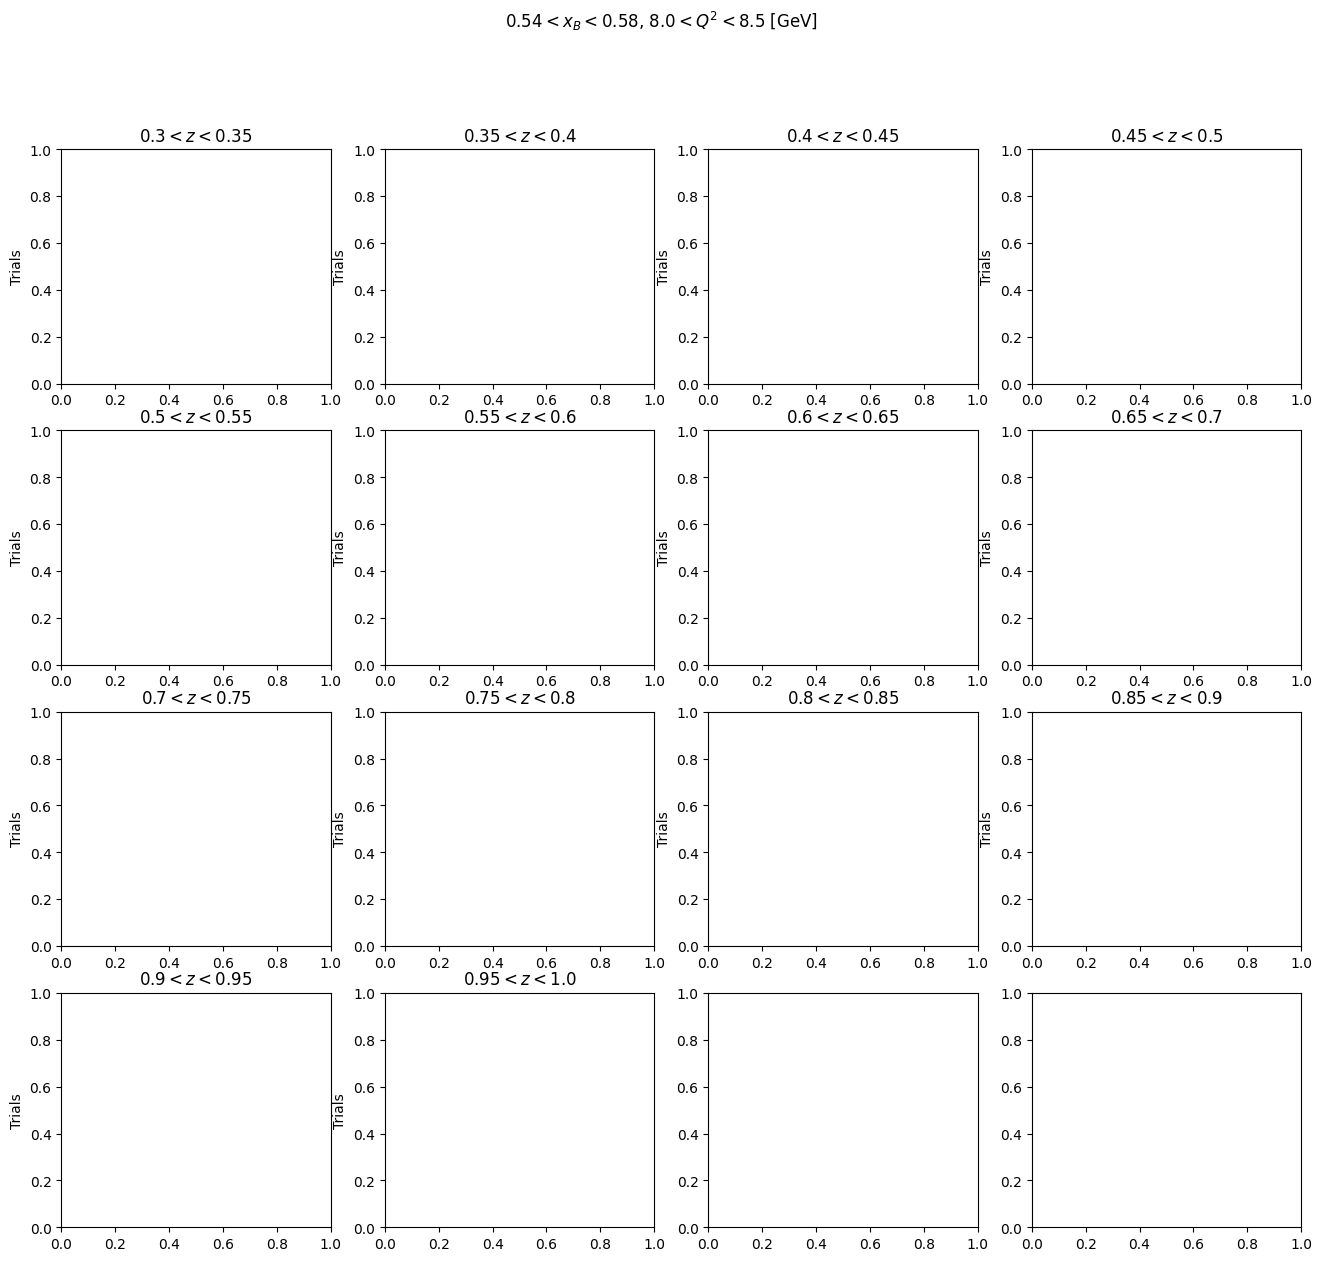

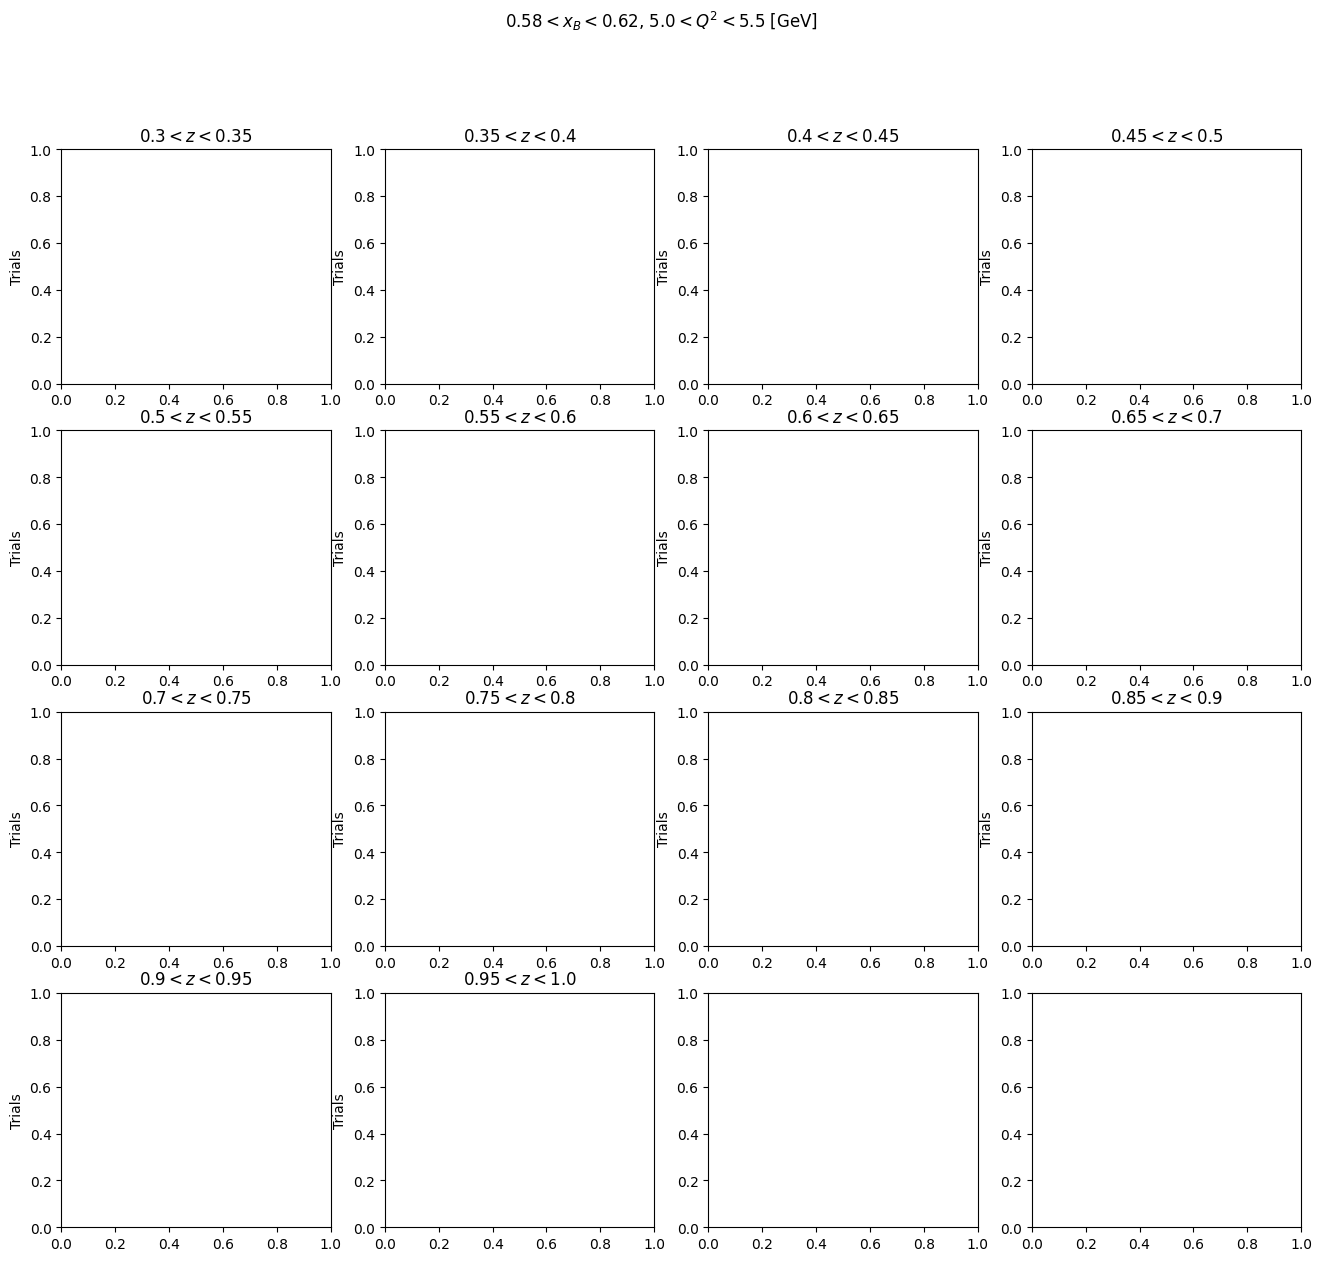

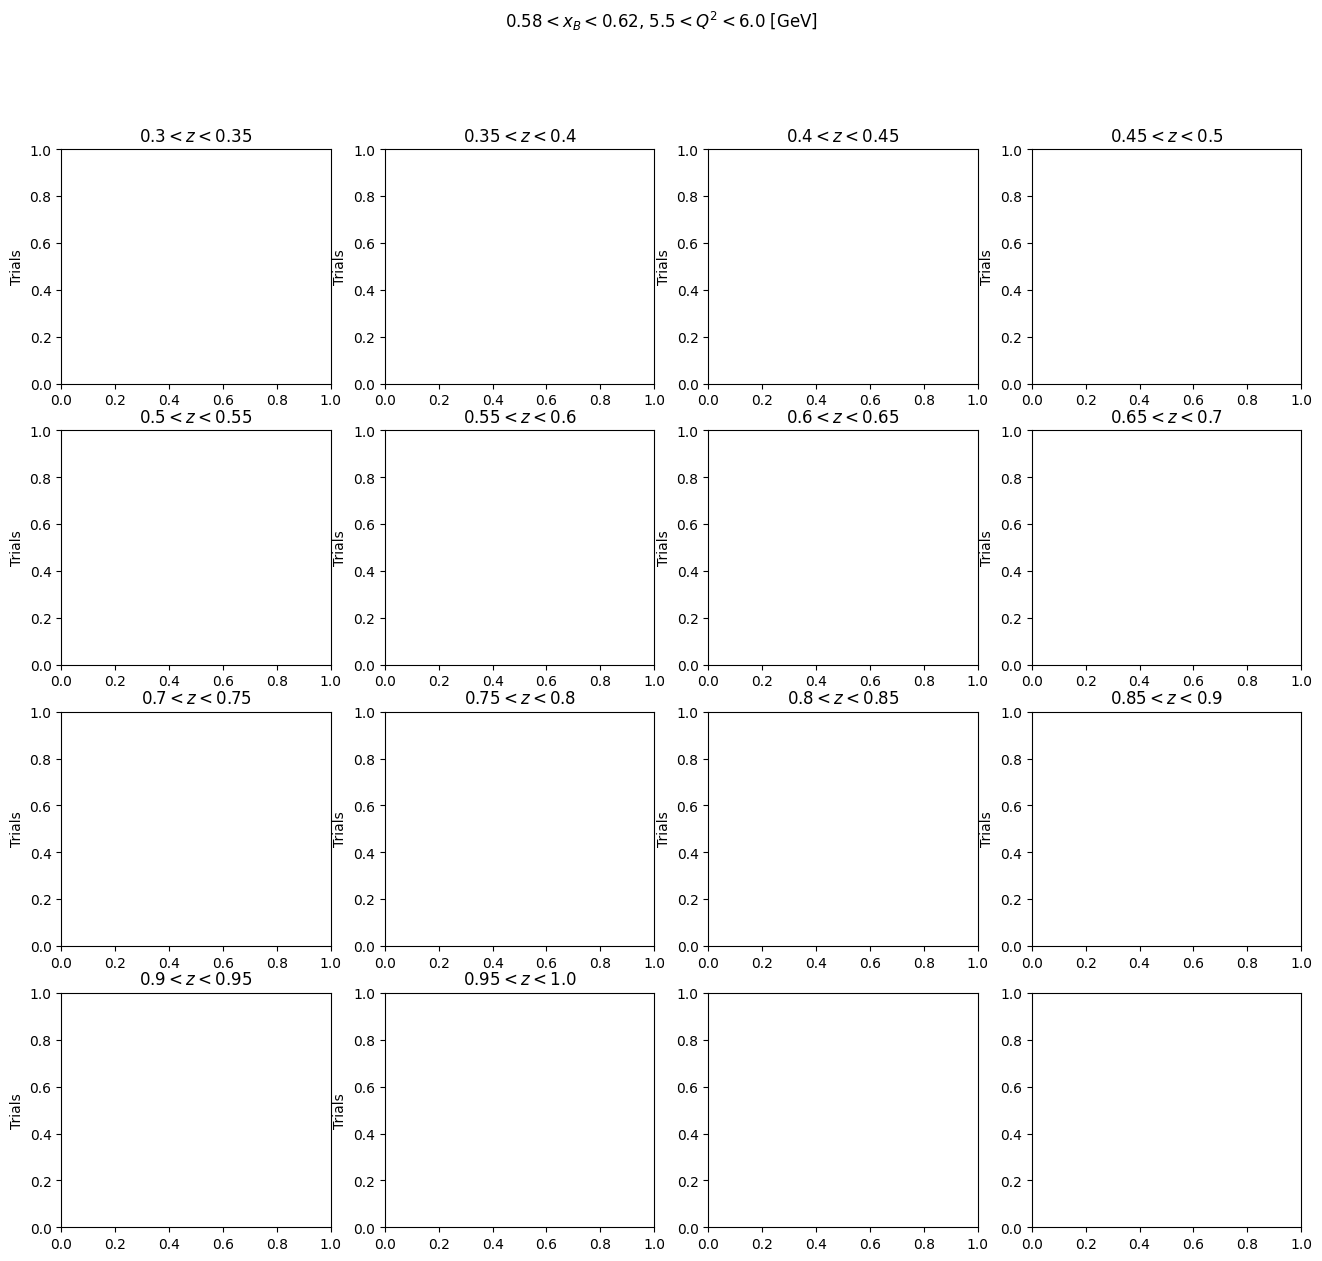

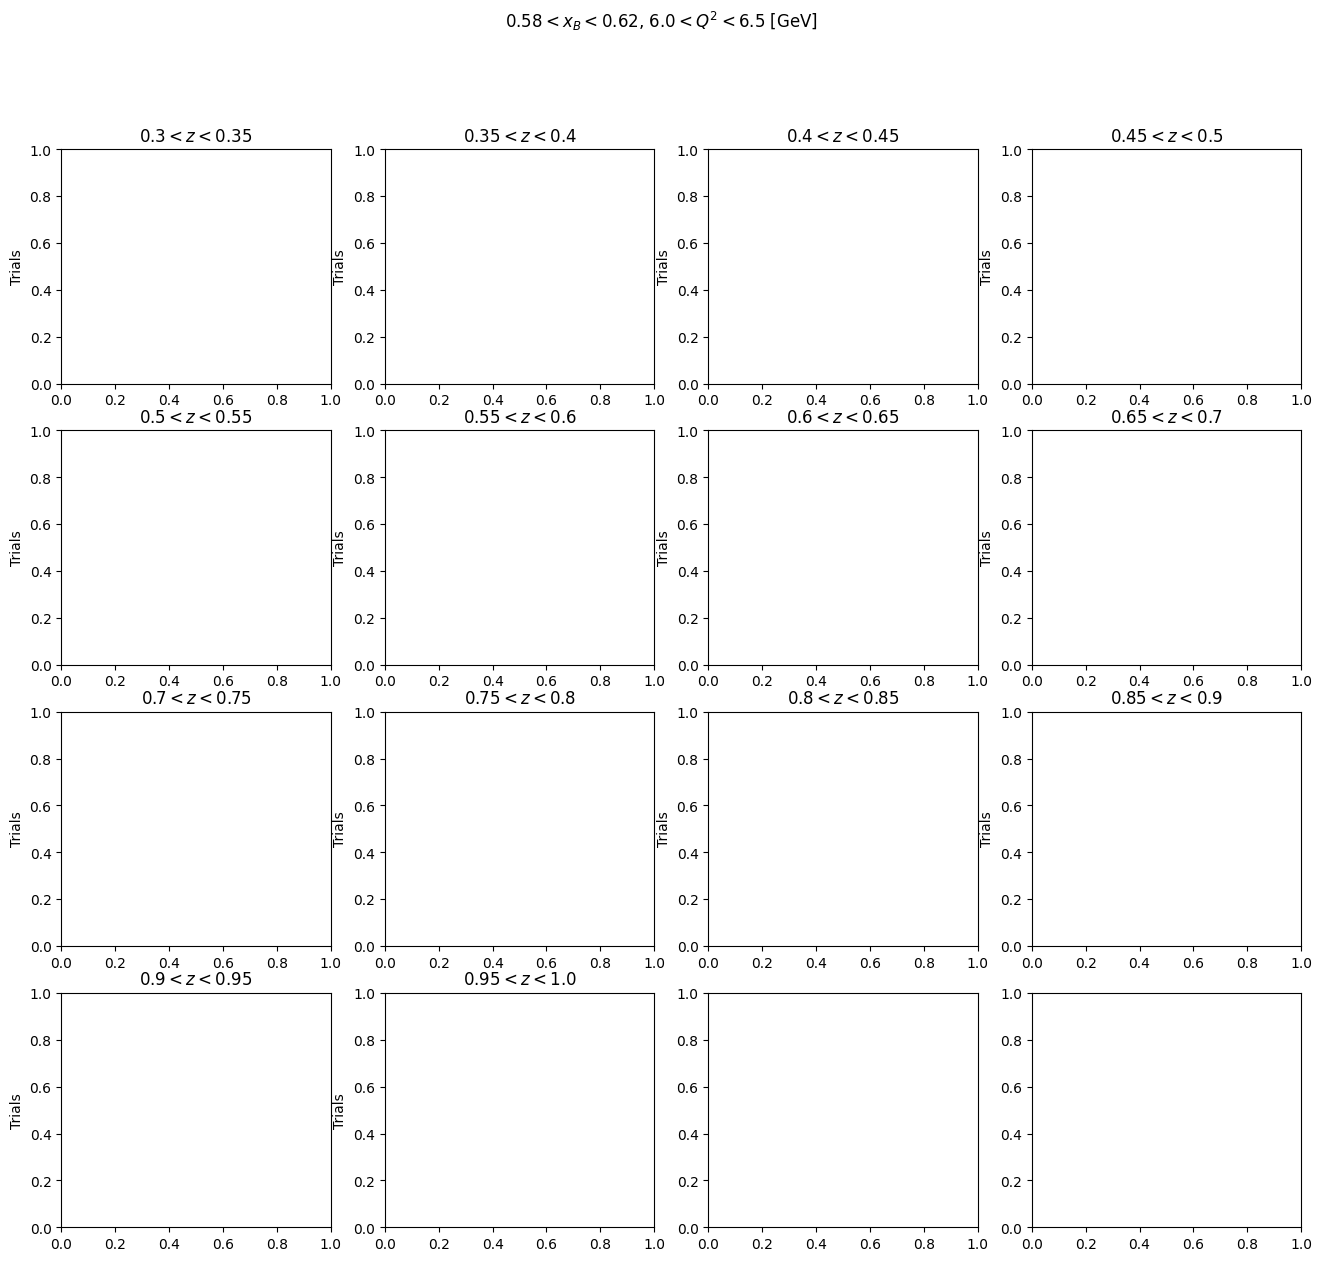

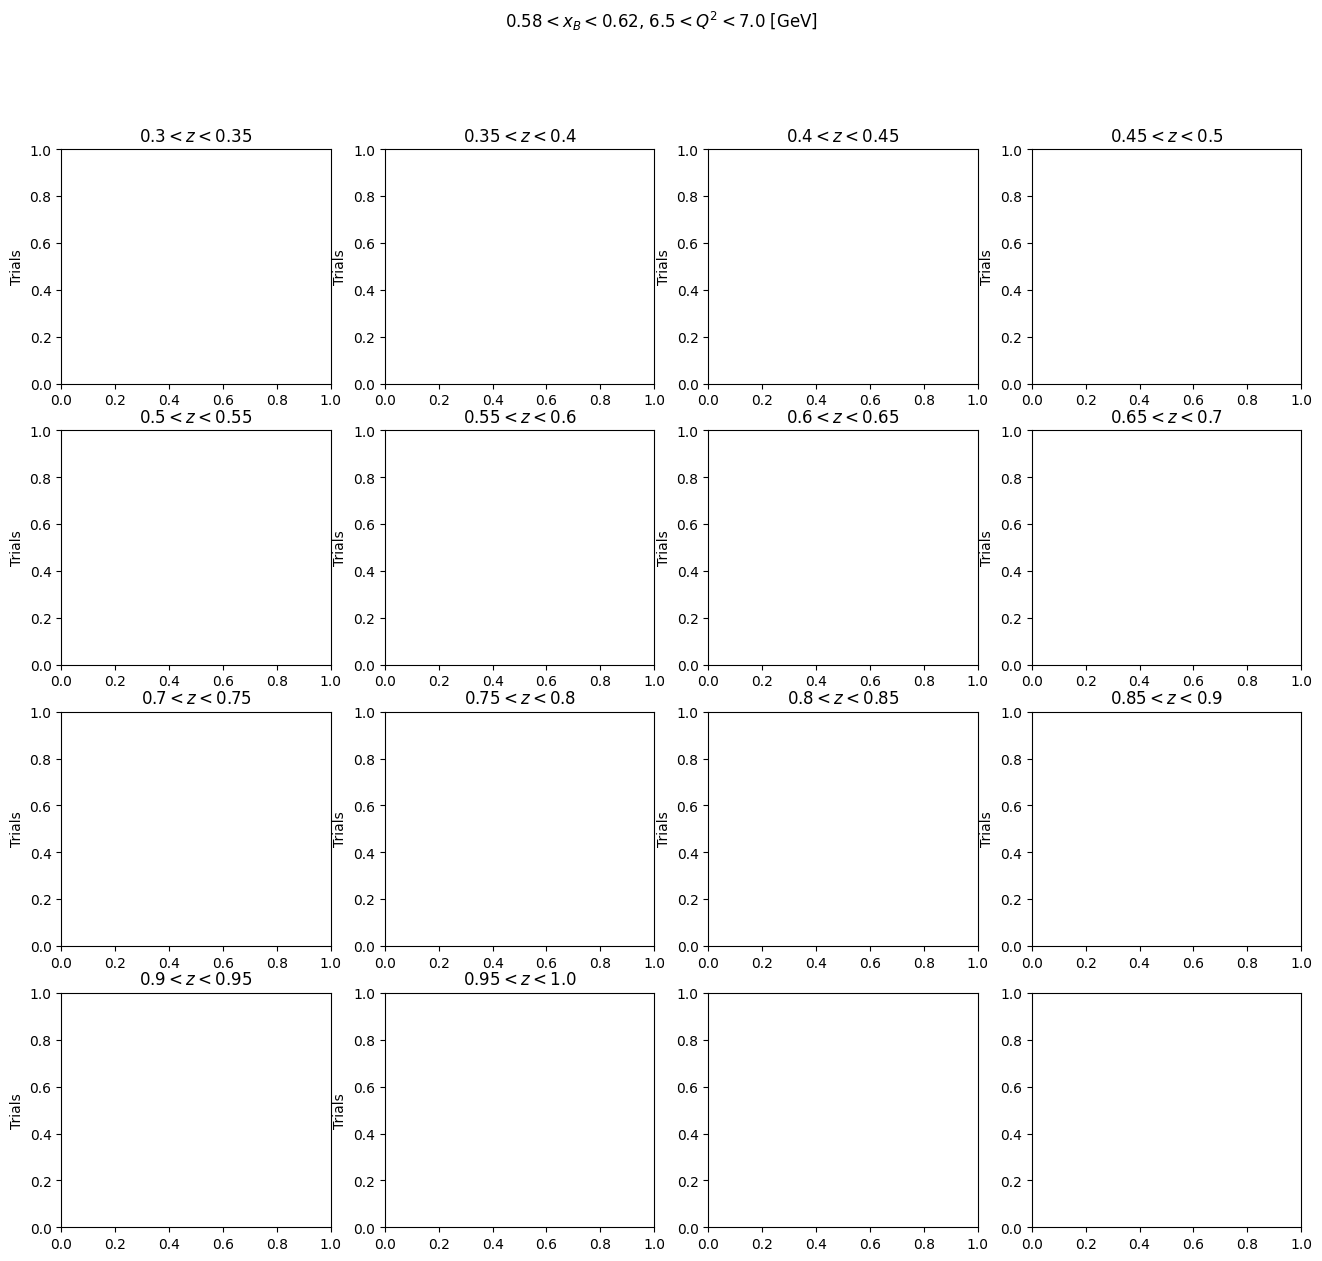

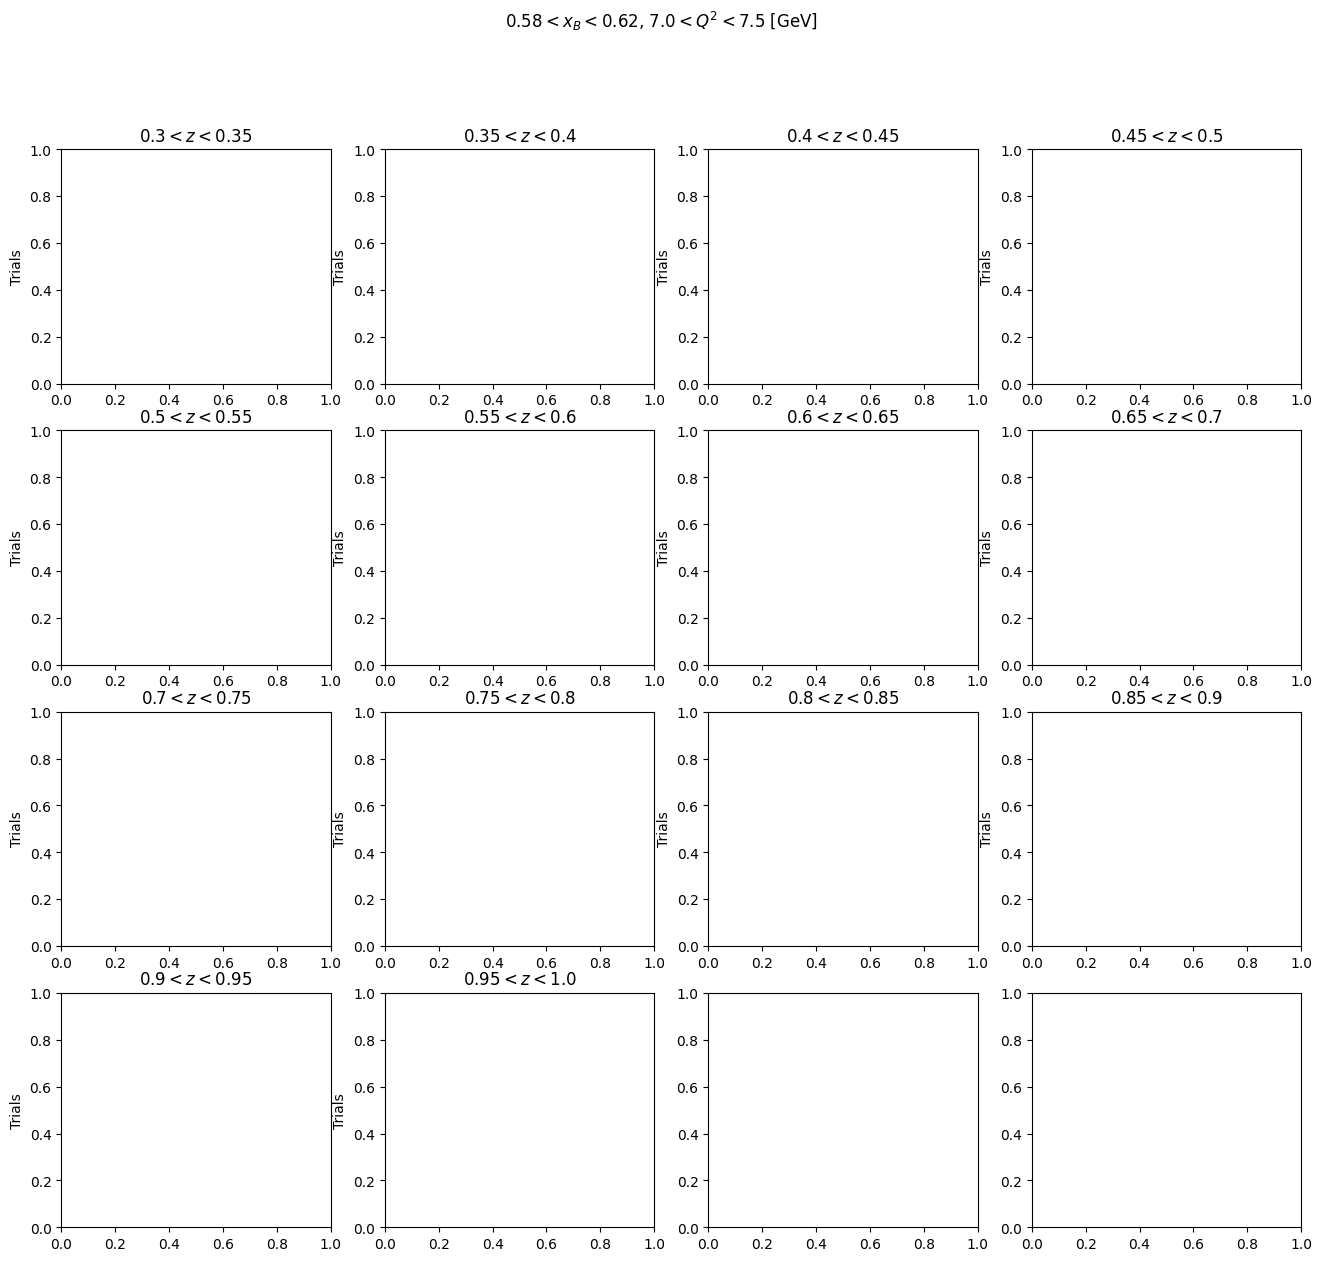

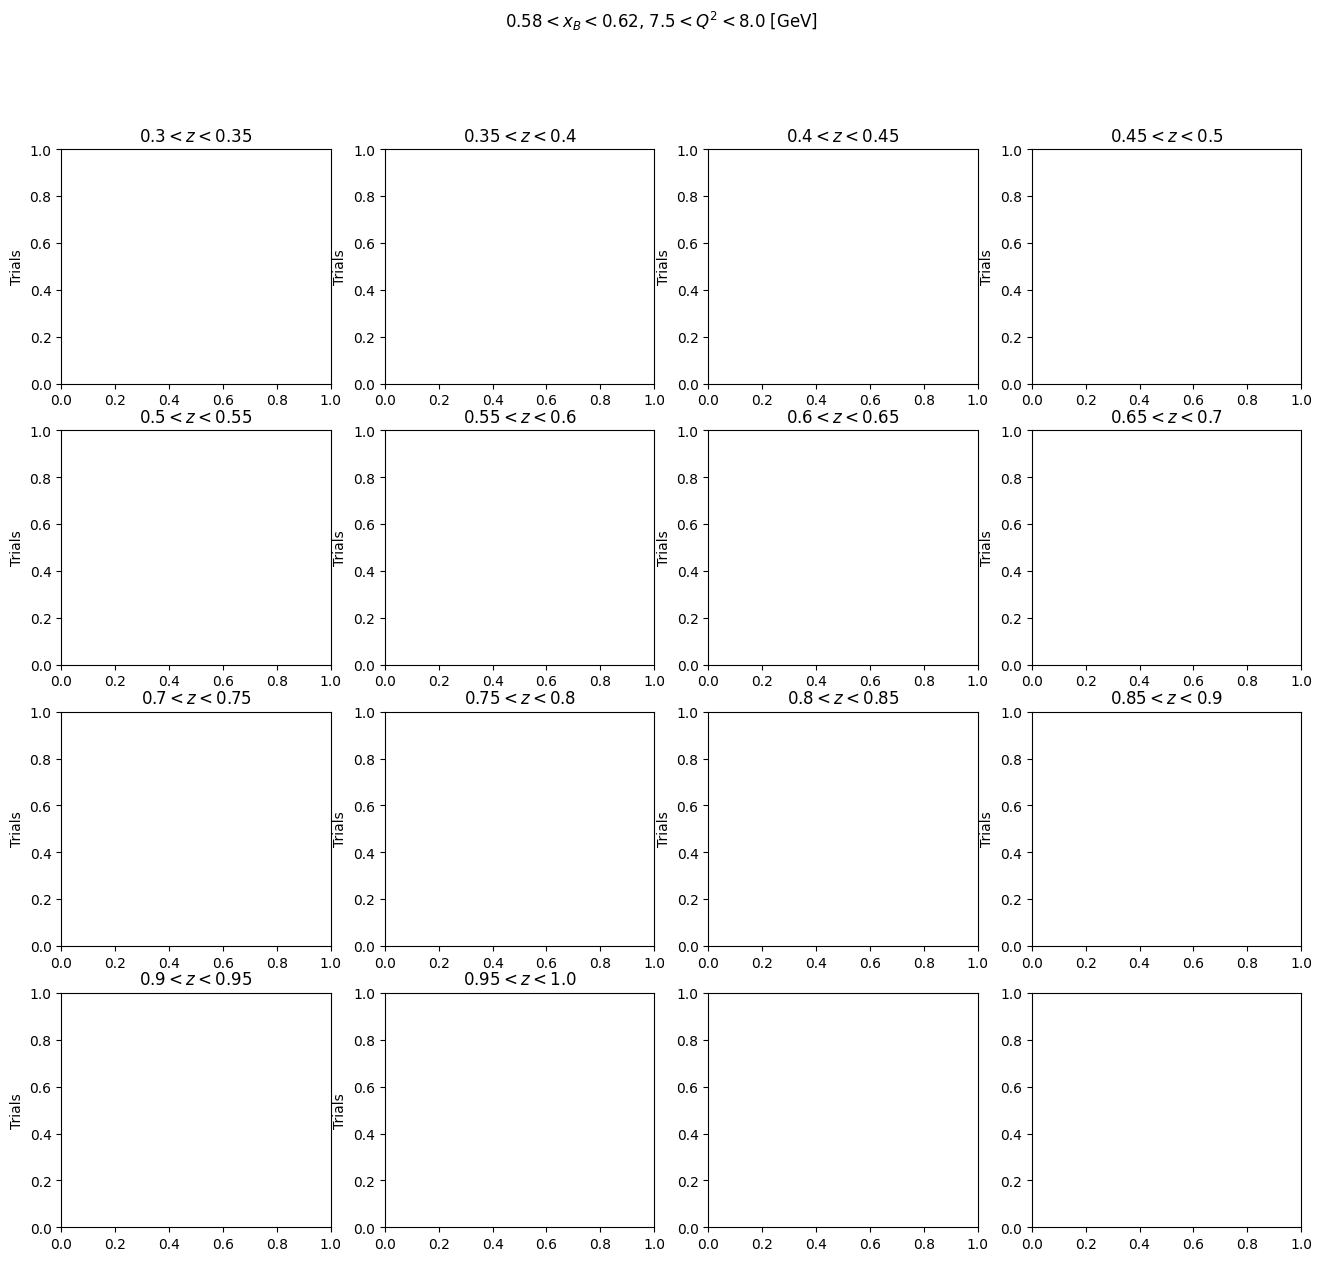

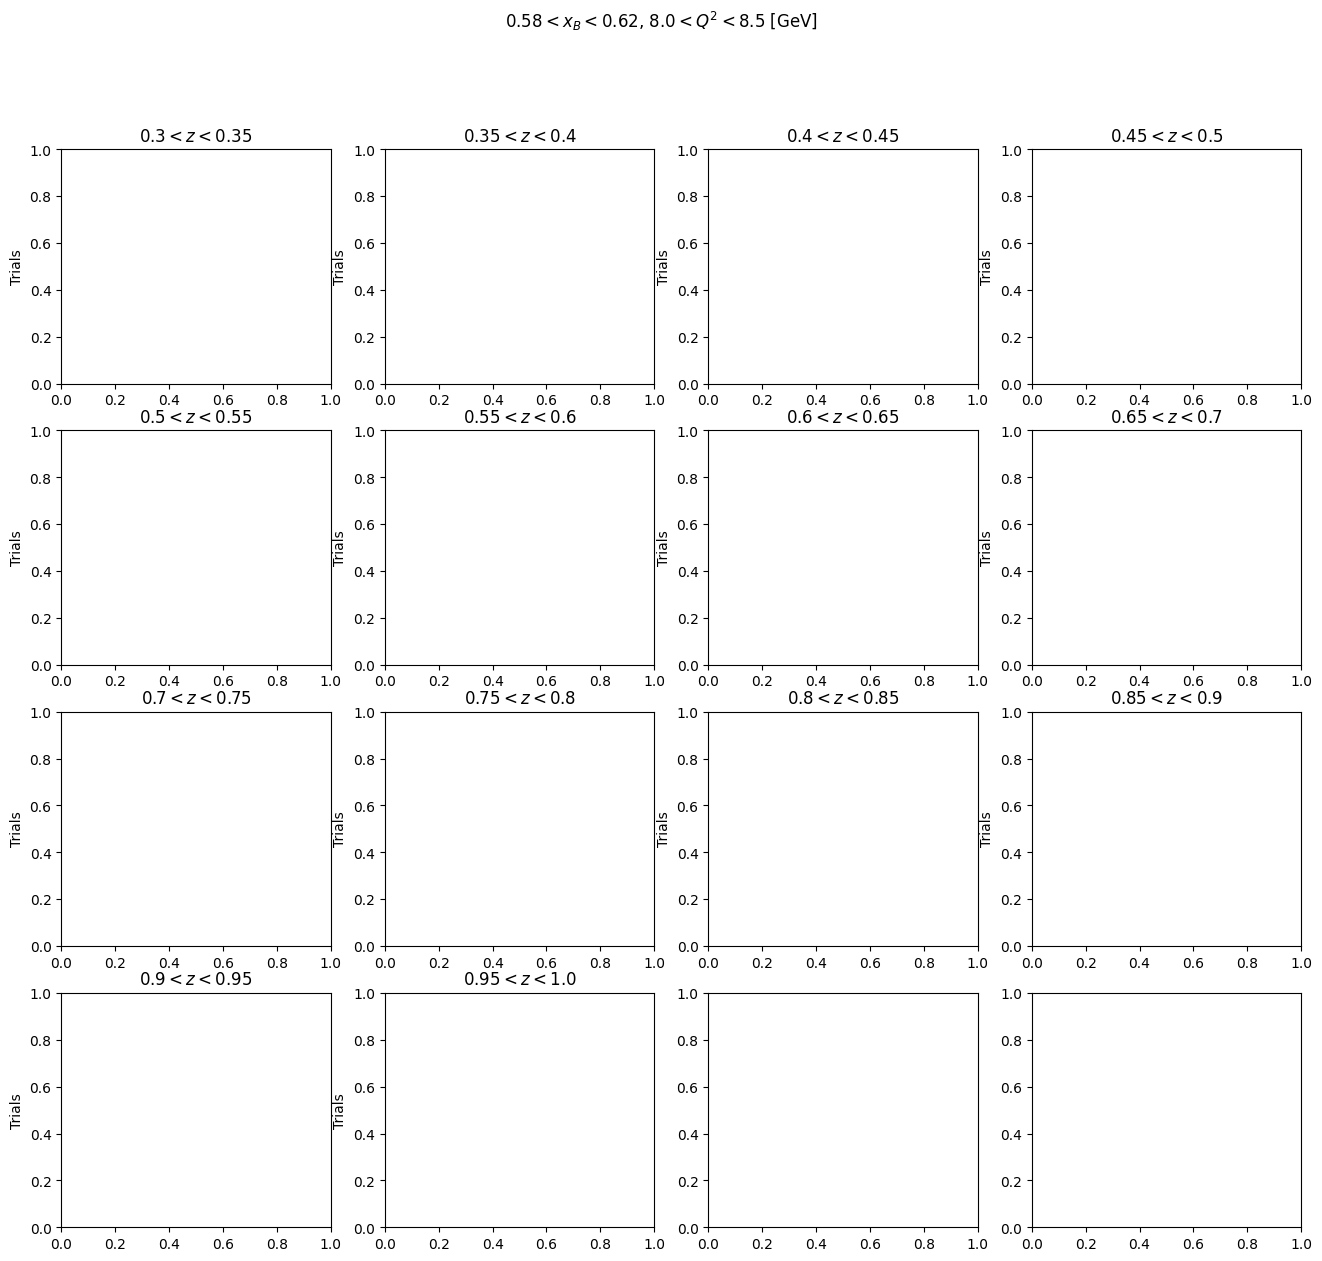

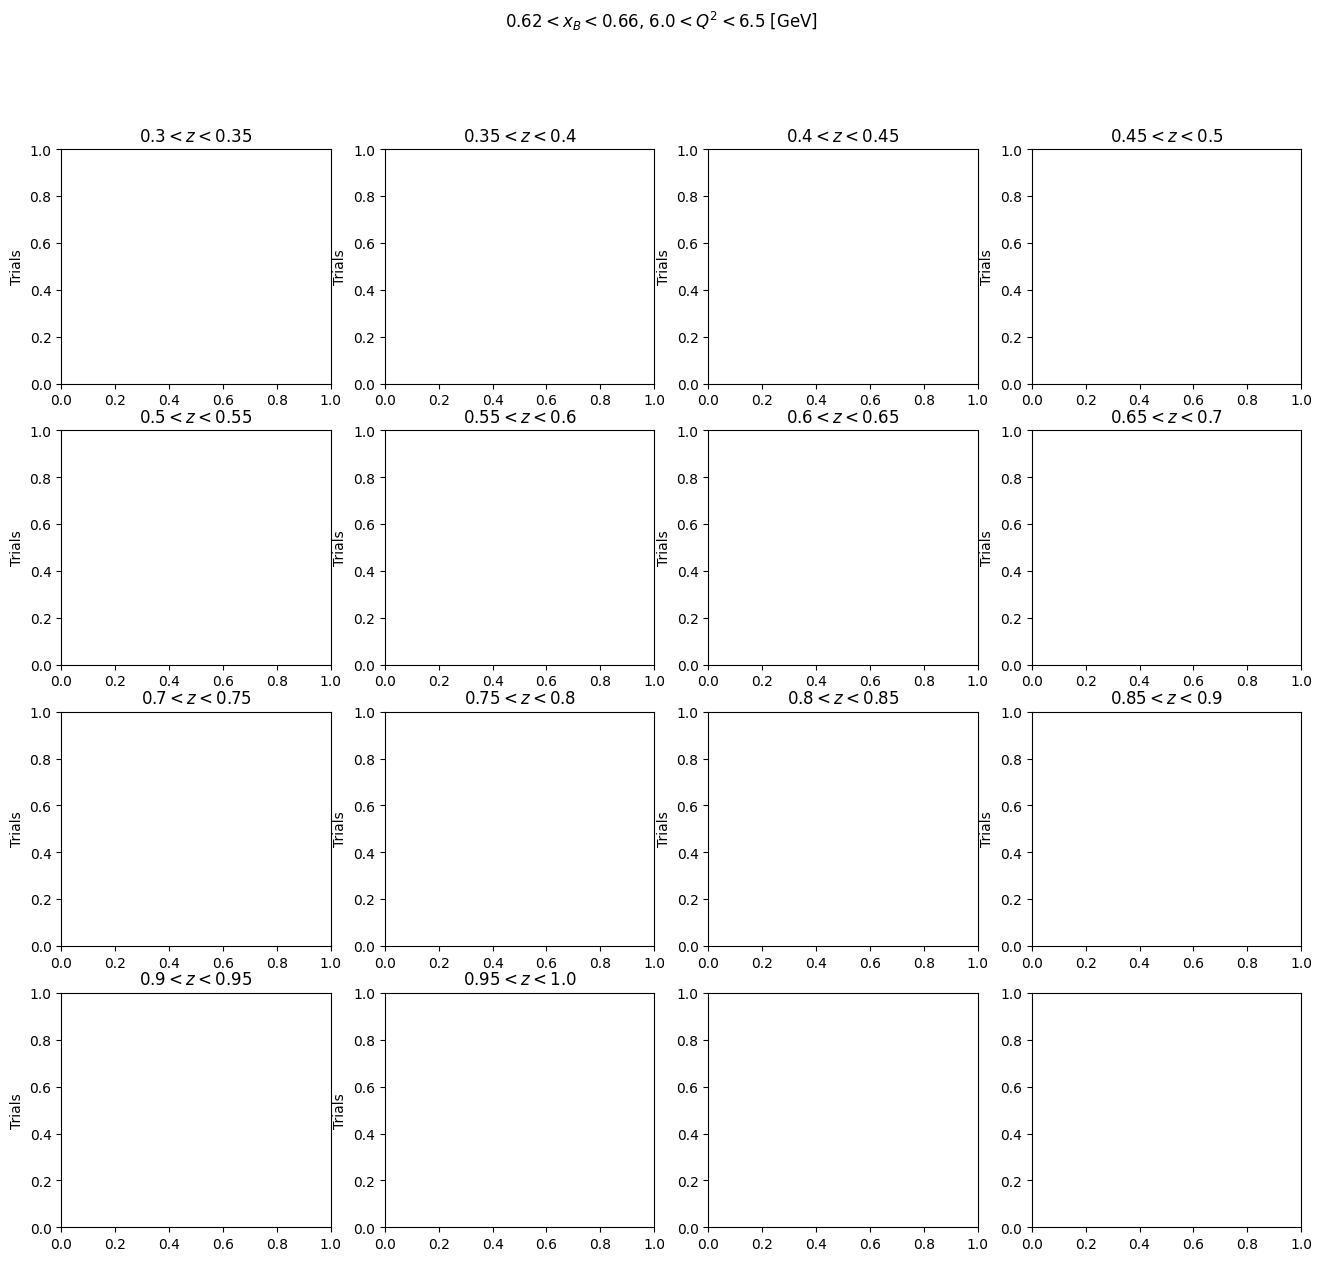

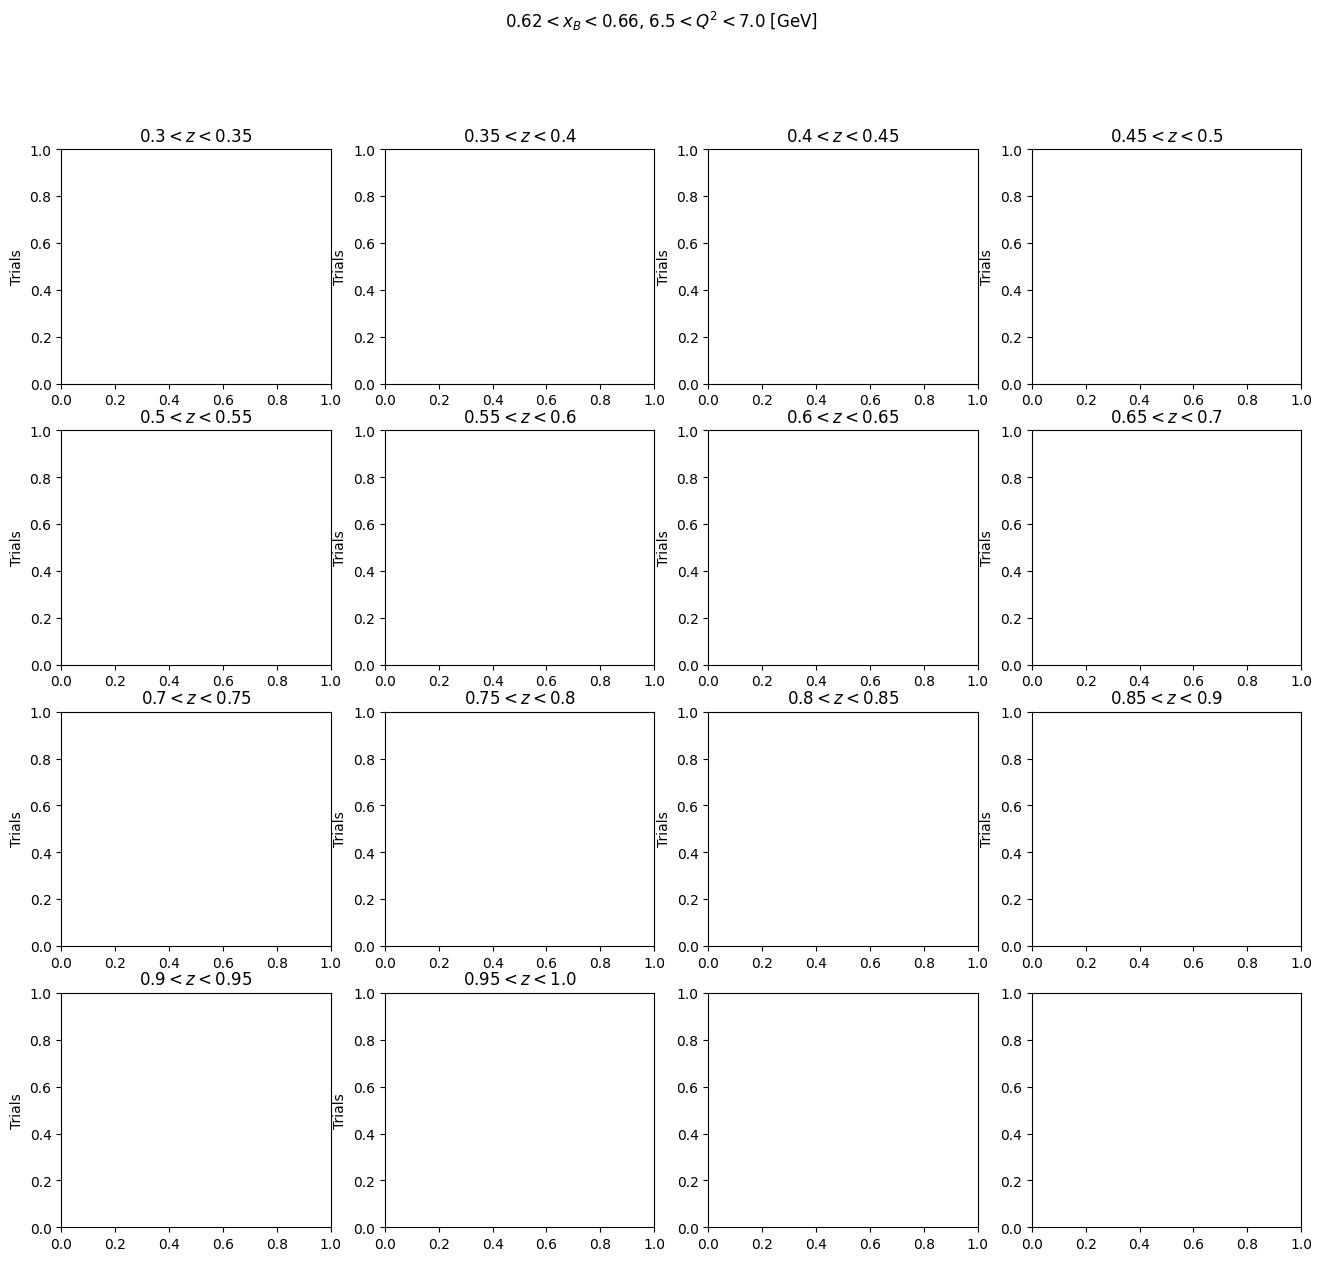

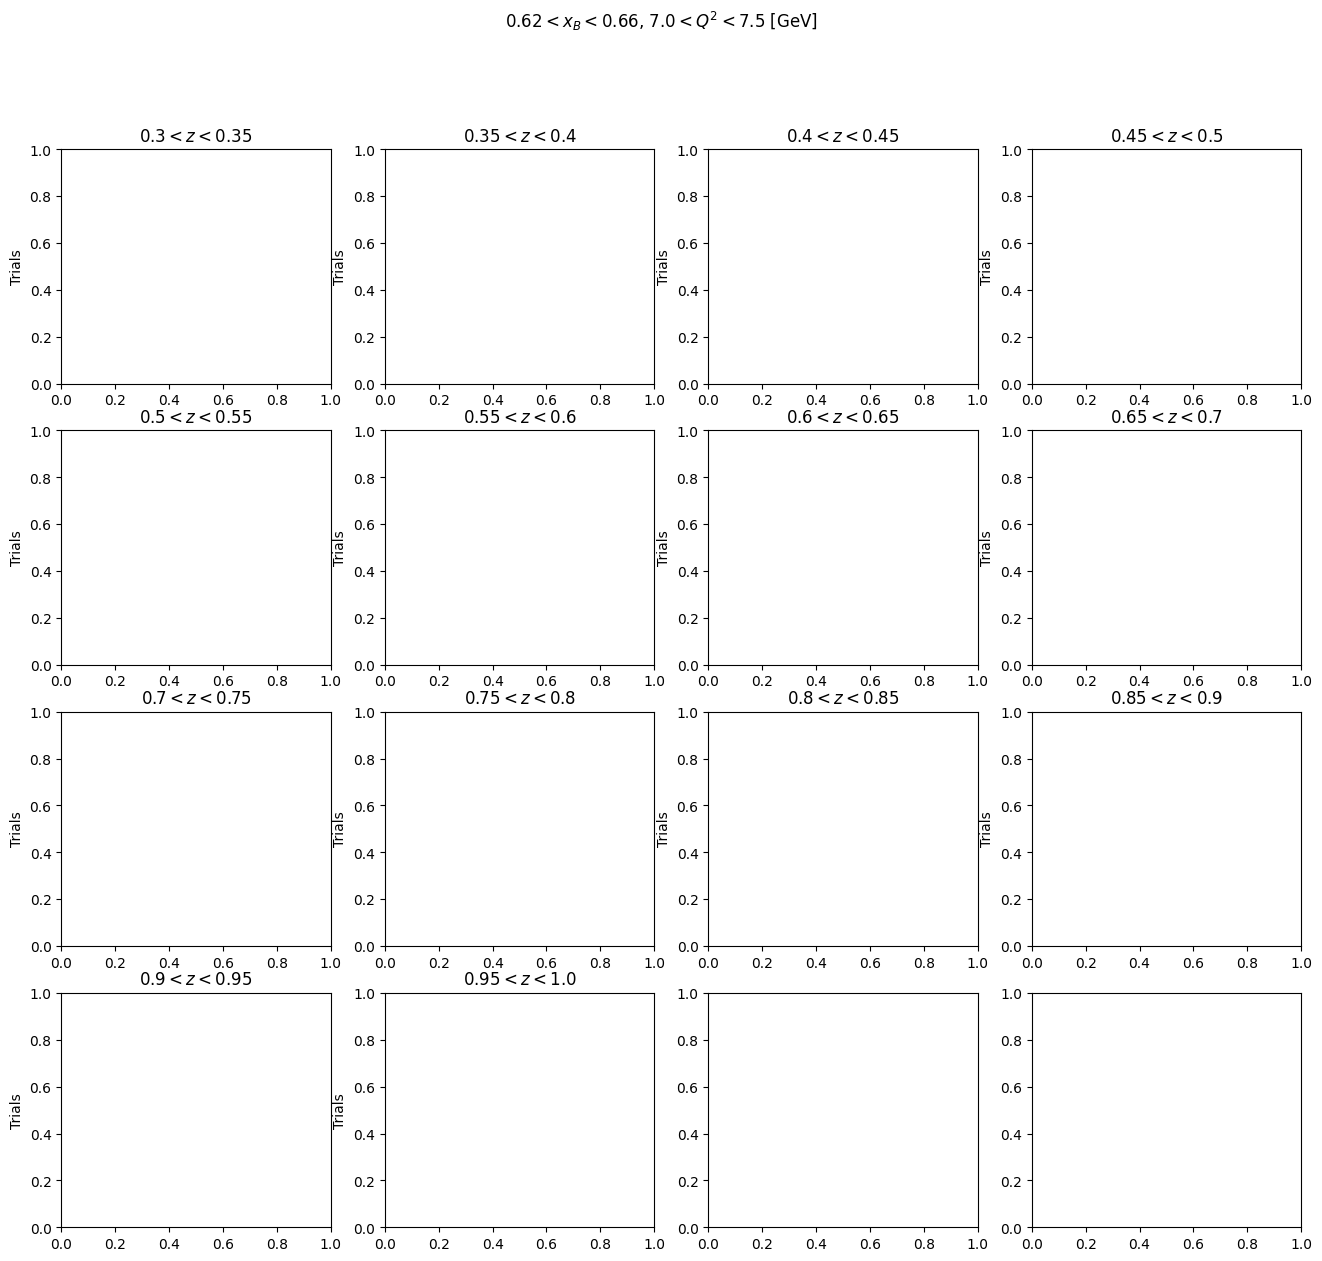

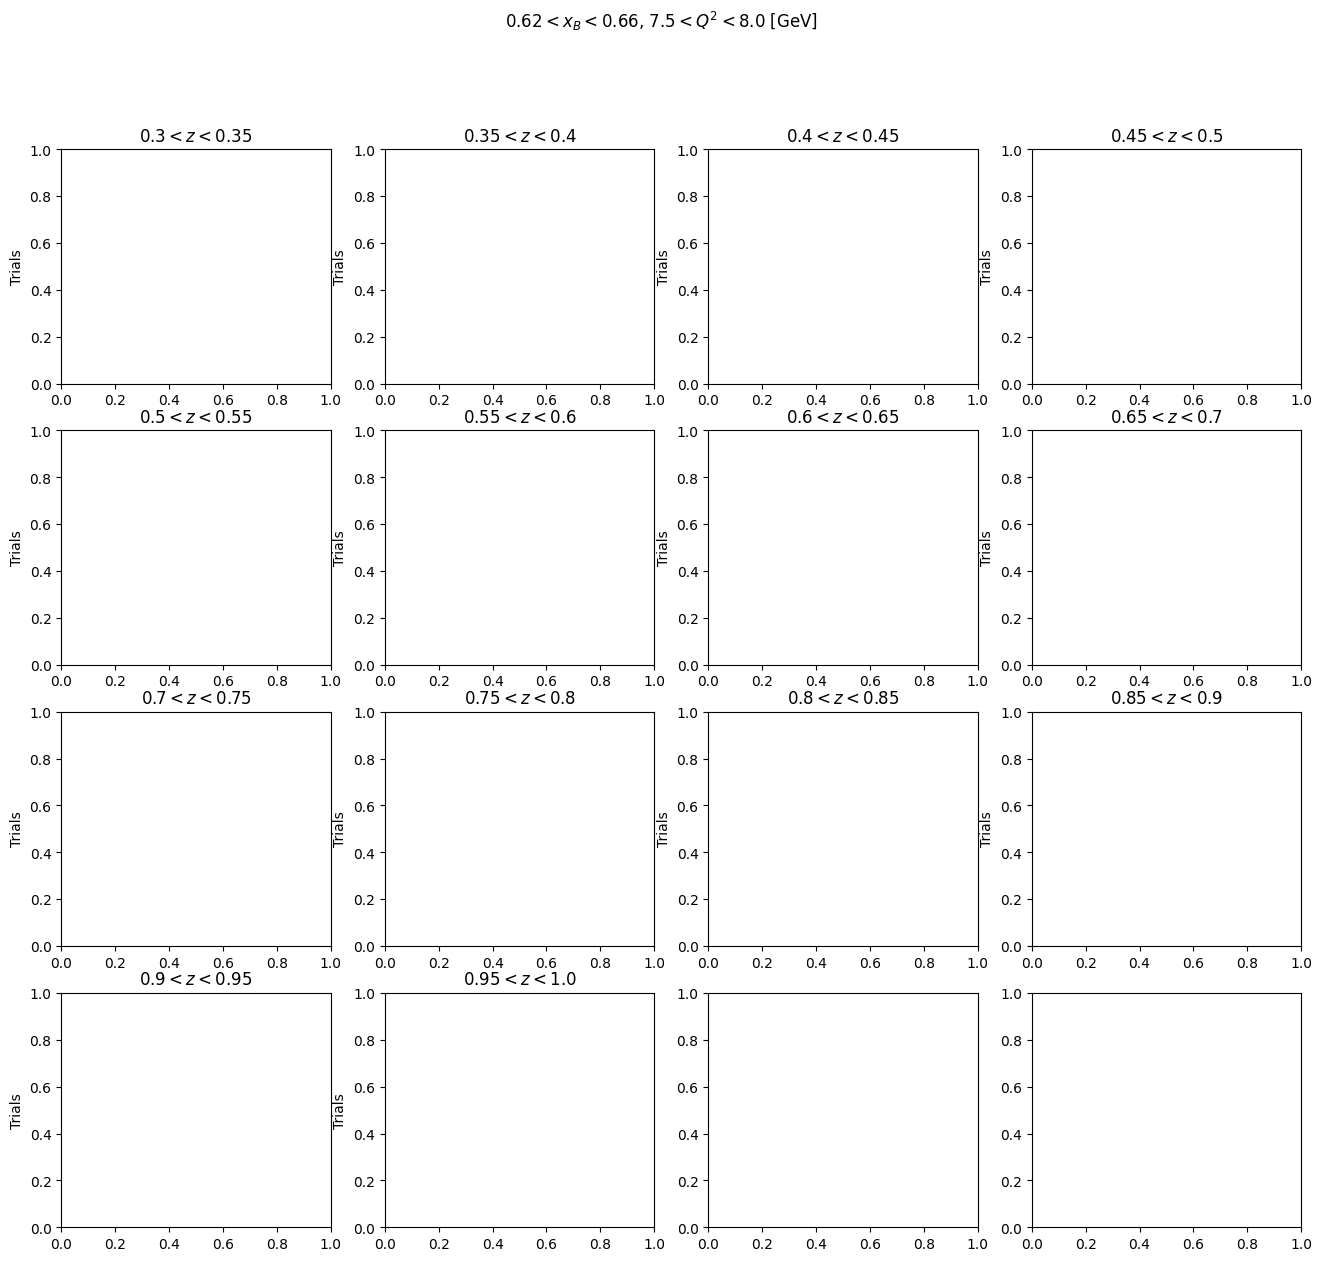

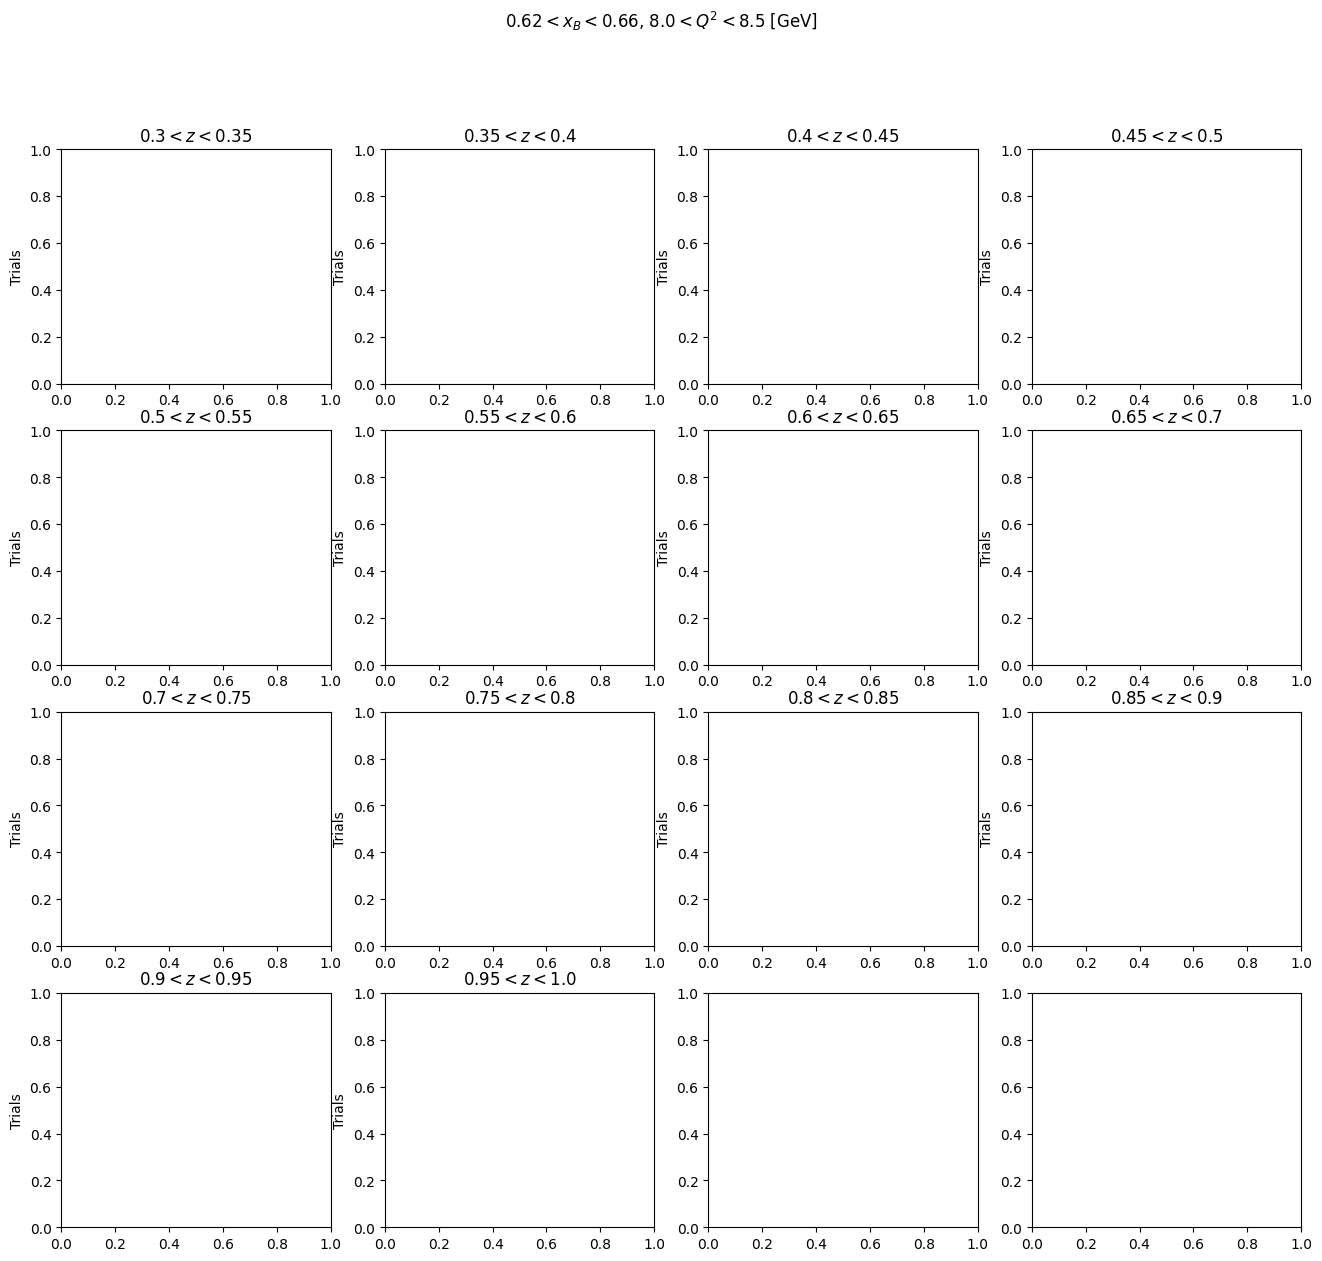

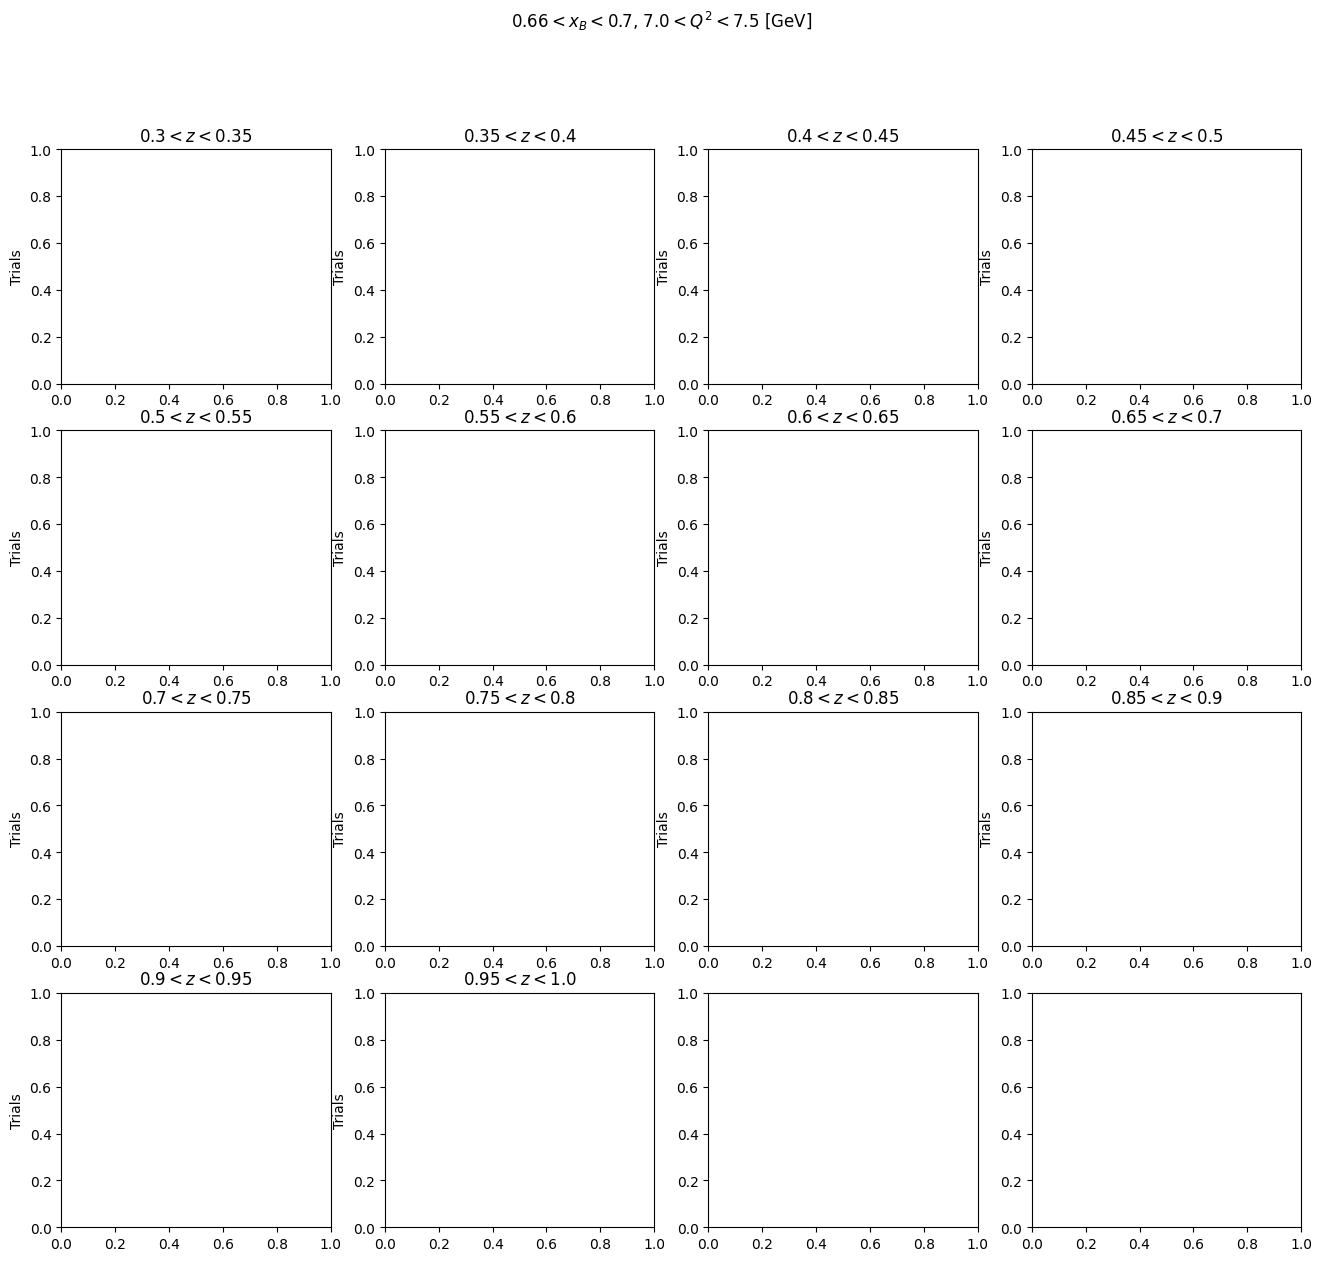

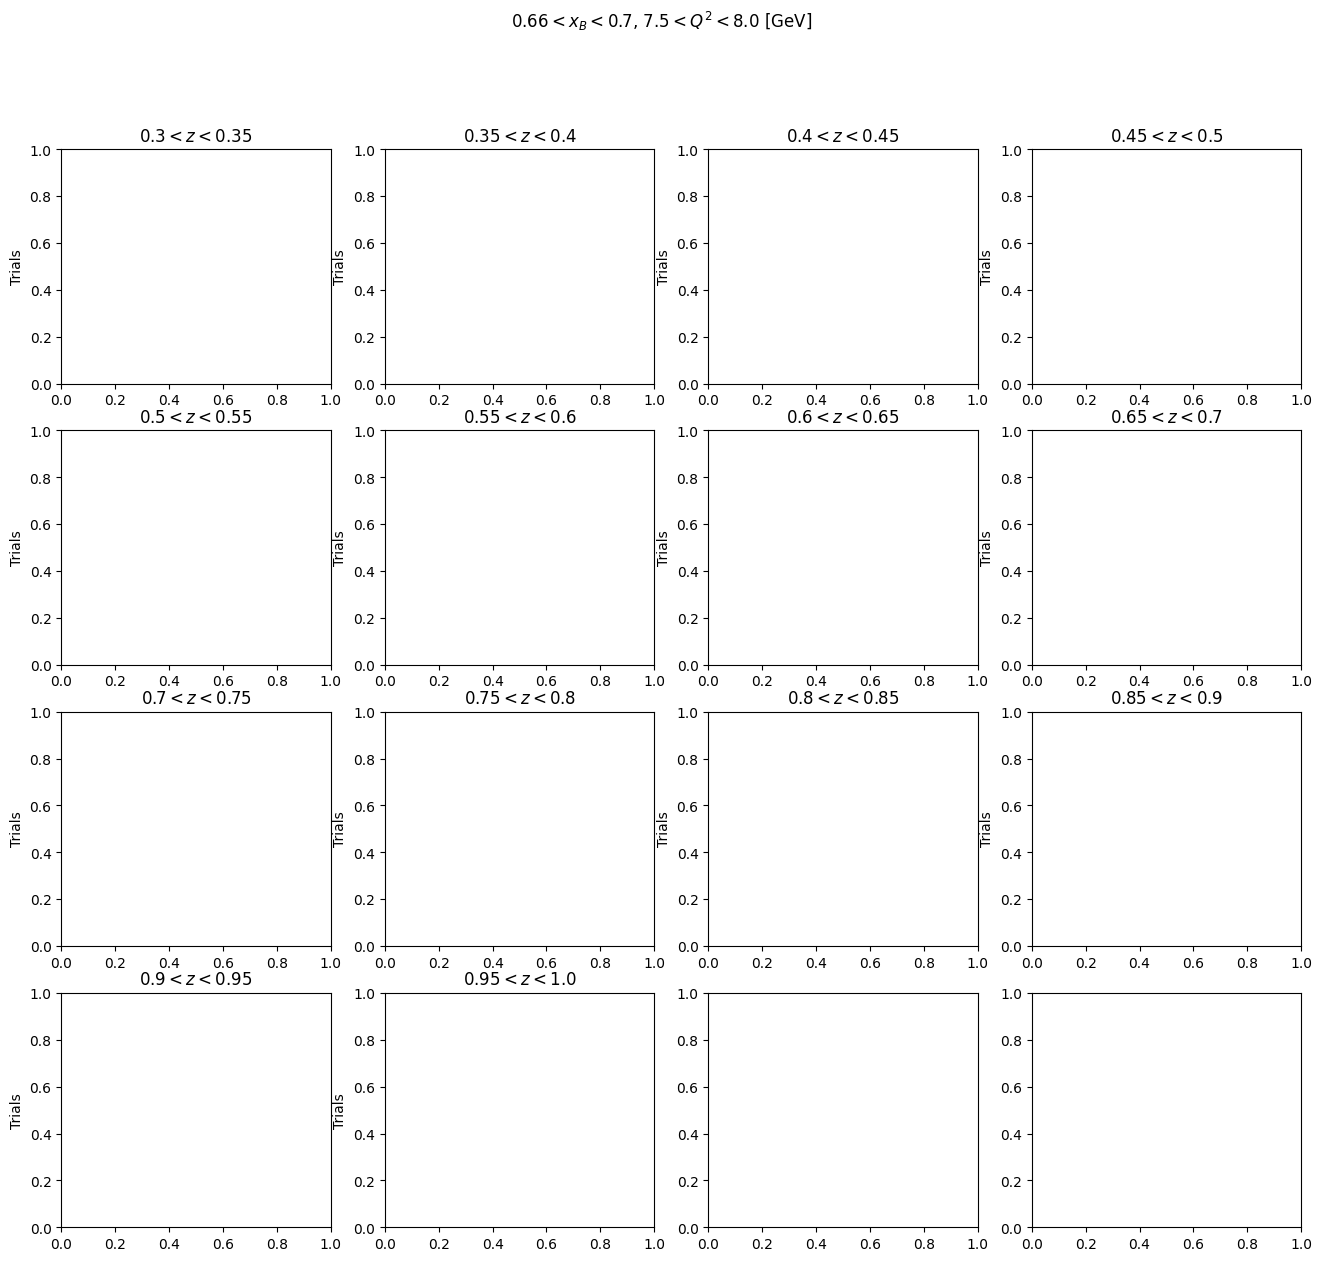

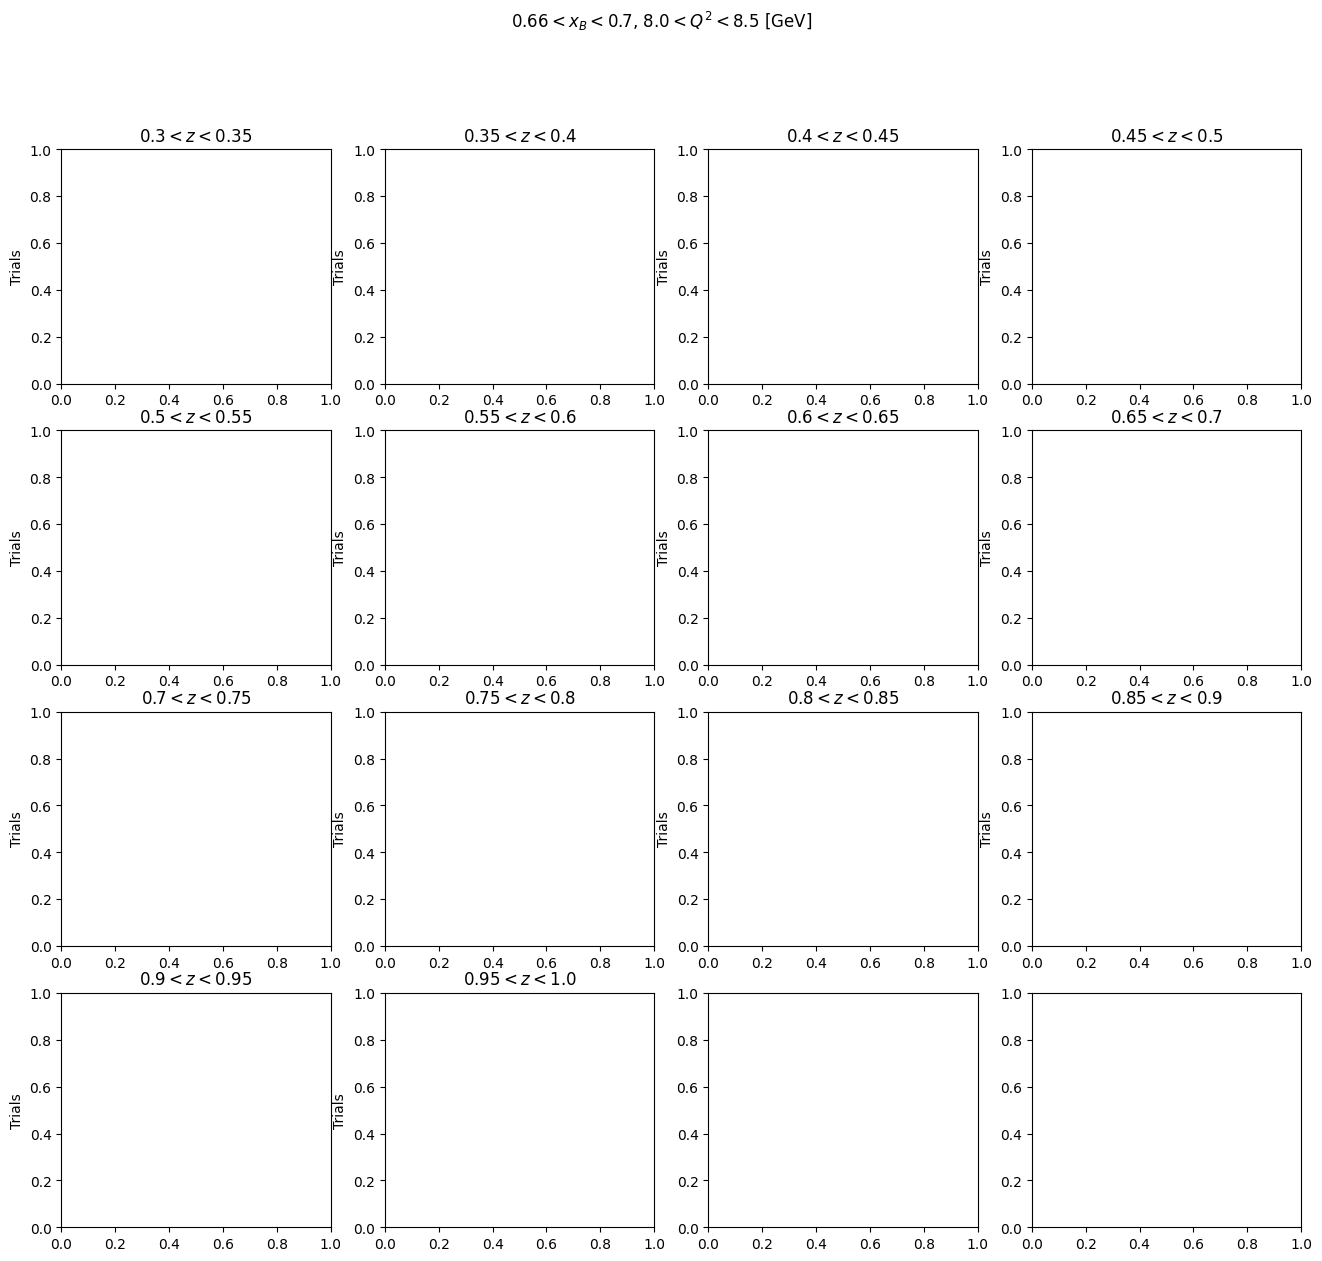

In [28]:
for x in range(1,15):
    for q in range(1,13):

        condition_pip = (data_pip[:,0]==x) & (data_pip[:,1]==q)
        selected_pip = np.transpose(data_pip[condition_pip])
        
        condition_pim = (data_pim[:,0]==x) & (data_pim[:,1]==q)
        selected_pim = np.transpose(data_pim[condition_pim])

        if np.sum( selected_pip[2:]) < 10 or np.sum(selected_pim[2:]) < 10:
            continue

        fig, axs = plt.subplots(4,4, figsize=(16,14))
        #selected_pip[selected_pip==0] = np.nan
        #selected_pim[selected_pim==0] = np.nan

        xmin = 0.1 + x*0.04
        xmax = 0.1 + (x+1)*0.04
        qmin = 2 + q*0.5
        qmax = 2 + (q+1)*0.5
        fig.suptitle(rf'${xmin:0.2} < x_B < {xmax:0.2}$, ${qmin} < Q^2 < {qmax}$ [GeV]')

        for bin in range(len(selected_pip)-2):
            axs[math.floor(bin/4), bin%4].set_title(r"${0:.2} < z < {1:.2}$".format( 0.3 + 0.05*bin, 0.3 + 0.05*(bin+1.)))
            axs[math.floor(bin/4), bin%4].set_ylabel('Trials')
            selected = selected_pip[bin]/selected_pim[bin]
            selected = np.nan_to_num(selected, nan=0.0, posinf=0.0, neginf=0.0)
            counts, bins = np.histogram(selected,25)
            bin_centres = (bins[:-1] + bins[1:])/2
            if np.max(counts) > 120:
                continue
            if np.sum(counts) < 200:
                continue
            p0 = [ np.max(counts), bin_centres[np.argmax(counts)], 1]
            axs[math.floor(bin/4), bin%4].stairs(counts, bins)
            coeff, var_matrix = curve_fit(gauss, bin_centres, counts, p0=p0)
            x_ax = np.linspace(bin_centres[0], bin_centres[-1], 100)
            
            


            axs[math.floor(bin/4), bin%4].plot( x_ax, gauss(x_ax, *coeff))
            axs[math.floor(bin/4), bin%4].text( coeff[1]+coeff[2]/2., coeff[0], r'$\sigma_{mean}' + '= {0:.02}$'.format(math.sqrt(var_matrix[1][1])/coeff[1]))
        
            

